In [1]:
import torch

In [ ]:
%pip uninstall scipy==1.12.0

In [ ]:
import scipy
print('scipy: %s' % scipy.__version__)

scipy: 1.12.0


## Reading data from edf files

In [3]:
import pyedflib
import numpy as np

def read_edf_signals(edf_file):
    f = pyedflib.EdfReader(edf_file)
    num_signals = f.signals_in_file


    signals = []
    for i in range(num_signals):
        signal = f.readSignal(i)
        signals.append(signal)

    labels = f.getSignalLabels()
    sampling_rates = f.getSampleFrequencies()

    f.close()
    
    return signals, labels, sampling_rates

edf_file_path = "./dataset/files/ucddb002.rec"
signals, labels, sampling_rates = read_edf_signals(edf_file_path)

print("Signal labels:", labels)
print("Sampling rates:", sampling_rates)

print("First 10 samples of the first signal:", signals[0][:10]) 

# Imp signals -> 'Flow', 'ribcage'


Signal labels: ['Lefteye', 'RightEye', 'EMG', 'C3A2', 'C4A1', 'ECG', 'SpO2', 'Sound', 'Flow', 'Sum', 'ribcage', 'abdo', 'BodyPos', 'Pulse']
Sampling rates: [ 64.  64.  64. 128. 128. 128.   8.   8.   8.   8.   8.   8.   8.   8.]
First 10 samples of the first signal: [0.55873016 0.64664225 0.74432234 0.84981685 1.03150183 1.11159951
 1.14090354 0.98852259 0.88107448 0.81074481]


In [4]:
device = 'cpu'
x_list = []
y_list = []

In [5]:
sleep_stages = np.loadtxt(f"dataset/files/ucddb002_stage.txt", dtype=int)
sleep_stages

wake_awake = (sleep_stages > 0).astype(int)
np.unique(wake_awake, return_counts=True)

(array([0, 1]), array([121, 627], dtype=int64))

In [6]:
from darts import TimeSeries
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
times = pd.Index(np.arange(0, len(sleep_stages) * 30, 30))
time_signal = TimeSeries.from_times_and_values(times, sleep_stages)

wake_awake_signal = TimeSeries.from_times_and_values(times, wake_awake)

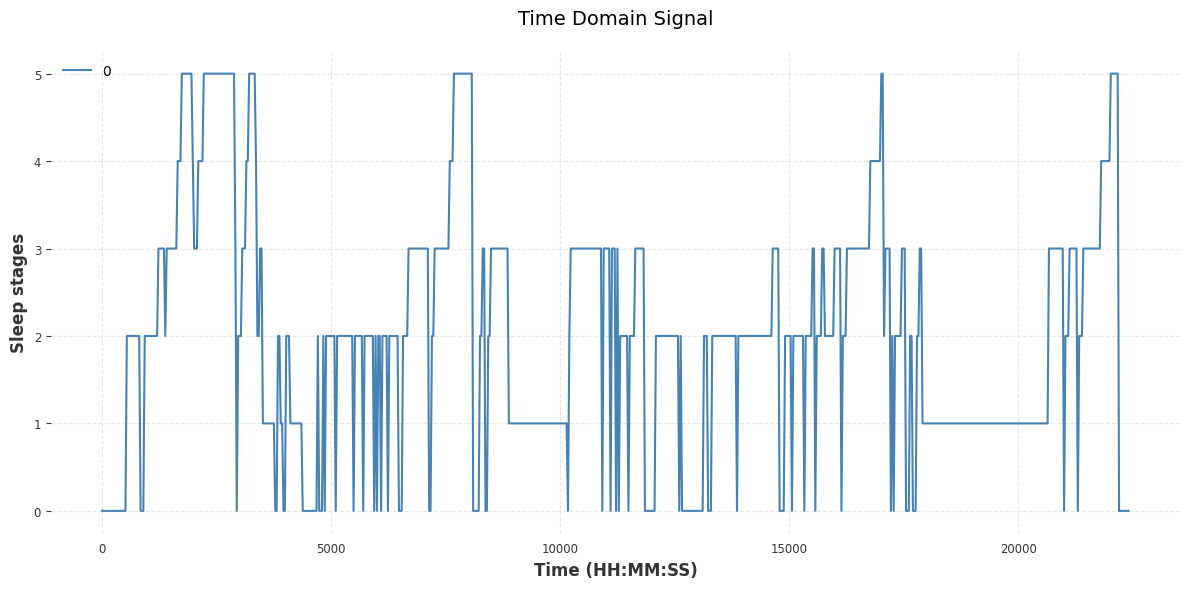

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

time_signal.plot(ax=ax, color='steelblue', linewidth=1.5)

# def format_time(x, pos):
#     hours = int(x // 3600)
#     minutes = int((x % 3600) // 60)
#     seconds = int(x % 60)
#     return f"{hours:02d}:{minutes:02d}:{seconds:02d}" if hours > 0 else f"{minutes:02d}:{seconds:02d}"

# ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time))

ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
ax.set_ylabel('Sleep stages', fontsize=12)
ax.set_title('Time Domain Signal', fontsize=14, pad=20)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

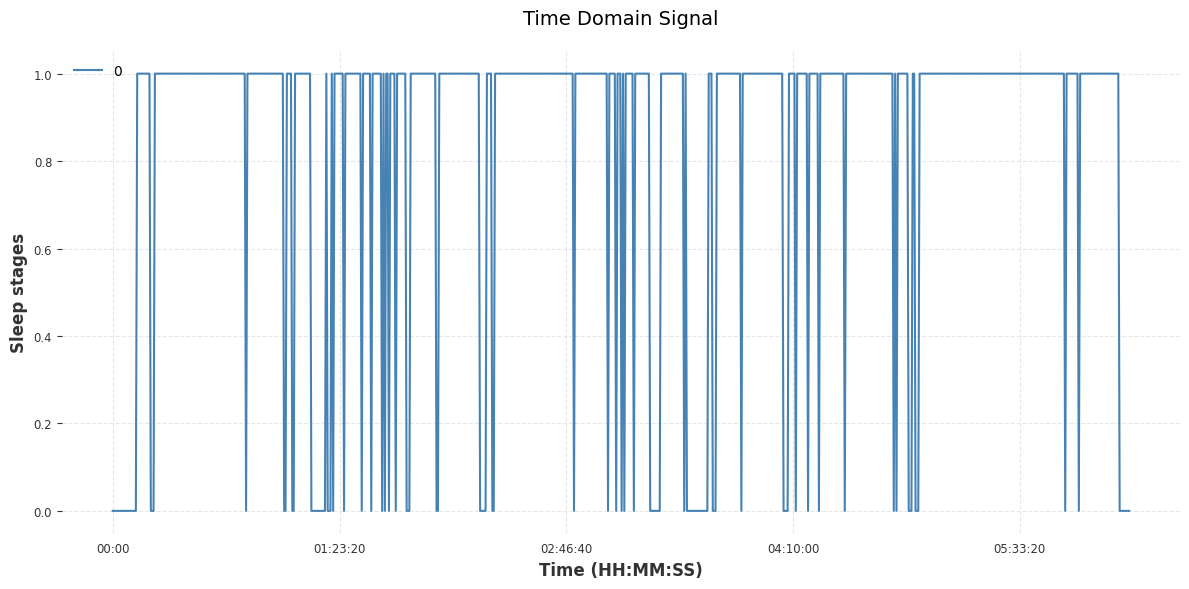

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

wake_awake_signal.plot(ax=ax, color='steelblue', linewidth=1.5)

def format_time(x, pos):
    hours = int(x // 3600)
    minutes = int((x % 3600) // 60)
    seconds = int(x % 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}" if hours > 0 else f"{minutes:02d}:{seconds:02d}"

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time))

ax.set_xlabel('Time (HH:MM:SS)', fontsize=12)
ax.set_ylabel('Sleep stages', fontsize=12)
ax.set_title('Time Domain Signal', fontsize=14, pad=20)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
x_list = []
y_list = []

for i in range(2, 29):
    try:
        if i<10:
            sleep_stages = np.loadtxt(f"dataset/files/ucddb00{i}_stage.txt", dtype=int)
            edf_file_path = f"./dataset/files/ucddb00{i}.rec"
            signals, labels, sampling_rates = read_edf_signals(edf_file_path)
        else:
            sleep_stages = np.loadtxt(f"dataset/files/ucddb0{i}_stage.txt", dtype=int)
            edf_file_path = f"./dataset/files/ucddb0{i}.rec"
            signals, labels, sampling_rates = read_edf_signals(edf_file_path)

        x_list.append([signals[8], signals[10]])
        y_list.append(sleep_stages)
    except:
        print(f"Error in file {i}")
        continue

    print()
    print()
    print(f"File {i} has {len(signals)} signals", \
          "\nsamples [nasal, ribcage]", f"[{len(signals[8])}, {len(signals[10])}]", \
          "\nsampling rate [nasal, ribcage]", f"[{sampling_rates[8]}, {sampling_rates[10]}]",\
          "\nno of sleep stages", len(signals[8])/(30*sampling_rates[8]), len(signals[10])/(30*sampling_rates[10]),  \
          "\nSleep stages: ", len(sleep_stages))    



File 2 has 14 signals 
samples [nasal, ribcage] [179760, 179760] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 749.0 749.0 
Sleep stages:  748


File 3 has 14 signals 
samples [nasal, ribcage] [211824, 211824] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 882.6 882.6 
Sleep stages:  882
Error in file 4


File 5 has 14 signals 
samples [nasal, ribcage] [198384, 198384] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 826.6 826.6 
Sleep stages:  826


File 6 has 14 signals 
samples [nasal, ribcage] [194136, 194136] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 808.9 808.9 
Sleep stages:  808


File 7 has 14 signals 
samples [nasal, ribcage] [195240, 195240] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 813.5 813.5 
Sleep stages:  813


File 8 has 14 signals 
samples [nasal, ribcage] [184328, 184328] 
sampling rate [nasal, ribcage] [8.0, 8.0] 
no of sleep stages 768.0333333333333 768.0333333333333 
Sleep s

In [11]:
print(len(x_list), len(y_list))

25 25


## Plotting Subject 1 nasal and respiratory signals

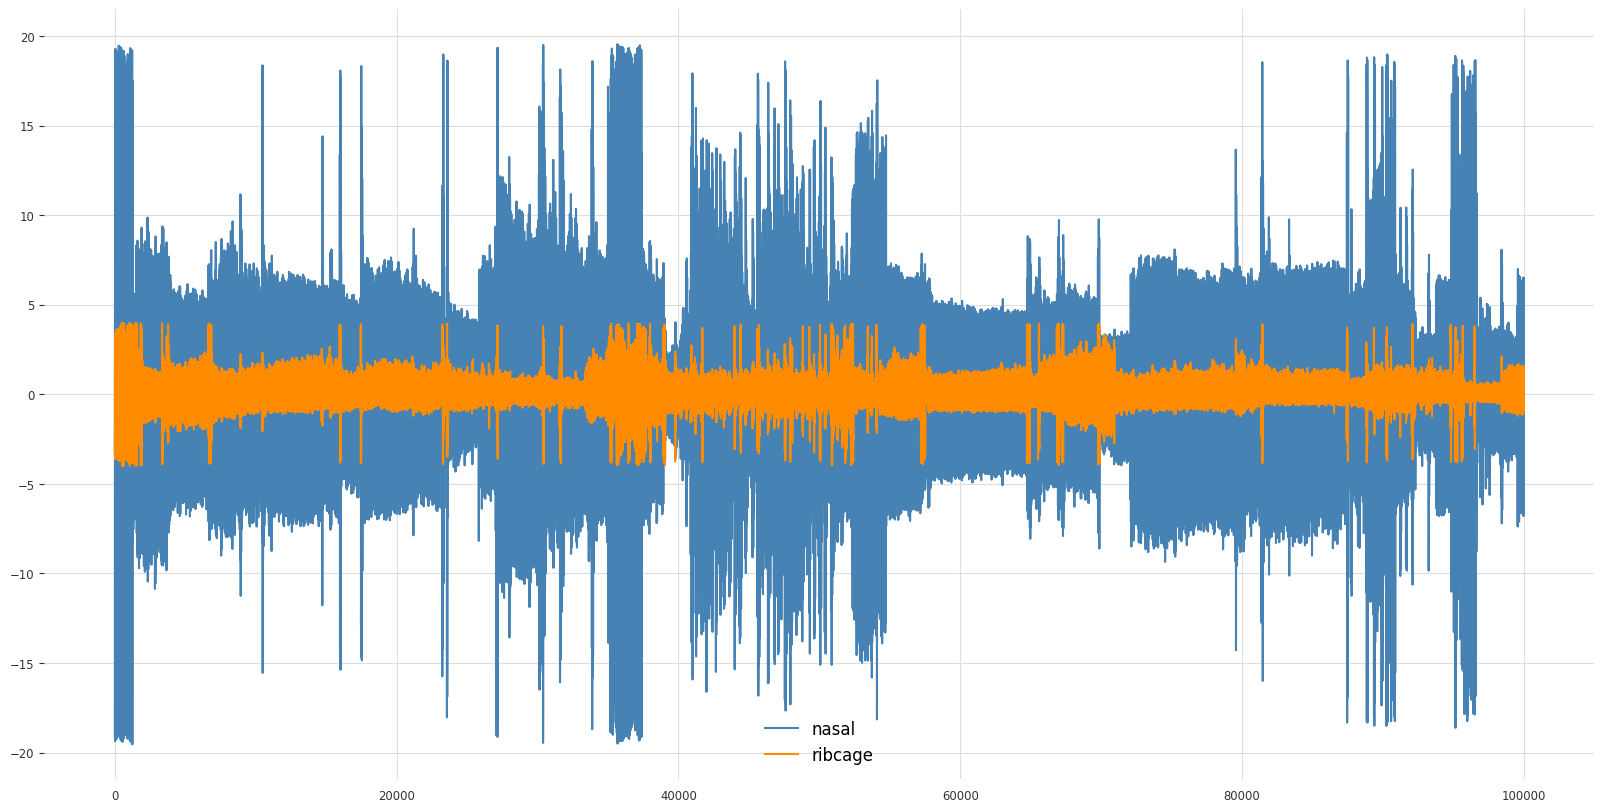

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x_list[0][0][:100000], label='nasal', color='steelblue', linewidth=1.5)
ax.plot(x_list[0][1][:100000], label='ribcage', color='darkorange', linewidth=1.5)

ax.legend(fontsize=12)

(subject, segment no, 2, 240)

## Processing data

In [13]:
reshaped_x_list = []
for i in range(len(x_list)):
    array1 = np.array(x_list[i][0])
    array2 = np.array(x_list[i][1])

    truncated_array1 = array1[:len(y_list[i])*240]
    truncated_array2 = array2[:len(y_list[i])*240]

    reshaped1 = truncated_array1.reshape(-1, 240) 
    reshaped2 = truncated_array2.reshape(-1, 240) 

    final_array = np.stack([reshaped1, reshaped2], axis=1)
    reshaped_x_list.append(final_array)

    print(array1.shape, array2.shape, y_list[i].shape, final_array.shape)

print(len(reshaped_x_list))

(179760,) (179760,) (748,) (748, 2, 240)
(211824,) (211824,) (882,) (882, 2, 240)
(198384,) (198384,) (826,) (826, 2, 240)
(194136,) (194136,) (808,) (808, 2, 240)
(195240,) (195240,) (813,) (813, 2, 240)
(184328,) (184328,) (768,) (768, 2, 240)
(222072,) (222072,) (925,) (925, 2, 240)
(217688,) (217688,) (907,) (907, 2, 240)
(216240,) (216240,) (900,) (900, 2, 240)
(207528,) (207528,) (864,) (864, 2, 240)
(194664,) (194664,) (811,) (811, 2, 240)
(185912,) (185912,) (774,) (774, 2, 240)
(219904,) (219904,) (916,) (916, 2, 240)
(189472,) (189472,) (789,) (789, 2, 240)
(197480,) (197480,) (822,) (822, 2, 240)
(204584,) (204584,) (852,) (852, 2, 240)
(180688,) (180688,) (752,) (752, 2, 240)
(219272,) (219272,) (913,) (913, 2, 240)
(189120,) (189120,) (787,) (787, 2, 240)
(206800,) (206800,) (861,) (861, 2, 240)
(218000,) (218000,) (908,) (908, 2, 240)
(170800,) (170800,) (711,) (711, 2, 240)
(201280,) (201280,) (838,) (838, 2, 240)
(214328,) (214328,) (893,) (893, 2, 240)
(173280,) (17328

In [14]:
for i in range(len(y_list)):
    y_list[i] = y_list[i].reshape(-1, 1)

In [15]:
subject_wise_data = list(zip(reshaped_x_list, y_list))

In [16]:
subject_wise_data[0][0].shape, subject_wise_data[0][1].shape

((748, 2, 240), (748, 1))

In [17]:
binary_y_list = [] # each element is from a subject
for i in range(len(y_list)):
    binary_y_list.append((y_list[i] > 0).astype(int))

np.unique(binary_y_list[0], return_counts=True)

(array([0, 1]), array([121, 627], dtype=int64))

In [18]:
binary_subject_wise_data = list(zip(reshaped_x_list, binary_y_list))

In [19]:
binary_subject_wise_data[0][0].shape, binary_subject_wise_data[0][1].shape

((748, 2, 240), (748, 1))

In [20]:
X_all = np.concatenate(reshaped_x_list, axis=0)
y_all = np.concatenate(y_list, axis=0)           

X_all.shape, y_all.shape

((20789, 2, 240), (20789, 1))

## Plotting Nasal and Ribcage signals in 240 sample window

Text(0.5, 1.0, 'Nasal and Ribcage signals for subject 4')

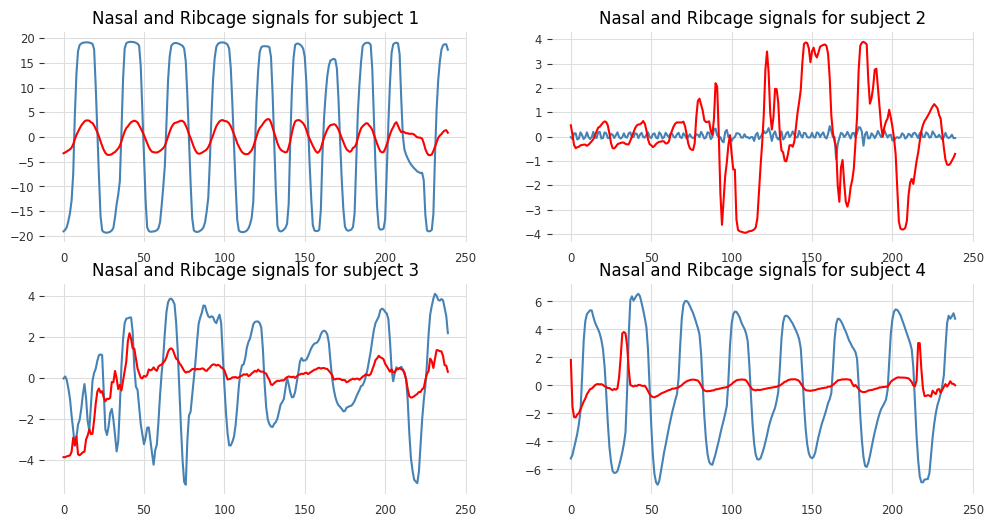

In [21]:
fig, axes = plt.subplots(2,2,figsize=(12, 6))
axes[0,0].plot(X_all[0][0], color='steelblue', linewidth=1.5)
axes[0,0].plot(X_all[0][1], color='red', linewidth=1.5)
axes[0,0].set_title('Nasal and Ribcage signals for subject 1')

axes[0,1].plot(X_all[2000][0], color='steelblue', linewidth=1.5)
axes[0,1].plot(X_all[2000][1], color='red', linewidth=1.5)
axes[0,1].set_title('Nasal and Ribcage signals for subject 2')

axes[1,0].plot(X_all[4000][0], color='steelblue', linewidth=1.5)
axes[1,0].plot(X_all[4000][1], color='red', linewidth=1.5)
axes[1,0].set_title('Nasal and Ribcage signals for subject 3')

axes[1,1].plot(X_all[6000][0], color='steelblue', linewidth=1.5)
axes[1,1].plot(X_all[6000][1], color='red', linewidth=1.5)
axes[1,1].set_title('Nasal and Ribcage signals for subject 4')

## Observation from Plots:

1. We can normalize so the signals are in the same range
2. We can smoothen the signals

## using SG filter

In [22]:
X_all[0][0].shape, X_all[0][1].shape

((240,), (240,))

In [23]:
X_all[0][0]

array([-19.06593407, -18.77289377, -18.22588523, -16.995116  ,
       -15.33455433, -12.81440781,  -7.46153846,   4.2991453 ,
        12.77777778,  17.40781441,  18.63858364,  18.93162393,
        19.08791209,  19.12698413,  19.18559219,  19.16605617,
        19.12698413,  19.02930403,  18.87301587,  17.7985348 ,
        10.27716728,   1.21245421,  -7.81318681, -15.998779  ,
       -18.89010989, -19.22222222, -19.31990232, -19.35897436,
       -19.28083028, -19.16361416, -18.90964591, -18.34310134,
       -16.25274725, -13.5958486 , -11.64224664,  -8.92673993,
         0.97802198,  11.66422466,  17.93528694,  18.99023199,
        19.18559219,  19.26373626,  19.28327228,  19.24420024,
        19.20512821,  19.06837607,  18.89255189,  18.5018315 ,
        14.32112332,   5.15873016,  -4.57020757, -12.67765568,
       -18.28449328, -19.00732601, -19.16361416, -19.14407814,
       -19.10500611, -19.00732601, -18.85103785, -18.46031746,
       -17.26862027, -13.88888889, -10.05982906,  -5.74

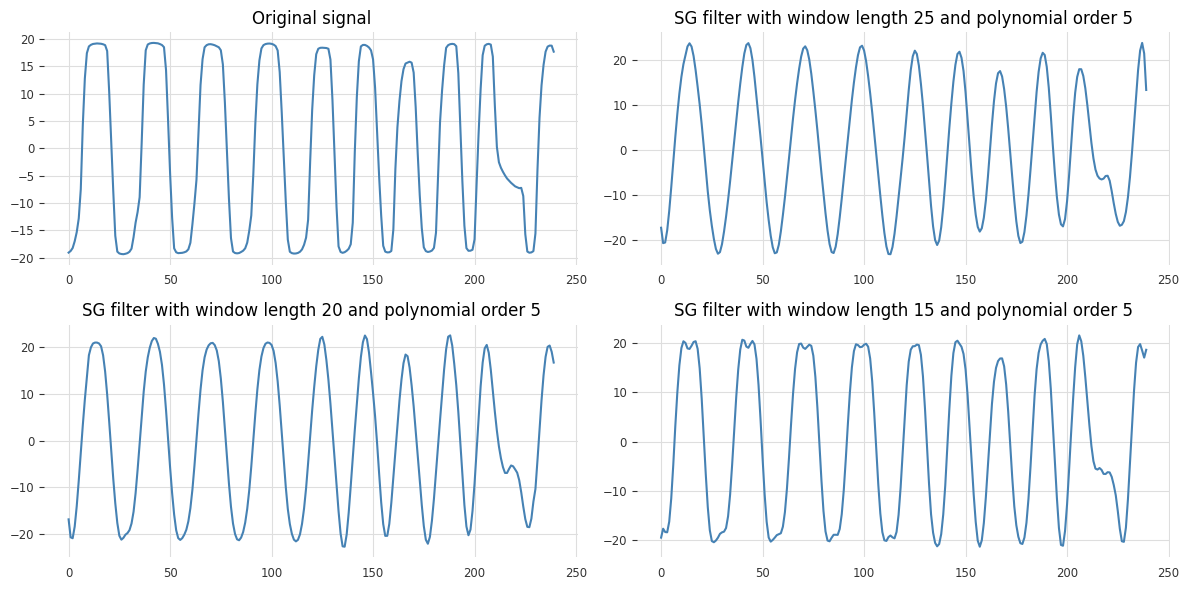

In [24]:
from scipy.signal import savgol_filter

def sg(x, window_length=25, polyorder=4):
    return savgol_filter(x, window_length=window_length, polyorder=polyorder)
fig, axes = plt.subplots(2,2,figsize=(12, 6))
axes[0,0].plot(X_all[0][0], color='steelblue', linewidth=1.5)
axes[0,0].set_title('Original signal')

axes[0,1].plot(sg(X_all[0][0], window_length=25, polyorder=5), color='steelblue', linewidth=1.5)
axes[0,1].set_title('SG filter with window length 25 and polynomial order 5')

axes[1,0].plot(sg(X_all[0][0], window_length=20, polyorder=5), color='steelblue', linewidth=1.5)
axes[1,0].set_title('SG filter with window length 20 and polynomial order 5')

axes[1,1].plot(sg(X_all[0][0], window_length=15, polyorder=5), color='steelblue', linewidth=1.5)
axes[1,1].set_title('SG filter with window length 15 and polynomial order 5')

fig.tight_layout() 

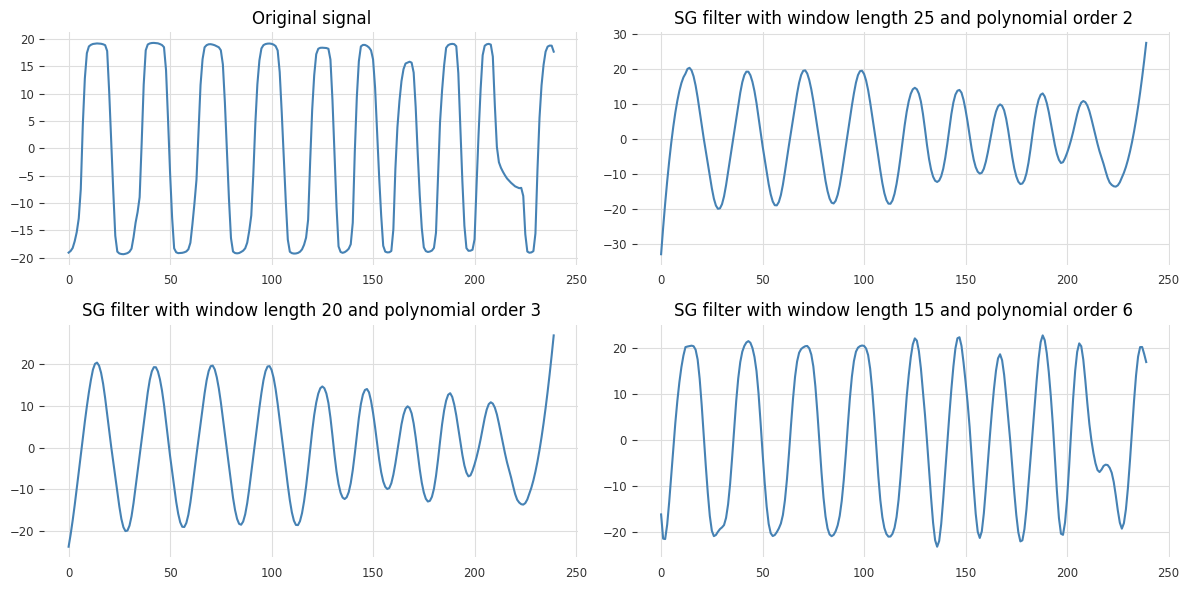

In [25]:
fig, axes = plt.subplots(2,2,figsize=(12, 6))
axes[0,0].plot(X_all[0][0], color='steelblue', linewidth=1.5)
axes[0,0].set_title('Original signal')

axes[0,1].plot(sg(X_all[0][0], window_length=25, polyorder=2), color='steelblue', linewidth=1.5)
axes[0,1].set_title('SG filter with window length 25 and polynomial order 2')

axes[1,0].plot(sg(X_all[0][0], window_length=25, polyorder=3), color='steelblue', linewidth=1.5)
axes[1,0].set_title('SG filter with window length 20 and polynomial order 3')

axes[1,1].plot(sg(X_all[0][0], window_length=25, polyorder=6), color='steelblue', linewidth=1.5)
axes[1,1].set_title('SG filter with window length 15 and polynomial order 6')

fig.tight_layout()

SG filter with window length 25, poly order 5 looks good

## Converting to Pandas dataframe

In [26]:
df = pd.DataFrame({
    'nasal': [X_all[i, 0, :] for i in range(X_all.shape[0])],   
    'ribcage': [X_all[i, 1, :] for i in range(X_all.shape[0])],
    'sleep stage': y_all.flatten()
})

In [27]:
df[:20]

nasal  \
0   [-19.065934065934066, -18.772893772893774, -18...   
1   [11.0, 4.221001221001221, -1.4444444444444444,...   
2   [13.617826617826617, 8.831501831501832, 5.1001...   
3   [-5.214896214896215, 0.43101343101343104, 5.13...   
4   [-0.3894993894993895, -7.3638583638583635, -13...   
5   [14.633699633699633, 8.616605616605616, -2.675...   
6   [-2.304029304029304, -1.6398046398046398, -0.9...   
7   [-4.492063492063492, -6.758241758241758, -8.14...   
8   [7.581196581196581, 7.9914529914529915, 8.2844...   
9   [-2.8705738705738706, -5.507936507936508, -7.5...   
10  [5.9010989010989015, 4.416361416361417, 1.5836...   
11  [-2.47985347985348, -1.4053724053724053, 0.665...   
12  [-10.274725274725276, -9.454212454212454, -8.4...   
13  [0.11843711843711843, -2.7142857142857144, -5....   
14  [-7.266178266178266, -5.547008547008547, -3.71...   
15  [3.8302808302808304, 1.0757020757020757, -2.08...   
16  [5.119658119658119, 5.666666666666667, 5.66666...   
17  [3.4395604395604398, 3.029304029304029, 2.5213...   
18  [-4.413919413919414, -3.984126984126984, -3.53...   
19  [-1.835164835164835, -0.27228327228327226, 1.3...   

                                              ribcage  sleep stage  
0   [-3.27008547008547, -3.10989010989011, -2.9106...            0  
1   [-0.242002442002442, -0.7772893772893773, -1.2...            0  
2   [0.23467643467643468, 0.5824175824175825, 2.59...            0  
3   [-1.4766788766788768, -0.7811965811965812, 0.2...            0  
4   [0.9926739926739927, 0.023687423687423687, -0....            0  
5   [2.872039072039072, 2.246886446886447, 1.53577...            0  
6   [-2.809035409035409, -2.3597069597069598, -1.9...            0  
7   [0.6644688644688644, 0.2385836385836386, -0.48...            0  
8   [1.613919413919414, 1.8053724053724054, 1.9186...            0  
9   [0.09010989010989011, -0.15995115995115994, -0...            0  
10  [1.1333333333333333, 1.1020757020757022, 0.906...            0  
11  [-0.4998778998778999, -0.37484737484737485, -0...            0  
12  [-1.5743589743589743, -1.547008547008547, -1.3...            0  
13  [0.3831501831501832, 0.023687423687423687, -0....            0  
14  [-3.871794871794872, -3.8796092796092796, -3.8...            0  
15  [1.3873015873015873, 1.0395604395604396, 0.555...            0  
16  [0.3089133089133089, 0.8246642246642246, 1.231...            0  
17  [0.5238095238095238, 0.9184371184371184, 0.984...            0  
18  [-1.3164835164835165, -1.2344322344322345, -1....            2  
19  [-0.6796092796092796, -0.5623931623931624, -0....            2

In [28]:
import pandas as pd
import numpy as np

flattened_data = []

for series_id, row in df.iterrows():
    nasal_series = row['nasal']
    ribcage_series = row['ribcage']
    sleep_stage = row['sleep stage']
    
    sample_points = np.arange(len(nasal_series))
    
    for s in sample_points:
        flattened_data.append({
            'series_id': series_id,
            'sample_point': s,
            'nasal': nasal_series[s],
            'ribcage': ribcage_series[s],
            'sleep_stage': sleep_stage
        })

flat_df = pd.DataFrame(flattened_data)

flat_df = flat_df[['series_id', 'sample_point', 'nasal', 'ribcage', 'sleep_stage']]

In [29]:
flat_df[:10]

series_id  sample_point      nasal   ribcage  sleep_stage
0          0             0 -19.065934 -3.270085            0
1          0             1 -18.772894 -3.109890            0
2          0             2 -18.225885 -2.910623            0
3          0             3 -16.995116 -2.734799            0
4          0             4 -15.334554 -2.492552            0
5          0             5 -12.814408 -2.121368            0
6          0             6  -7.461538 -1.453236            0
7          0             7   4.299145 -0.441270            0
8          0             8  12.777778  0.437851            0
9          0             9  17.407814  1.094261            0

In [30]:
counts = flat_df['sleep_stage'].value_counts()
counts /= 240
counts

sleep_stage
3    6985.0
0    4707.0
2    3403.0
1    3016.0
5    1990.0
4     673.0
8      15.0
Name: count, dtype: float64

## Distribution of sleep stages

<Axes: xlabel='sleep_stage'>

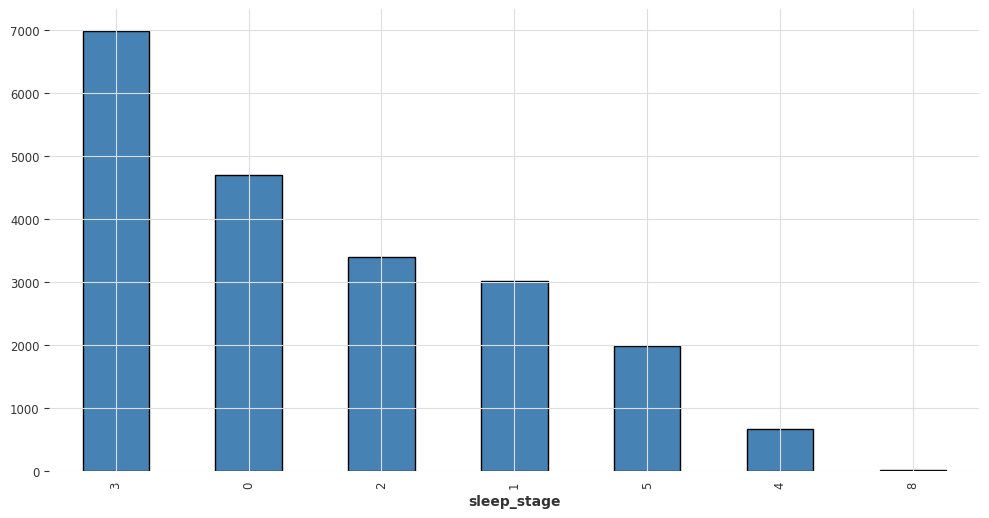

In [31]:
counts.plot(kind='bar', figsize=(12, 6), color='steelblue', edgecolor='black')

In [32]:
flat_df['sleep_stage_binary'] = (flat_df['sleep_stage'] > 0).astype(int)

In [33]:
counts_binary = flat_df['sleep_stage_binary'].value_counts()
counts_binary /= 240
counts_binary

sleep_stage_binary
1    16082.0
0     4707.0
Name: count, dtype: float64

## Distribution of Binary Sleep stages

<Axes: xlabel='sleep_stage_binary'>

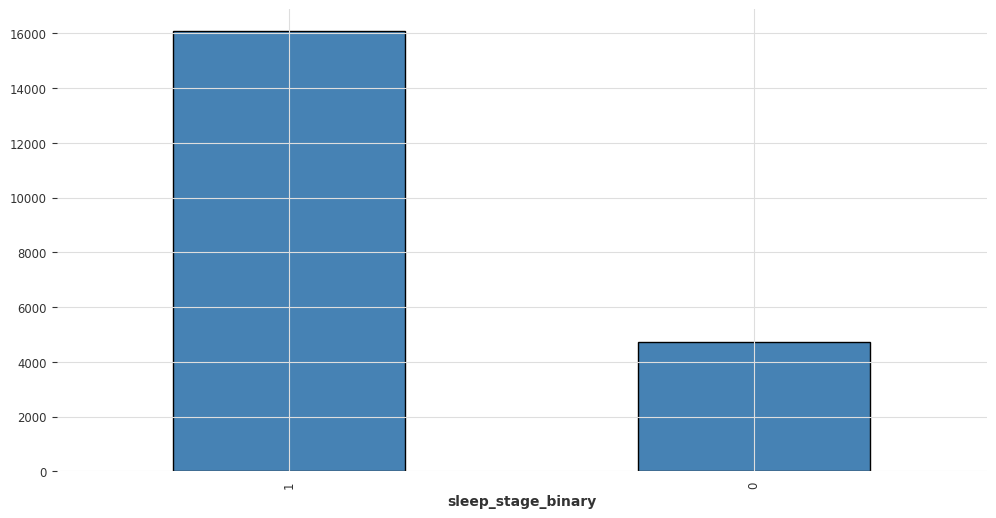

In [34]:
counts_binary.plot(kind='bar', figsize=(12, 6), color='steelblue', edgecolor='black')

In [35]:
y_binary = (y_all > 0).astype(int)
np.unique(y_binary, return_counts=True)

(array([0, 1]), array([ 4707, 16082], dtype=int64))

In [36]:
data_binary = []

for i in range(0, X_all.shape[0]):
    data_binary.append([X_all[i], y_binary[i]])

In [37]:
type(data_binary[0][1])

numpy.ndarray

## Creating Pytorch Dataset

In [38]:
from sklearn.model_selection import train_test_split
train_binary, test_binary = train_test_split(data_binary, test_size=0.2, random_state=42)

In [39]:
train_binary_X = np.array([x[0] for x in train_binary])
train_binary_y = np.array([x[1] for x in train_binary])
train_binary_y

test_binary_X = np.array([x[0] for x in test_binary])
test_binary_y = np.array([x[1] for x in test_binary])

In [40]:
train_binary_tensorX = torch.tensor([seq for seq, _ in train_binary], dtype=torch.float32)
train_binary_tensorY = torch.tensor([label for _, label in train_binary], dtype=torch.float32)

test_binary_tensorX = torch.tensor([seq for seq, _ in test_binary], dtype=torch.float32)
test_binary_tensorY = torch.tensor([label for _, label in test_binary], dtype=torch.float32)

C:\Users\tanis\AppData\Local\Temp\ipykernel_26676\1709638403.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  train_binary_tensorX = torch.tensor([seq for seq, _ in train_binary], dtype=torch.float32)


In [41]:
train_binary_tensorX.shape, train_binary_tensorY.shape, test_binary_tensorX.shape, test_binary_tensorY.shape

(torch.Size([16631, 2, 240]),
 torch.Size([16631, 1]),
 torch.Size([4158, 2, 240]),
 torch.Size([4158, 1]))

In [42]:

from torch.utils.data import DataLoader
# creat dataset
from torch.utils.data import TensorDataset

test_binary_dataset = TensorDataset(train_binary_tensorX, train_binary_tensorY)
test_binary_dataset = TensorDataset(test_binary_tensorX, test_binary_tensorY)

train_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=False)

In [43]:
for X, y in train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([16, 2, 240]) torch.Size([16, 1])


In [44]:
v = train_binary_tensorY.to('cpu').detach().numpy()
unique, counts = np.unique(v, return_counts=True)
print(dict(zip(unique, counts)))

u = test_binary_tensorY.to('cpu').detach().numpy()
unique, counts = np.unique(u, return_counts=True)

print(dict(zip(unique, counts)))

{0.0: 3744, 1.0: 12887}
{0.0: 963, 1.0: 3195}


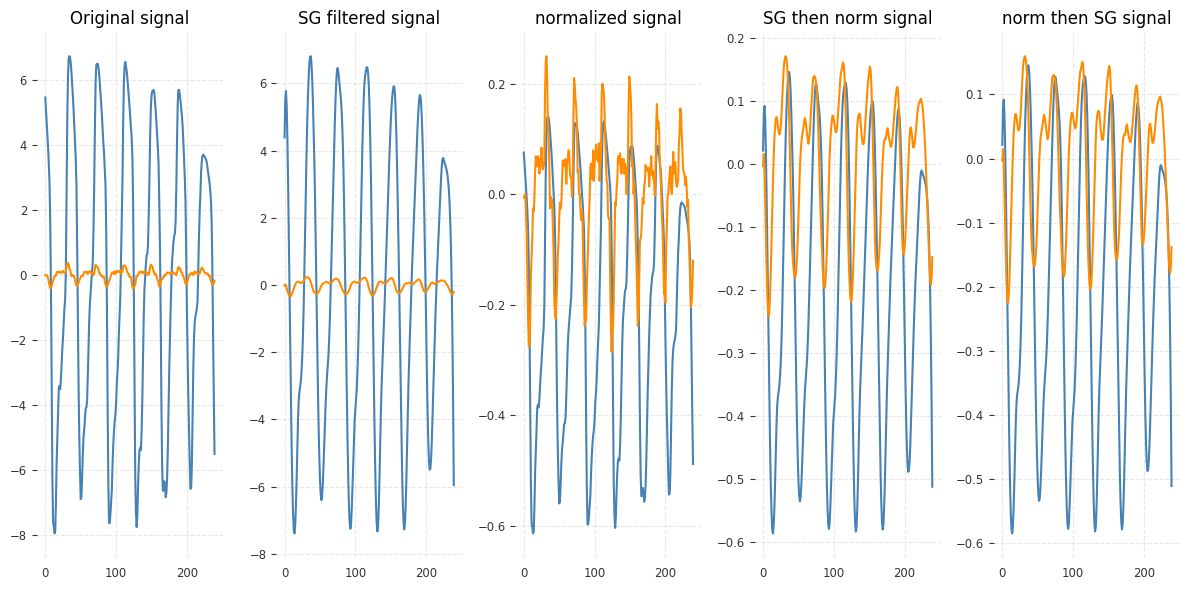

(16631, 2, 240) (4158, 2, 240) (16631, 1) (4158, 1)


In [45]:
import torch
import numpy as np
from scipy.signal import savgol_filter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X_data = np.vstack((train_binary_X, test_binary_X))
Y_data = np.vstack((train_binary_y, test_binary_y))



def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))    
    norm_data =  (data - means[:, None]) / stds[:, None]
    return norm_data

X_norm = normalize_channels(X_data)


def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

X_sg = apply_sg_filter(X_data)  
X_sg_norm = normalize_channels(X_sg) 
X_norm_sg = apply_sg_filter(X_norm)


fig, ax = plt.subplots(1, 5, figsize=(12, 6))

ax[0].plot(X_data[0, 0], color='steelblue', linewidth=1.5)
ax[0].plot(X_data[0, 1], color='darkorange', linewidth=1.5)
ax[0].set_title('Original signal')

ax[1].plot(X_sg[0, 0], color='steelblue', linewidth=1.5)
ax[1].plot(X_sg[0, 1], color='darkorange', linewidth=1.5)
ax[1].set_title('SG filtered signal')


ax[2].plot(X_norm[0, 0], color='steelblue', linewidth=1.5)
ax[2].plot(X_norm[0, 1], color='darkorange', linewidth=1.5)
ax[2].set_title("normalized signal")

ax[3].plot(X_sg_norm[0, 0], color='steelblue', linewidth=1.5)
ax[3].plot(X_sg_norm[0, 1], color='darkorange', linewidth=1.5)
ax[3].set_title('SG then norm signal')


ax[4].plot(X_norm_sg[0, 0], color='steelblue', linewidth=1.5)
ax[4].plot(X_norm_sg[0, 1], color='darkorange', linewidth=1.5)
ax[4].set_title('norm then SG signal')

ax[0].grid(True, linestyle='--', alpha=0.7)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[2].grid(True, linestyle='--', alpha=0.7)
ax[3].grid(True, linestyle='--', alpha=0.7)
ax[4].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_sg_norm, Y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train_flat = X_train.reshape(X_train.shape[0], -1) 

sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_flat, y_train)

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

X_train_balanced = restore_shape(X_train_res, X_train.shape) 

processed_X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
processed_y_train_tensor = torch.tensor(y_train_res, dtype=torch.float32).unsqueeze(1)
processed_X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
processed_y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)



# # Verify results
# print("Original class counts:", np.bincount(y_train))
# print("Balanced class counts:", np.bincount(y_train_res))
# print("Normalized channel means (train):", X_train_tensor.mean(dim=(0, 2)))
# print("Normalized channel stds (train):", X_train_tensor.std(dim=(0, 2)))

In [46]:
v = processed_y_train_tensor.to('cpu').detach().numpy()
unique, counts = np.unique(v, return_counts=True)
print(dict(zip(unique, counts)))

u = processed_y_test_tensor.to('cpu').detach().numpy()
unique, counts = np.unique(u, return_counts=True)

print(dict(zip(unique, counts)))

{0.0: 12849, 1.0: 12849}
{0.0: 925, 1.0: 3233}


In [47]:

from torch.utils.data import DataLoader
# creat dataset
from torch.utils.data import TensorDataset

processed_test_binary_dataset = TensorDataset(processed_X_train_tensor, processed_y_train_tensor)
processed_test_binary_dataset = TensorDataset(processed_X_test_tensor, processed_y_test_tensor)

processed_train_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=True)
processed_test_dataloader = DataLoader(test_binary_dataset, batch_size=16, shuffle=False)

In [48]:
for X, y in processed_train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([16, 2, 240]) torch.Size([16, 1])


## MODEL

In [49]:
import torch.nn.functional as F
import torch.nn as nn

%matplotlib inline

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [51]:
class SleepLSTM(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, num_layers=1):
        super(SleepLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1) 

    def forward(self, x):
        x = x.permute(0, 2, 1) 
        lstm_out, _ = self.lstm(x) 
        last_timestep = lstm_out[:, -1, :] 
        output = self.fc(last_timestep)  
        return output  

In [52]:
class SleepCNNLSTM(nn.Module):
    def __init__(self, n_features=2, n_classes=2, conv_channels=64, lstm_hidden=128, lstm_layers=3):
        super().__init__()
        
        self.conv = nn.Sequential(
            nn.Conv1d(n_features, conv_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(conv_channels),
            nn.ReLU(),
            nn.MaxPool1d(2),
            
            nn.Conv1d(conv_channels, conv_channels*2, kernel_size=3, padding=1),
            nn.BatchNorm1d(conv_channels*2),
            nn.ReLU(),
            nn.Dropout(0.3),
        )
        
        self.bilstm = nn.LSTM(
            input_size=conv_channels*2, 
            hidden_size=lstm_hidden,
            num_layers=lstm_layers,
            bidirectional=True,
            batch_first=True,
            dropout=0.2 if lstm_layers > 1 else 0
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(lstm_hidden*2*2, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        
        x = self.conv(x) 
        
        x = x.permute(0, 2, 1) 
        
        bilstm_out, (h_n, c_n) = self.bilstm(x)  
        

        last_timestep_output = bilstm_out[:, -1, :] 
        

        last_layer_forward = h_n[-2, :, :] 
        last_layer_backward = h_n[-1, :, :]  
        last_layer_combined = torch.cat([last_layer_forward, last_layer_backward], dim=1)
        
        combined_features = torch.cat(
            [last_timestep_output, last_layer_combined], 
            dim=1
        )  
        
        output = self.classifier(combined_features)
        return output

In [53]:
def train_loop(model, num_epochs, criterion, optimizer, train_loader, device):
    train_results = []
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            labels = labels.reshape(-1, 1)

            optimizer.zero_grad()
            outputs = model(inputs)  
            loss = criterion(outputs, labels)

            train_results.append((labels, (outputs)))

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}", end='\r')

    avg_loss = total_loss / len(train_loader)
    print(f"Training Loss: {avg_loss:.4f}")
    return train_results

def test_loop(model, criterion, test_loader, device):
    
    test_results = []

    model.eval()
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.reshape(-1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()

            preds = torch.sigmoid(outputs)  
            predicted_labels = (preds > 0.5).float()  
            test_results.append((labels, preds))

            correct += (predicted_labels == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    avg_loss = total_loss / len(test_loader)
    print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {avg_loss:.4f}")
    return test_results

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_recall_curve, f1_score, 
    precision_score, recall_score, roc_auc_score
)
from scipy.special import softmax

def load_metrics(test_results, i):
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]
    x = torch.cat(y_prob).cpu().detach().numpy()
    # print(x > 0.5)
    y_pred = (torch.cat(y_prob).cpu().detach() > 0.5).float()
    y_true = torch.cat(y_true).cpu().detach().numpy()
    y_prob = torch.cat(y_prob).cpu().detach().numpy()
    cm = confusion_matrix(y_true, y_pred)

    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]

    print("tn", tn)
    print("fp", fp)
    print("fn", fn)
    print("tp", tp)
    print("cm", cm)

    if i in [0, 1, 15, 24]:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)  
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")


    if i in [0, 1, 15, 24]:
        precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_prob)

        plt.figure(figsize=(6, 6))
        plt.plot(recall_vals, precision_vals, marker='.', label='PR Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.grid()
        plt.show()


    correct_predictions = (y_true == y_pred).sum()
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions

    return accuracy, precision, recall, specificity, f1, auc, y_true, y_prob

In [55]:
def plotter(test_results):
    y_true = [i[0].cpu().numpy() for i in test_results]
    y_pred = [(i[1] > 0.5).cpu().numpy() for i in test_results]


    fig, ax = plt.subplots(2,2, figsize=(12, 6))

    ax[0,0].plot(y_true[0] , color='steelblue', linewidth=1.5, label='Truth')
    ax[0,0].plot(y_pred[0], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[0, 0].set_xlabel('Batch No', fontsize=12)
    ax[0, 0].set_ylabel('Sleep Stage', fontsize=12)
    ax[0,0].legend()

    ax[0,1].plot(y_true[1], color='steelblue', linewidth=1.5, label='Truth')
    ax[0,1].plot(y_pred[1], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[0, 1].set_xlabel('Batch No', fontsize=12)
    ax[0, 1].set_ylabel('Sleep Stage', fontsize=12)
    ax[0,1].legend()

    ax[1,0].plot(y_true[2], color='steelblue', linewidth=1.5, label='Truth')
    ax[1,0].plot(y_pred[2], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[1, 0].set_xlabel('Batch No', fontsize=12)
    ax[1, 0].set_ylabel('Sleep Stage', fontsize=12)
    ax[1,0].legend()

    ax[1,1].plot(y_true[15], color='steelblue', linewidth=1.5, label='Truth')
    ax[1,1].plot(y_pred[15], color='red', linewidth=1.5, label='Prediction', alpha=0.5)
    ax[1, 1].set_xlabel('Batch No', fontsize=12)
    ax[1, 1].set_ylabel('Sleep Stage', fontsize=12)
    ax[1,1].legend()

    fig.tight_layout()
    plt.show()


## HYPER PARAMETERS

In [56]:
input_size = 2
hidden_size = 64
num_layers = 1
batch_size = 16
num_epochs = 10
learning_rate = 0.0005

## Using Unprocessed Data on LSTM model

In [107]:
# # subjects = list(set(dataset.subject_ids))  # Assuming `dataset.subject_ids` gives subject labels
# results = []

# model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
# criterion = nn.BCEWithLogitsLoss() 
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# for i, data in enumerate(binary_subject_wise_data):
#     print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
#         # Split data: leave out the current subject for testing
#     train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
#     test_data = data

#     # Concatenate features and labels
#     train_features = np.vstack([x[0] for x in train_data])
#     train_labels = np.vstack([x[1] for x in train_data])
#     print(train_features.shape, train_labels.shape)

#     # Create a dataset and DataLoader
#     train_dataset = list(zip(torch.tensor(train_features, dtype=torch.float32),
#                              torch.tensor(train_labels, dtype=torch.float32)))
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     test_dataset = list(zip(torch.tensor(test_data[0], dtype=torch.float32),
#                             torch.tensor(test_data[1], dtype=torch.float32)))
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # for x,y in train_loader:
#     #     print(x.shape, y.shape)
#     #     break
    
#     # Reinitialize the model for each fold
#     model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Train the model
#     # for t in range(num_epochs):
#         # print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs, train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, device=device)

#     # Evaluate on the test subject
#     test_results = test_loop(test_loader=test_loader, model=model, criterion=criterion, device=device)
#     results.append((i, test_results))
    
#     # Process metrics and plot results for each fold
#     y_true = [i[0] for i in test_results]
#     y_prob = [i[1] for i in test_results]
#     load_metrics(test_results)
#     plotter(test_results)

# print("Cross-validation complete!")


## Using Unprocessed Data on LSTM model

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
(20041, 2, 240) (20041, 1)
Training Loss: 0.46437631
Test Accuracy: 0.8369, Test Loss: 0.3576
tn 15
fp 106
fn 16
tp 611
cm [[ 15 106]
 [ 16 611]]


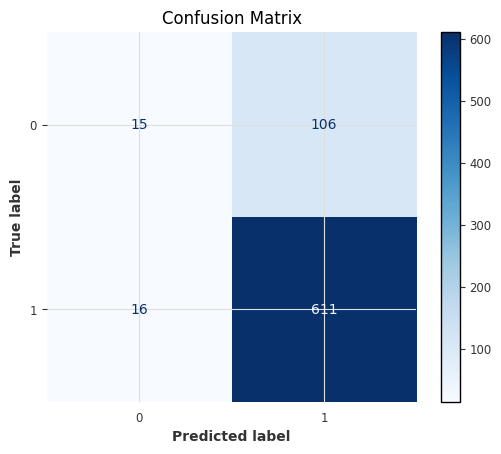

Precision: 0.8522
Recall (Sensitivity): 0.9745
Specificity: 0.1240
F1-Score: 0.9092
AUC-ROC: 0.5492


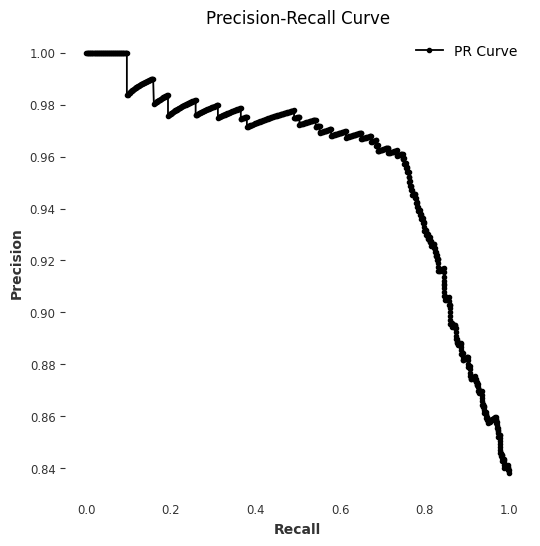

Fold 1 metrics: {'accuracy': tensor(0.8369), 'precision': 0.8521617852161785, 'recall': 0.9744816586921851, 'f1': 0.9092261904761905, 'roc_auc': 0.5492243004204727, 'specificity': 0.12396694214876033}


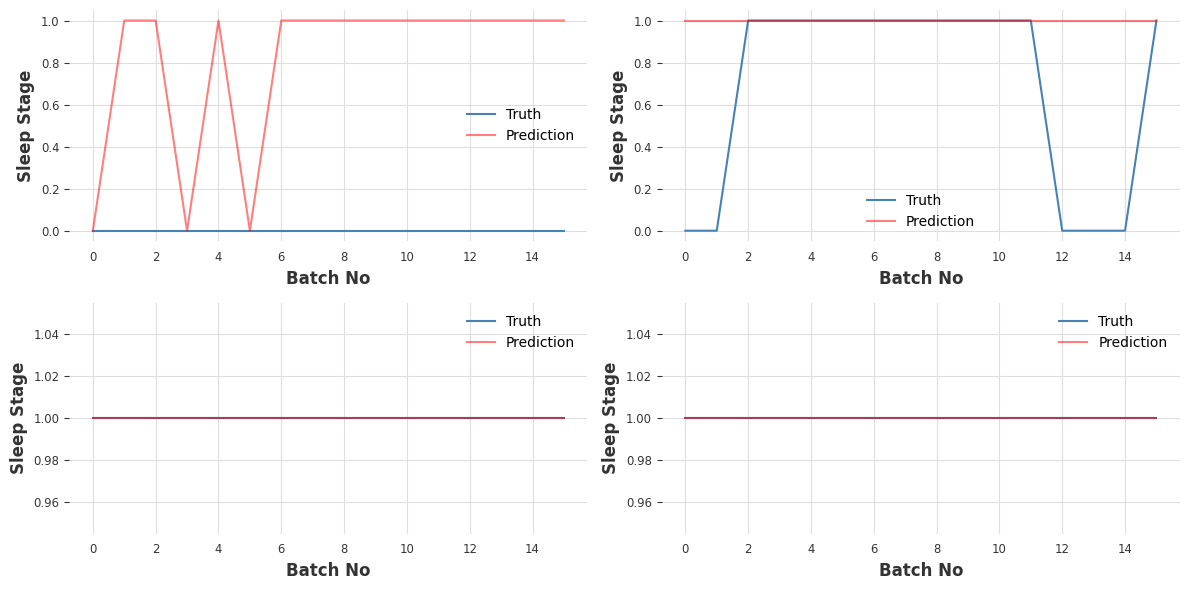

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
(19907, 2, 240) (19907, 1)
Training Loss: 0.49321255
Test Accuracy: 0.8311, Test Loss: 0.4056
tn 19
fp 149
fn 0
tp 714
cm [[ 19 149]
 [  0 714]]


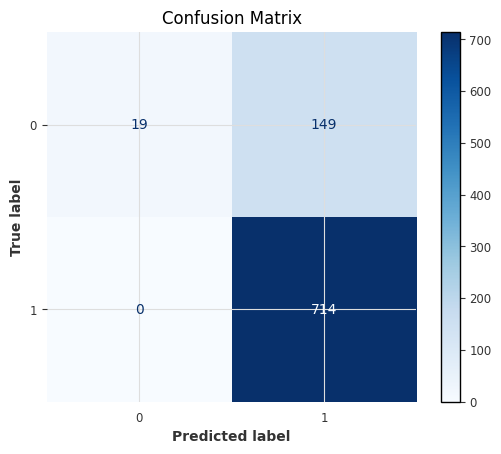

Precision: 0.8273
Recall (Sensitivity): 1.0000
Specificity: 0.1131
F1-Score: 0.9055
AUC-ROC: 0.5565


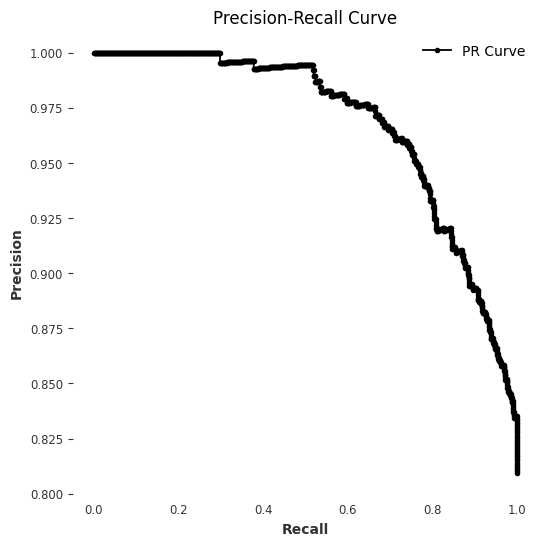

Fold 2 metrics: {'accuracy': tensor(0.8311), 'precision': 0.8273464658169177, 'recall': 1.0, 'f1': 0.9055168040583386, 'roc_auc': 0.5565476190476191, 'specificity': 0.1130952380952381}


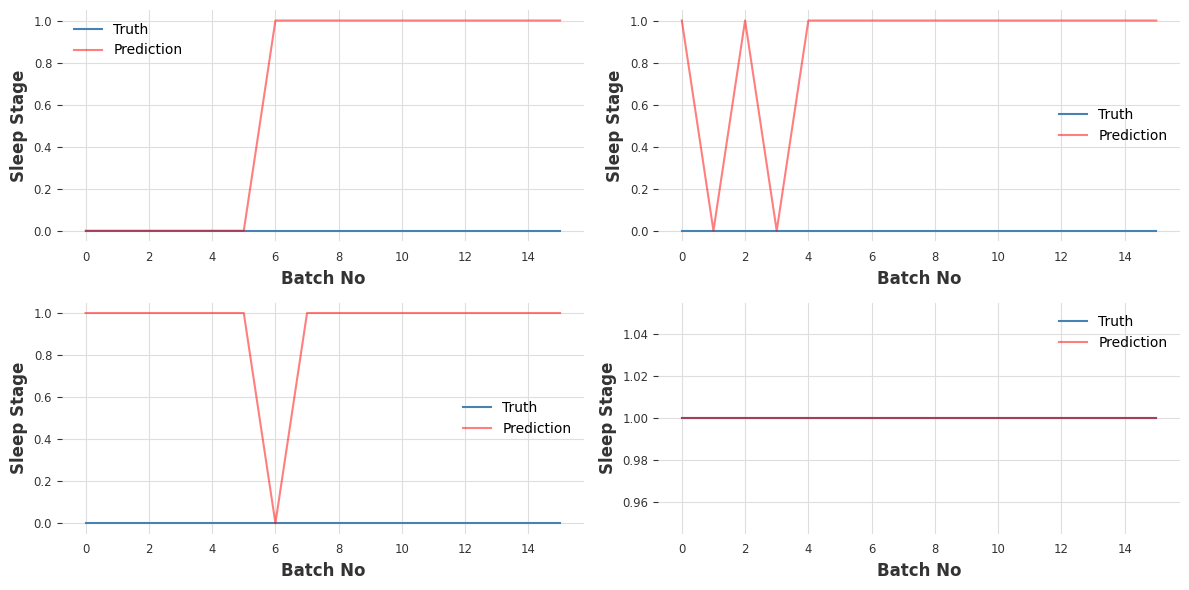

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
(19963, 2, 240) (19963, 1)
Training Loss: 0.51493726
Test Accuracy: 0.6320, Test Loss: 0.7145
tn 7
fp 302
fn 2
tp 515
cm [[  7 302]
 [  2 515]]
Precision: 0.6304
Recall (Sensitivity): 0.9961
Specificity: 0.0227
F1-Score: 0.7721
AUC-ROC: 0.5094
Fold 3 metrics: {'accuracy': tensor(0.6320), 'precision': 0.6303549571603427, 'recall': 0.9961315280464217, 'f1': 0.7721139430284858, 'roc_auc': 0.5093926248646348, 'specificity': 0.022653721682847898}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
(19981, 2, 240) (19981, 1)
Training Loss: 0.48447209
Test Accuracy: 0.8837, Test Loss: 0.4999
tn 1
fp 91
fn 3
tp 713
cm [[  1  91]
 [  3 713]]
Precision: 0.8868
Recall (Sensitivity): 0.9958
Specificity: 0.0109
F1-Score: 0.9382
AUC-ROC: 0.5033
Fold 4 metrics: {'accuracy': tensor(0.8837), 'precision': 0.8868159203980099, 'recall': 0.9958100558659218, 'f1': 0.9381578947368421, 'roc_auc': 0.5033398105416566

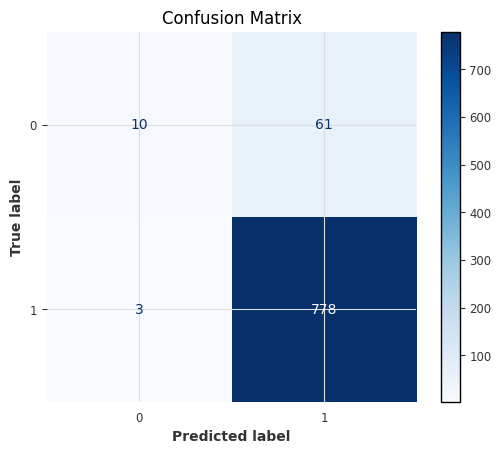

Precision: 0.9273
Recall (Sensitivity): 0.9962
Specificity: 0.1408
F1-Score: 0.9605
AUC-ROC: 0.5685


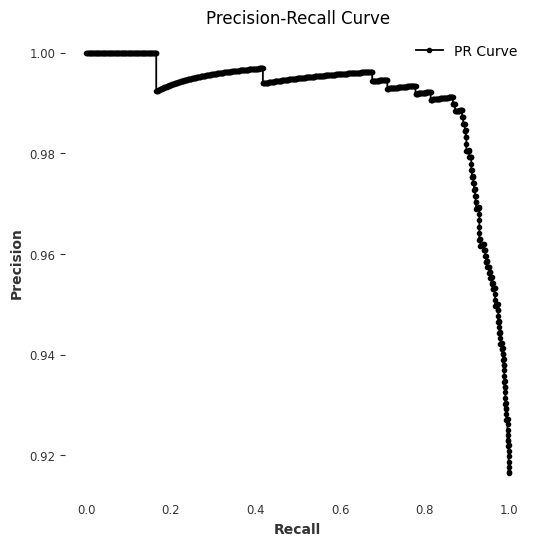

Fold 16 metrics: {'accuracy': tensor(0.9249), 'precision': 0.9272943980929678, 'recall': 0.9961587708066582, 'f1': 0.9604938271604938, 'roc_auc': 0.5685019206145967, 'specificity': 0.14084507042253522}


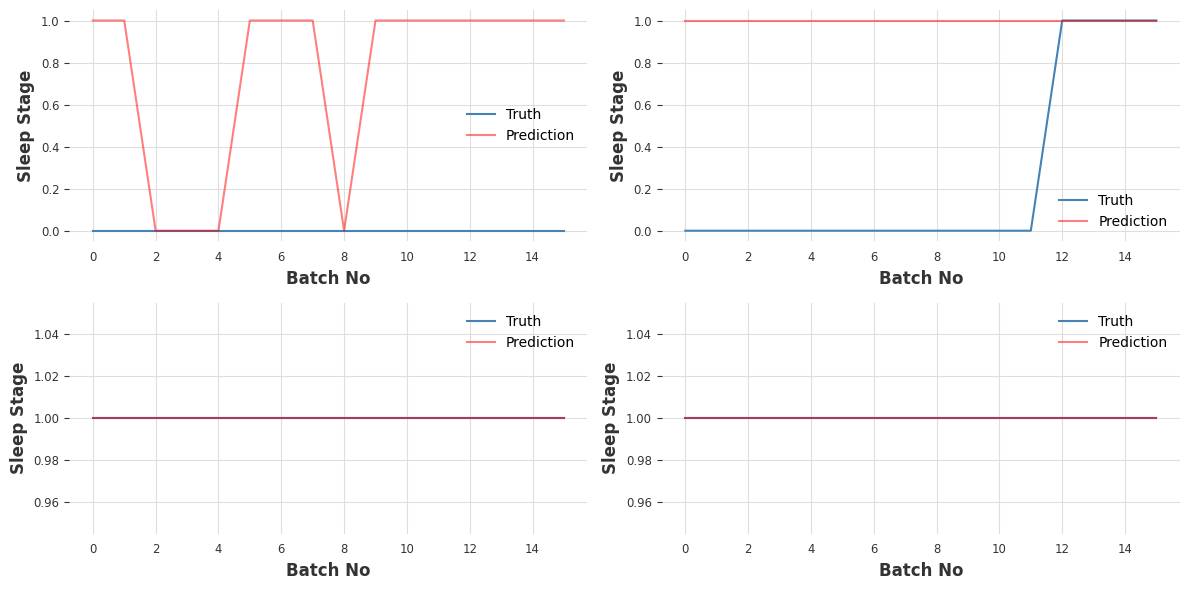

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
(20037, 2, 240) (20037, 1)
Training Loss: 0.51294681
Test Accuracy: 0.7673, Test Loss: 0.5209
tn 3
fp 166
fn 9
tp 574
cm [[  3 166]
 [  9 574]]
Precision: 0.7757
Recall (Sensitivity): 0.9846
Specificity: 0.0178
F1-Score: 0.8677
AUC-ROC: 0.5012
Fold 17 metrics: {'accuracy': tensor(0.7673), 'precision': 0.7756756756756756, 'recall': 0.9845626072041166, 'f1': 0.8677248677248677, 'roc_auc': 0.5011570432470287, 'specificity': 0.01775147928994083}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
(19876, 2, 240) (19876, 1)
Training Loss: 0.49391145
Test Accuracy: 0.8182, Test Loss: 0.4959
tn 3
fp 163
fn 3
tp 744
cm [[  3 163]
 [  3 744]]
Precision: 0.8203
Recall (Sensitivity): 0.9960
Specificity: 0.0181
F1-Score: 0.8996
AUC-ROC: 0.5070
Fold 18 metrics: {'accuracy': tensor(0.8182), 'precision': 0.8202866593164277, 'recall': 0.9959839357429718, 'f1': 0.8996372430471584, 'roc_auc': 0.507028112449

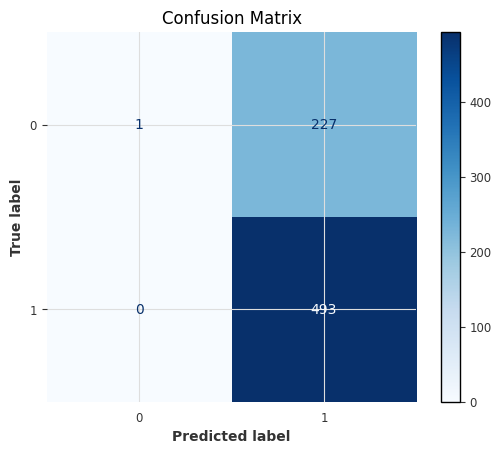

Precision: 0.6847
Recall (Sensitivity): 1.0000
Specificity: 0.0044
F1-Score: 0.8129
AUC-ROC: 0.5022


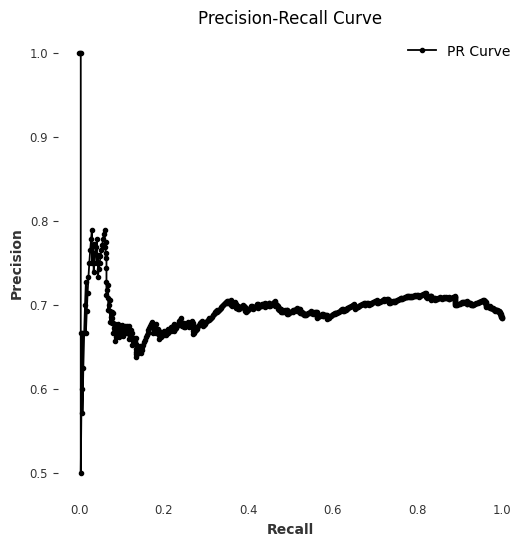

Fold 25 metrics: {'accuracy': tensor(0.6852), 'precision': 0.6847222222222222, 'recall': 1.0, 'f1': 0.8128606760098929, 'roc_auc': 0.5021929824561404, 'specificity': 0.0043859649122807015}


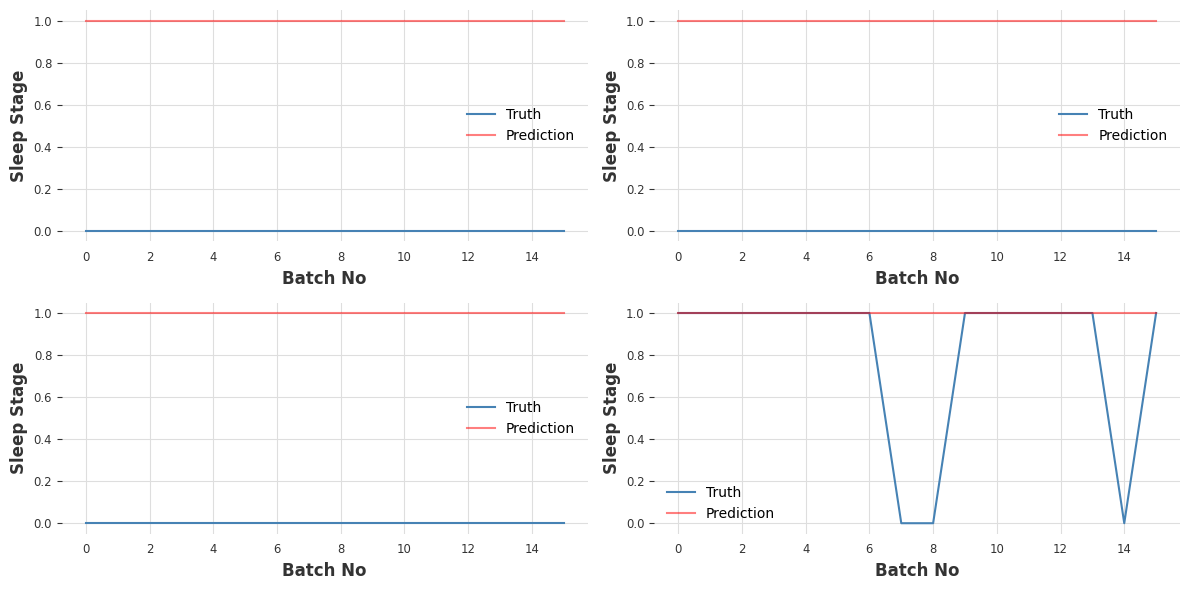

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.7521, Std: 0.1153
Precision - Mean: 0.7756, Std: 0.1258
Recall - Mean: 0.9196, Std: 0.1967
F1 - Mean: 0.8277, Std: 0.1716
Roc_auc - Mean: 0.5369, Std: 0.0401
Specificity - Mean: 0.1542, Std: 0.2064


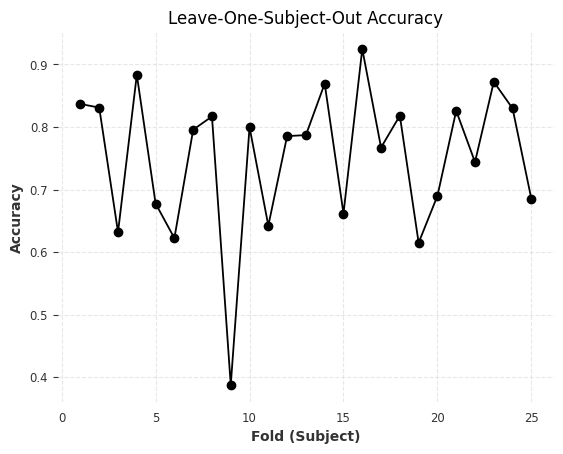

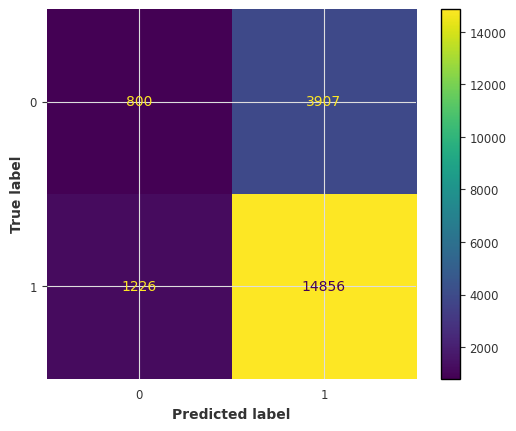

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

fold_results = []
fold = []
criterion = nn.BCEWithLogitsLoss() 
results = []
# Cross-validation loop
for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out the current subject for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels for training
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]


    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    print(train_features.shape, train_labels.shape)

    # Create a dataset and DataLoader
    train_dataset = list(zip(torch.tensor(train_features, dtype=torch.float32),
                             torch.tensor(train_labels, dtype=torch.float32)))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = list(zip(torch.tensor(test_data[0], dtype=torch.float32),
                            torch.tensor(test_data[1], dtype=torch.float32)))
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


    # Reinitialize the model for each fold
    model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    # for t in range(num_epochs):
    #     print(f"Epoch {t+1}\n-------------------------------")
    train_loop(num_epochs=num_epochs, train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, model=model, criterion=criterion, device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]


    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
        plotter(test_results)
    # load_metrics(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Confusion Matrix (combine all folds)
y_true_all = np.concatenate([fold["y_true"] for fold in fold])
y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [95]:
# model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
# criterion = nn.BCEWithLogitsLoss() 
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# epochs = num_epochs
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs,train_loader=train_dataloader, model=model, criterion=criterion, optimizer=optimizer, device=device)
#     test_results = test_loop(test_loader=test_dataloader, model=model, criterion=criterion, device=device)

# y_true = [i[0] for i in test_results]
# y_prob = [i[1] for i in test_results]
# x = torch.cat(y_prob).cpu().detach().numpy()
# load_metrics(test_results)
# plotter(test_results)
# print("Done!")

## Using Proccessed Data (SG filter, normalization, SMOTE) on LSTM model

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Training Loss: 0.68487009
Test Accuracy: 0.6711, Test Loss: 0.6792
tn 33
fp 88
fn 158
tp 469
cm [[ 33  88]
 [158 469]]


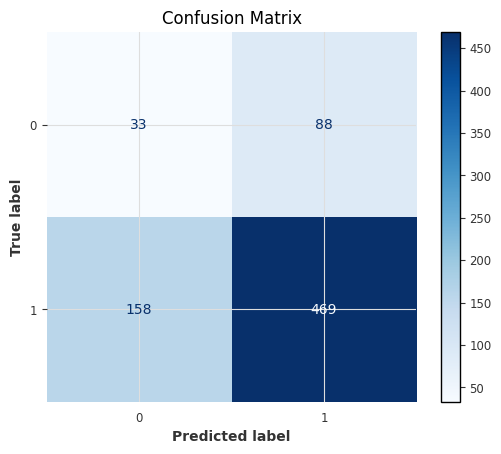

Precision: 0.8420
Recall (Sensitivity): 0.7480
Specificity: 0.2727
F1-Score: 0.7922
AUC-ROC: 0.5104


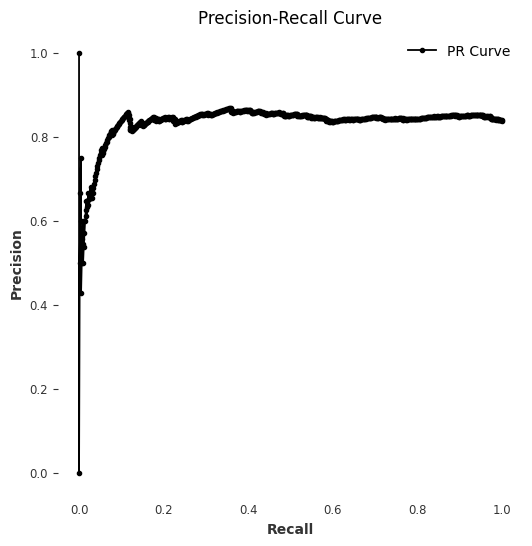

Fold 1 metrics: {'accuracy': tensor(0.6711), 'precision': 0.8420107719928187, 'recall': 0.748006379585327, 'f1': 0.7922297297297297, 'roc_auc': 0.5103668261562998, 'specificity': 0.2727272727272727}


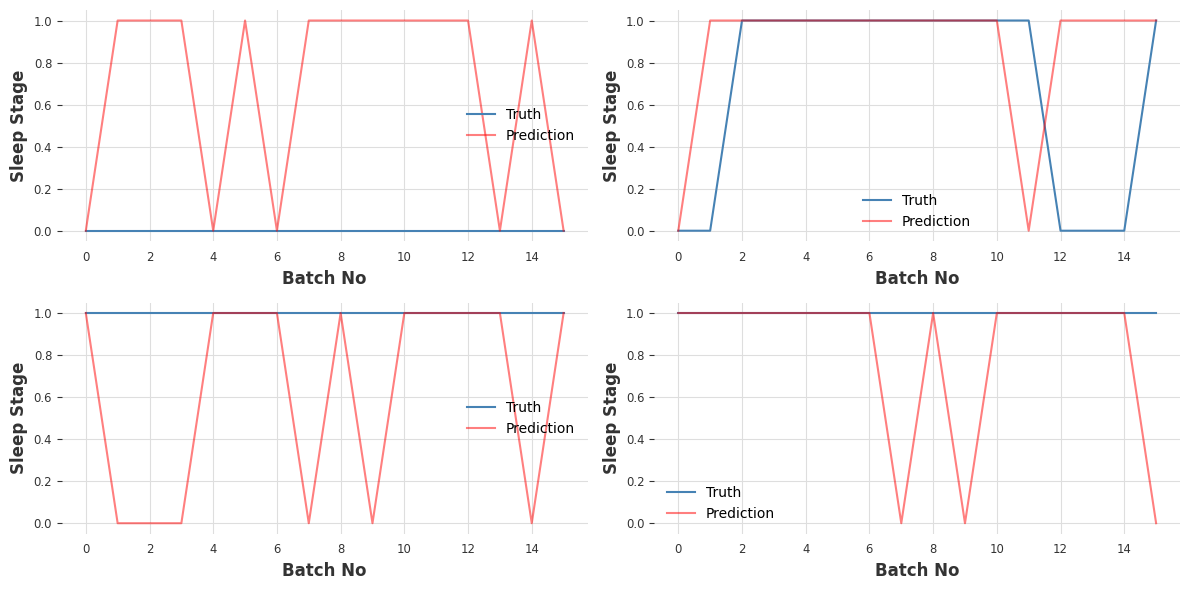

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Training Loss: 0.66086894
Test Accuracy: 0.2143, Test Loss: 0.7055
tn 163
fp 5
fn 688
tp 26
cm [[163   5]
 [688  26]]


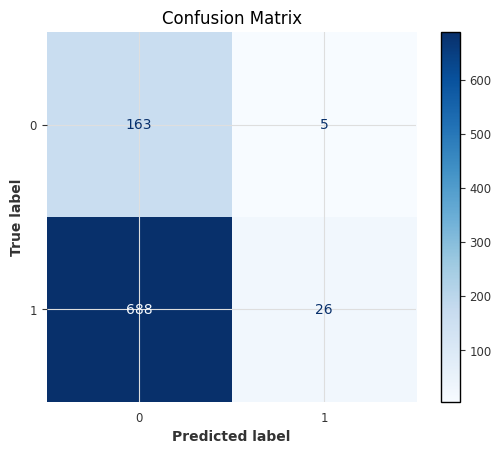

Precision: 0.8387
Recall (Sensitivity): 0.0364
Specificity: 0.9702
F1-Score: 0.0698
AUC-ROC: 0.5033


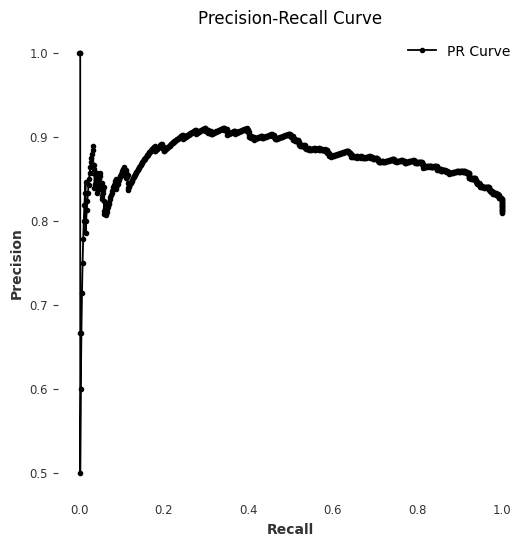

Fold 2 metrics: {'accuracy': tensor(0.2143), 'precision': 0.8387096774193549, 'recall': 0.036414565826330535, 'f1': 0.0697986577181208, 'roc_auc': 0.503326330532213, 'specificity': 0.9702380952380952}


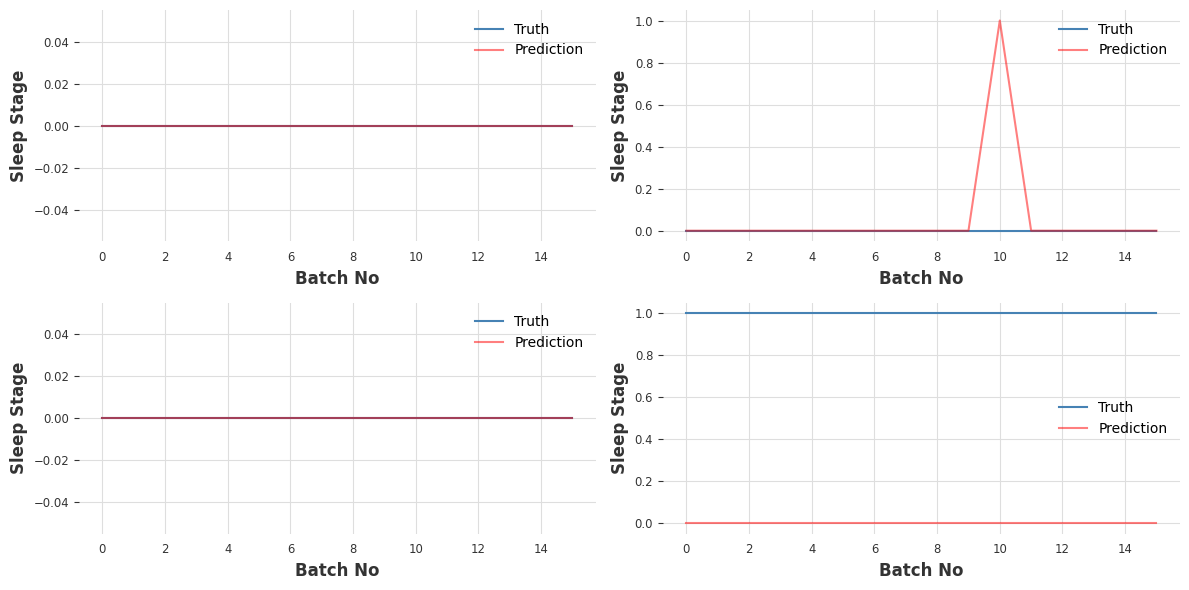

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Training Loss: 0.68476910
Test Accuracy: 0.6271, Test Loss: 0.6815
tn 1
fp 308
fn 0
tp 517
cm [[  1 308]
 [  0 517]]
Precision: 0.6267
Recall (Sensitivity): 1.0000
Specificity: 0.0032
F1-Score: 0.7705
AUC-ROC: 0.5016
Fold 3 metrics: {'accuracy': tensor(0.6271), 'precision': 0.6266666666666667, 'recall': 1.0, 'f1': 0.7704918032786885, 'roc_auc': 0.5016181229773462, 'specificity': 0.003236245954692557}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
Training Loss: 0.68657066
Test Accuracy: 0.4554, Test Loss: 0.6988
tn 68
fp 24
fn 416
tp 300
cm [[ 68  24]
 [416 300]]
Precision: 0.9259
Recall (Sensitivity): 0.4190
Specificity: 0.7391
F1-Score: 0.5769
AUC-ROC: 0.5791
Fold 4 metrics: {'accuracy': tensor(0.4554), 'precision': 0.9259259259259259, 'recall': 0.41899441340782123, 'f1': 0.5769230769230769, 'roc_auc': 0.5790624240952149, 'specificity': 0.7391304347826086}
Leave-One-Subject-Out CV - S

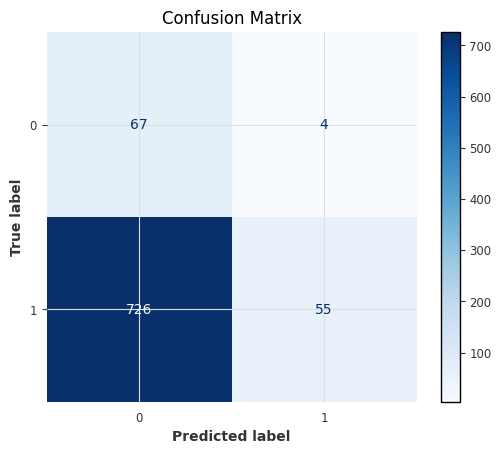

Precision: 0.9322
Recall (Sensitivity): 0.0704
Specificity: 0.9437
F1-Score: 0.1310
AUC-ROC: 0.5070


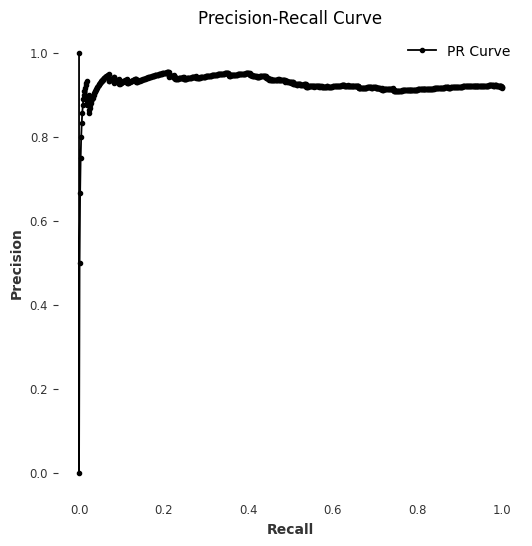

Fold 16 metrics: {'accuracy': tensor(0.1432), 'precision': 0.9322033898305084, 'recall': 0.07042253521126761, 'f1': 0.13095238095238096, 'roc_auc': 0.5070422535211268, 'specificity': 0.9436619718309859}


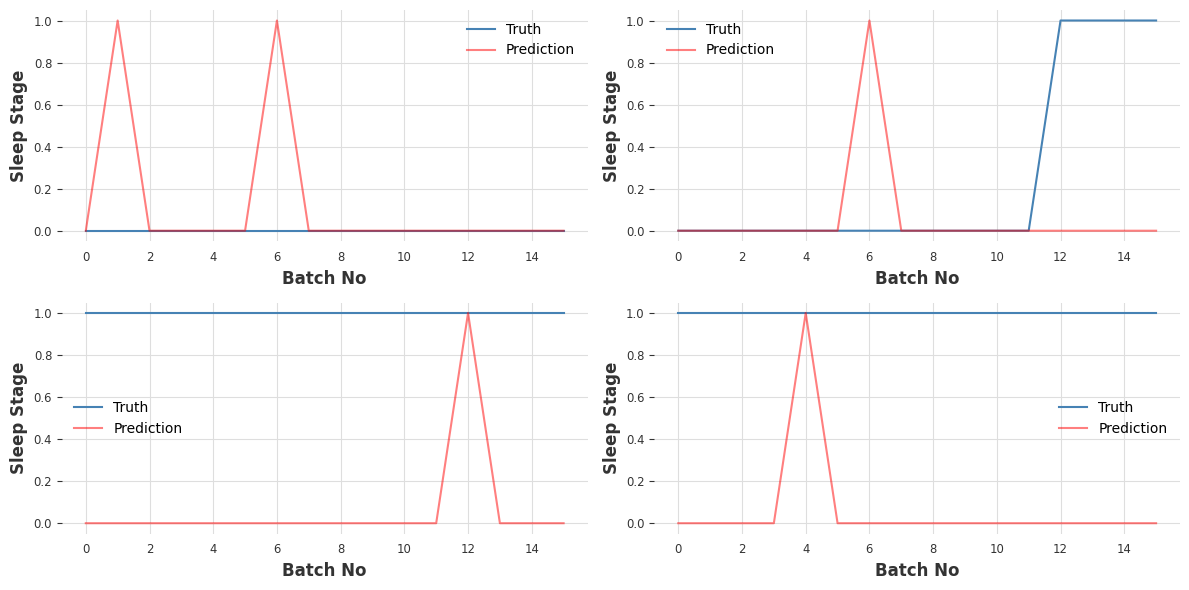

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Training Loss: 0.64247806
Test Accuracy: 0.6636, Test Loss: 0.6031
tn 55
fp 114
fn 139
tp 444
cm [[ 55 114]
 [139 444]]
Precision: 0.7957
Recall (Sensitivity): 0.7616
Specificity: 0.3254
F1-Score: 0.7783
AUC-ROC: 0.5435
Fold 17 metrics: {'accuracy': tensor(0.6636), 'precision': 0.7956989247311828, 'recall': 0.7615780445969125, 'f1': 0.7782646801051709, 'roc_auc': 0.5435109157895806, 'specificity': 0.3254437869822485}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
Training Loss: 0.68297280
Test Accuracy: 0.3625, Test Loss: 0.6788
tn 148
fp 18
fn 564
tp 183
cm [[148  18]
 [564 183]]
Precision: 0.9104
Recall (Sensitivity): 0.2450
Specificity: 0.8916
F1-Score: 0.3861
AUC-ROC: 0.5683
Fold 18 metrics: {'accuracy': tensor(0.3625), 'precision': 0.9104477611940298, 'recall': 0.24497991967871485, 'f1': 0.3860759493670886, 'roc_auc': 0.5682730923694779, 'specificity': 0.891566265060241}
Leave-On

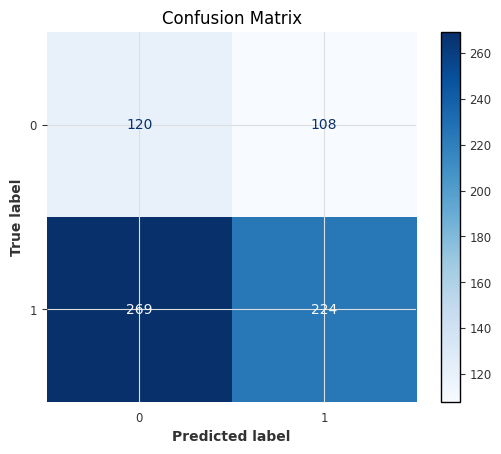

Precision: 0.6747
Recall (Sensitivity): 0.4544
Specificity: 0.5263
F1-Score: 0.5430
AUC-ROC: 0.4903


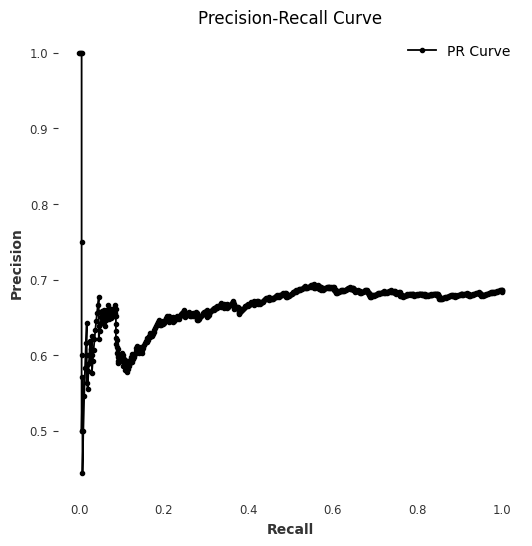

Fold 25 metrics: {'accuracy': tensor(0.4771), 'precision': 0.6746987951807228, 'recall': 0.4543610547667343, 'f1': 0.5430303030303031, 'roc_auc': 0.4903384221202093, 'specificity': 0.5263157894736842}


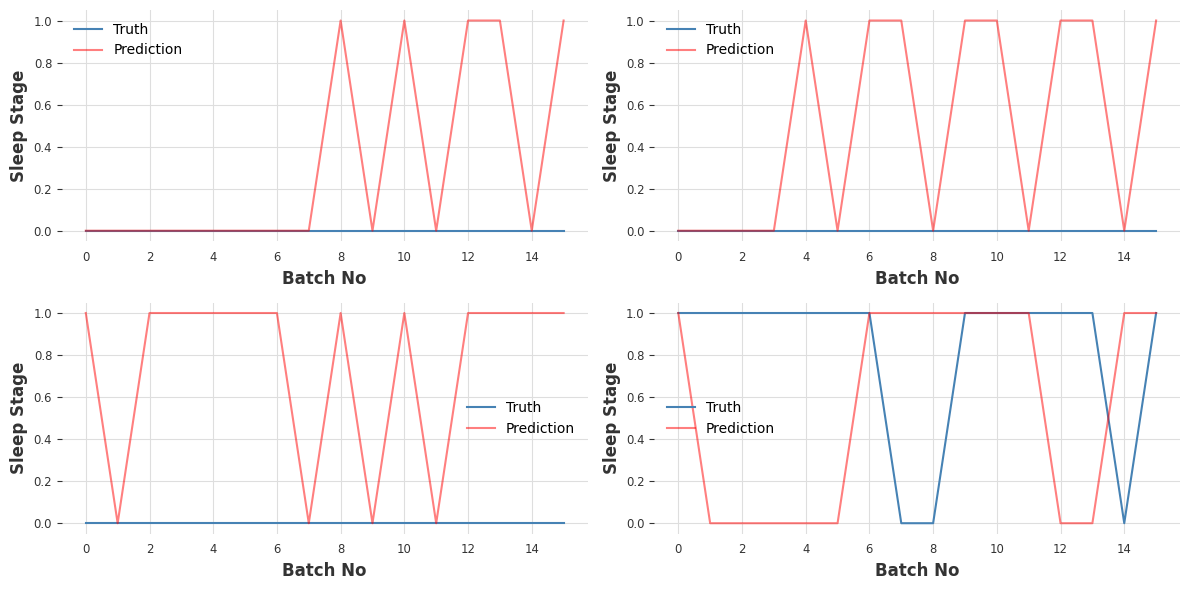

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.5562, Std: 0.2071
Precision - Mean: 0.7929, Std: 0.1299
Recall - Mean: 0.6062, Std: 0.3448
F1 - Mean: 0.6077, Std: 0.2843
Roc_auc - Mean: 0.5235, Std: 0.0444
Specificity - Mean: 0.4409, Std: 0.3432


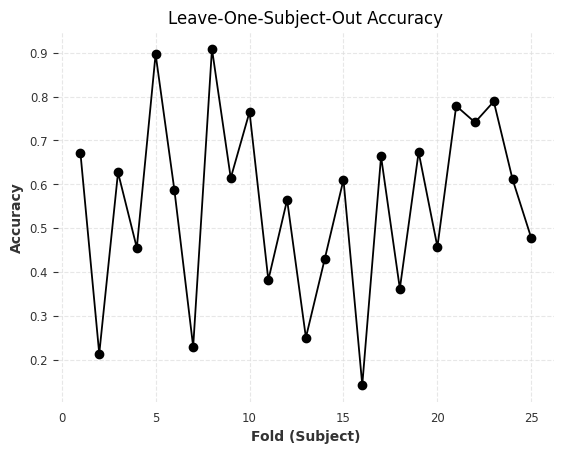

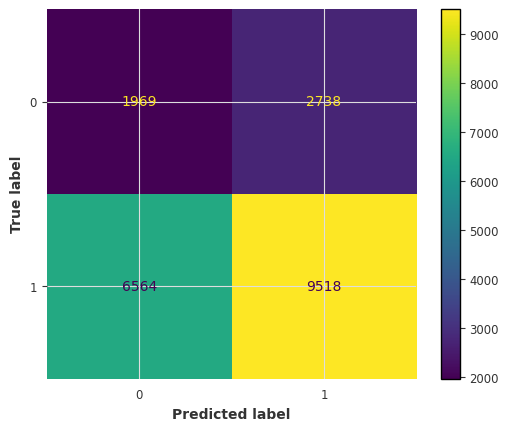

In [109]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

fold_results = []
fold = []
criterion = nn.BCEWithLogitsLoss() 
results = []
# Cross-validation loop
for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out the current subject for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels for training
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    # Preprocess the data
    train_norm = normalize_channels(train_features)
    train_sg = apply_sg_filter(train_norm)
    test_norm = normalize_channels(test_features)
    test_sg = apply_sg_filter(test_norm)

    # Balance training data using SMOTE
    train_flat = train_sg.reshape(train_sg.shape[0], -1)  # Flatten for SMOTE
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    train_resampled, labels_resampled = sm.fit_resample(train_flat, train_labels)

    # Restore shape after SMOTE
    train_resampled = restore_shape(train_resampled, train_sg.shape)

    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_resampled, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(labels_resampled, dtype=torch.float32).unsqueeze(1)
    processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    # Create DataLoaders
    train_dataset = list(zip(processed_X_train_tensor, processed_y_train_tensor))
    test_dataset = list(zip(processed_X_test_tensor, processed_y_test_tensor))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    # for t in range(num_epochs):
    #     print(f"Epoch {t+1}\n-------------------------------")
    train_loop(num_epochs=num_epochs, train_loader=train_loader, model=model, criterion=criterion, optimizer=optimizer, device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, model=model, criterion=criterion, device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]


    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
    # load_metrics(test_results)
        plotter(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Confusion Matrix (combine all folds)
y_true_all = np.concatenate([fold["y_true"] for fold in fold])
y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [110]:
# model = SleepLSTM(input_size, hidden_size, num_layers).to(device)
# criterion = nn.BCEWithLogitsLoss() 
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# epochs = num_epochs
# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs,train_loader=processed_train_dataloader, model=model, criterion=criterion, optimizer=optimizer, device=device)
#     test_results = test_loop(test_loader=processed_test_dataloader, model=model, criterion=criterion, device=device)

# y_true = [i[0] for i in test_results]
# y_prob = [i[1] for i in test_results]
# x = torch.cat(y_prob).cpu().detach().numpy()
# load_metrics(test_results)
# plotter(test_results)
# print("Done!")

## Using Unprocessed Data on CNN -> BiLSTM model

In [111]:
# modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
# criterioncnnlstm = nn.BCEWithLogitsLoss()
# optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)

# for t in range(epochs):
#     print(f"Epoch {t+1}\n-------------------------------")
#     train_loop(num_epochs=num_epochs,train_loader=train_dataloader, model=modelcnnlstm, criterion=criterioncnnlstm, optimizer=optimizercnnlstm, device=device)
#     test_results = test_loop(test_loader=test_dataloader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)

# y_true = [i[0] for i in test_results]
# y_prob = [i[1] for i in test_results]
# x = torch.cat(y_prob).cpu().detach().numpy()
# load_metrics(test_results)
# plotter(test_results)
# print("Done!")

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
(20041, 2, 240) (20041, 1)
Training Loss: 0.35432858
Test Accuracy: 0.8877, Test Loss: 0.2680
tn 50
fp 71
fn 13
tp 614
cm [[ 50  71]
 [ 13 614]]


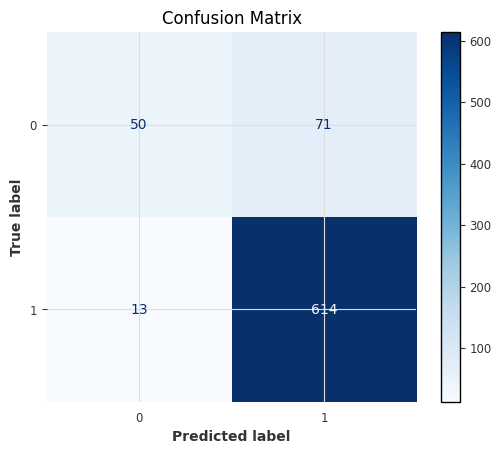

Precision: 0.8964
Recall (Sensitivity): 0.9793
Specificity: 0.4132
F1-Score: 0.9360
AUC-ROC: 0.6962


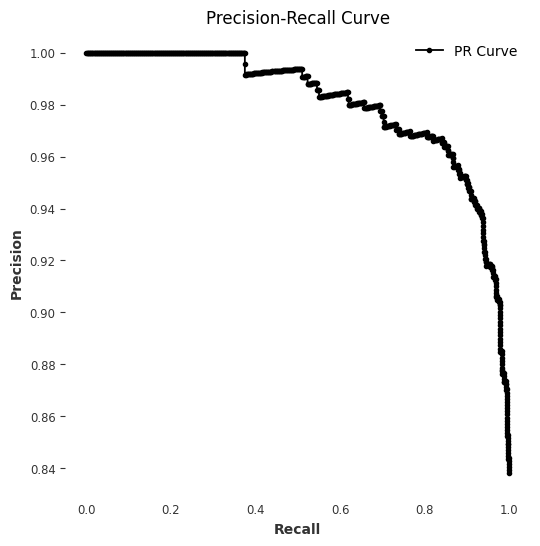

Fold 1 metrics: {'accuracy': tensor(0.8877), 'precision': 0.8963503649635036, 'recall': 0.9792663476874003, 'f1': 0.9359756097560976, 'roc_auc': 0.696244744091634, 'specificity': 0.4132231404958678}


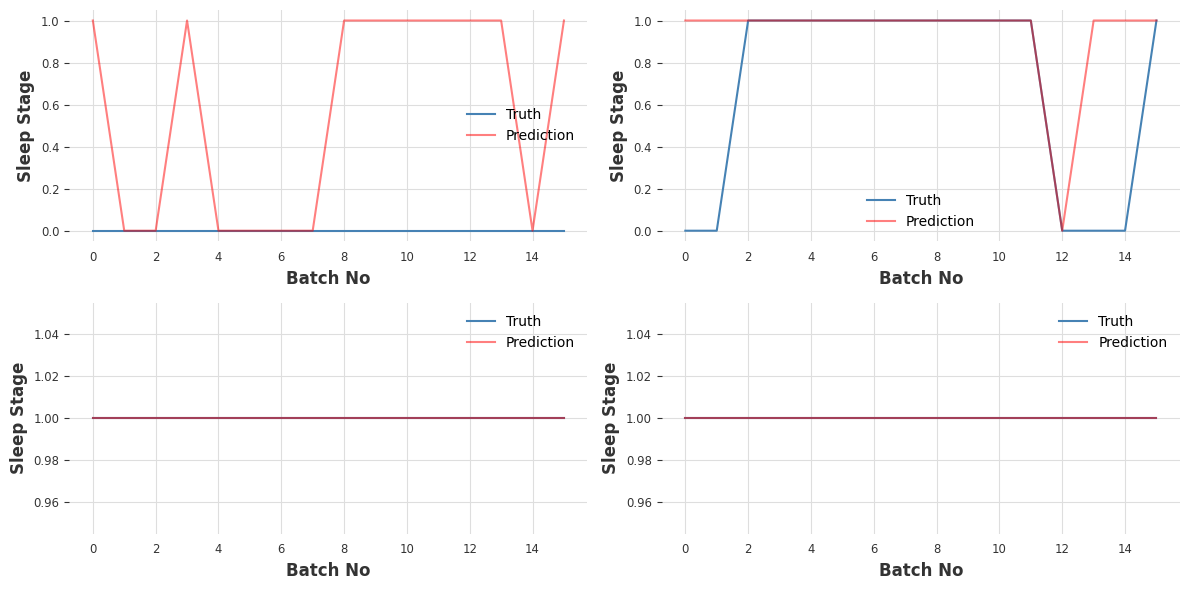

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
(19907, 2, 240) (19907, 1)
Training Loss: 0.33816860
Test Accuracy: 0.9104, Test Loss: 0.2278
tn 102
fp 66
fn 13
tp 701
cm [[102  66]
 [ 13 701]]


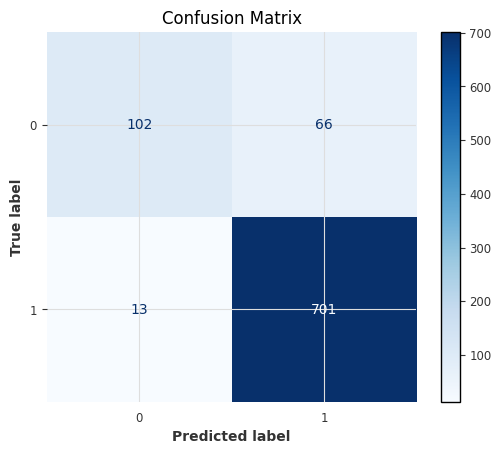

Precision: 0.9140
Recall (Sensitivity): 0.9818
Specificity: 0.6071
F1-Score: 0.9467
AUC-ROC: 0.7945


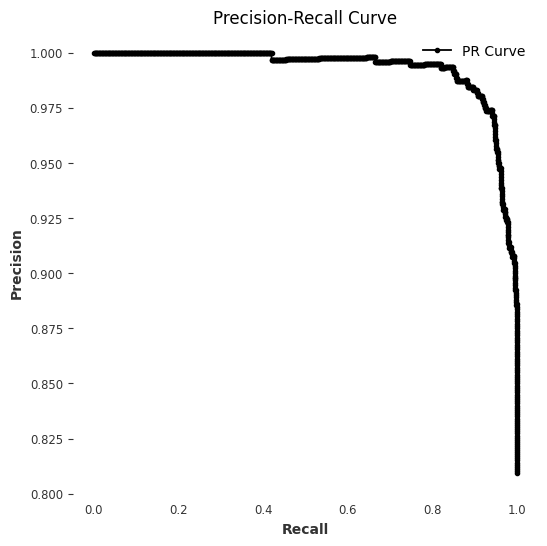

Fold 2 metrics: {'accuracy': tensor(0.9104), 'precision': 0.9139504563233377, 'recall': 0.9817927170868347, 'f1': 0.9466576637407157, 'roc_auc': 0.794467787114846, 'specificity': 0.6071428571428571}


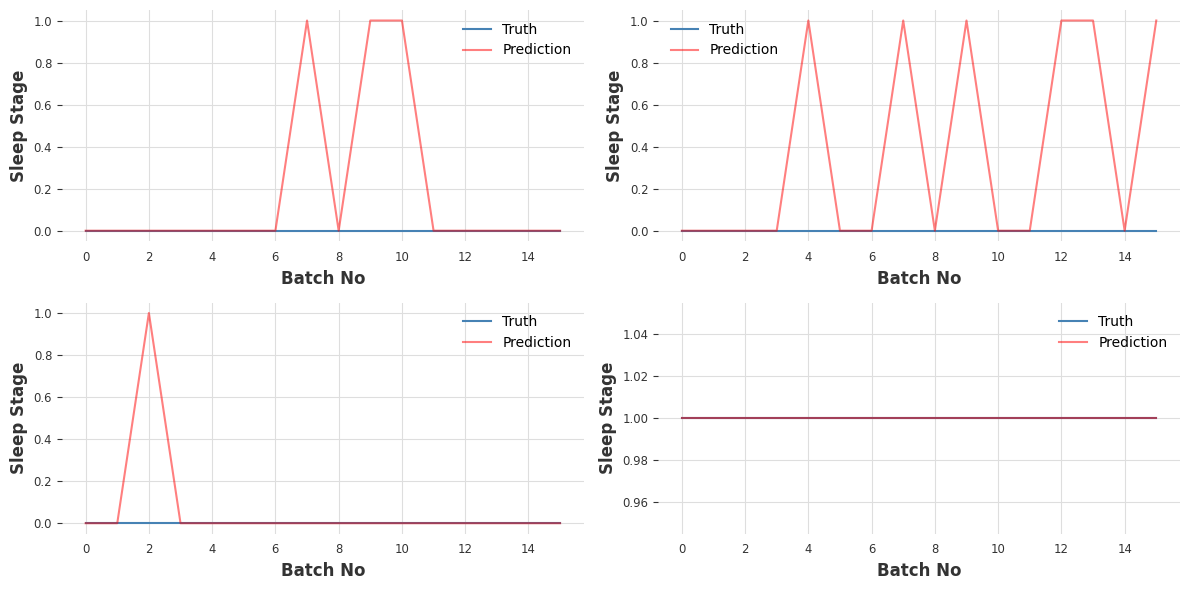

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
(19963, 2, 240) (19963, 1)
Training Loss: 0.30131262
Test Accuracy: 0.6150, Test Loss: 0.8373
tn 50
fp 259
fn 59
tp 458
cm [[ 50 259]
 [ 59 458]]
Precision: 0.6388
Recall (Sensitivity): 0.8859
Specificity: 0.1618
F1-Score: 0.7423
AUC-ROC: 0.5238
Fold 3 metrics: {'accuracy': tensor(0.6150), 'precision': 0.6387726638772664, 'recall': 0.8858800773694391, 'f1': 0.7423014586709886, 'roc_auc': 0.5238461875520335, 'specificity': 0.16181229773462782}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
(19981, 2, 240) (19981, 1)
Training Loss: 0.38244583
Test Accuracy: 0.8973, Test Loss: 0.2414
tn 53
fp 39
fn 44
tp 672
cm [[ 53  39]
 [ 44 672]]
Precision: 0.9451
Recall (Sensitivity): 0.9385
Specificity: 0.5761
F1-Score: 0.9418
AUC-ROC: 0.7573
Fold 4 metrics: {'accuracy': tensor(0.8973), 'precision': 0.9451476793248945, 'recall': 0.9385474860335196, 'f1': 0.9418360196215837, 'roc_auc': 0.7573172212776

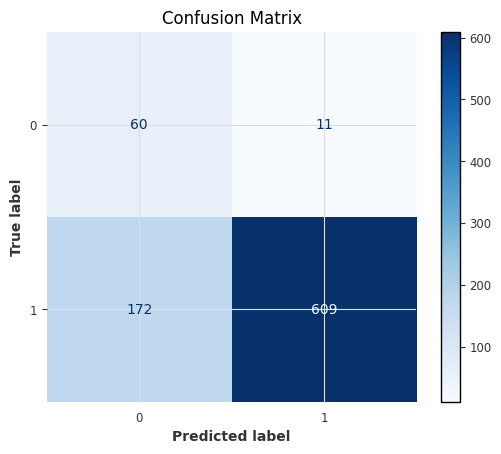

Precision: 0.9823
Recall (Sensitivity): 0.7798
Specificity: 0.8451
F1-Score: 0.8694
AUC-ROC: 0.8124


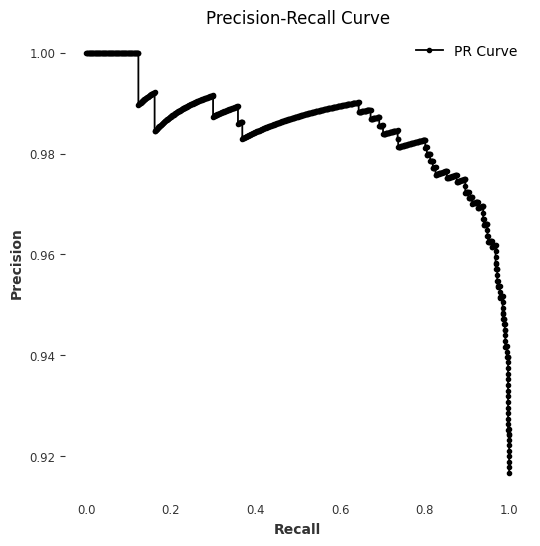

Fold 16 metrics: {'accuracy': tensor(0.7852), 'precision': 0.9822580645161291, 'recall': 0.7797695262483995, 'f1': 0.8693790149892934, 'roc_auc': 0.8124199743918054, 'specificity': 0.8450704225352113}


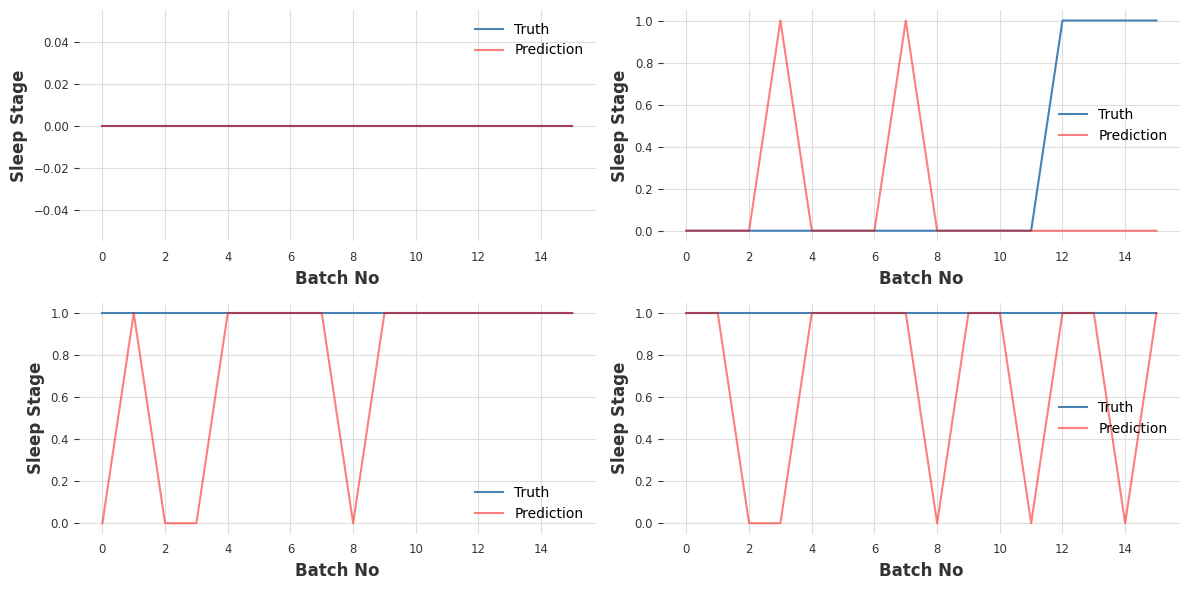

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
(20037, 2, 240) (20037, 1)
Training Loss: 0.35365294
Test Accuracy: 0.7527, Test Loss: 0.4088
tn 135
fp 34
fn 152
tp 431
cm [[135  34]
 [152 431]]
Precision: 0.9269
Recall (Sensitivity): 0.7393
Specificity: 0.7988
F1-Score: 0.8225
AUC-ROC: 0.7690
Fold 17 metrics: {'accuracy': tensor(0.7527), 'precision': 0.9268817204301075, 'recall': 0.7392795883361921, 'f1': 0.8225190839694656, 'roc_auc': 0.7690480781917646, 'specificity': 0.7988165680473372}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
(19876, 2, 240) (19876, 1)
Training Loss: 0.32152850
Test Accuracy: 0.8729, Test Loss: 0.3210
tn 108
fp 58
fn 58
tp 689
cm [[108  58]
 [ 58 689]]
Precision: 0.9224
Recall (Sensitivity): 0.9224
Specificity: 0.6506
F1-Score: 0.9224
AUC-ROC: 0.7865
Fold 18 metrics: {'accuracy': tensor(0.8729), 'precision': 0.9223560910307899, 'recall': 0.9223560910307899, 'f1': 0.9223560910307899, 'roc_auc': 0.78647925

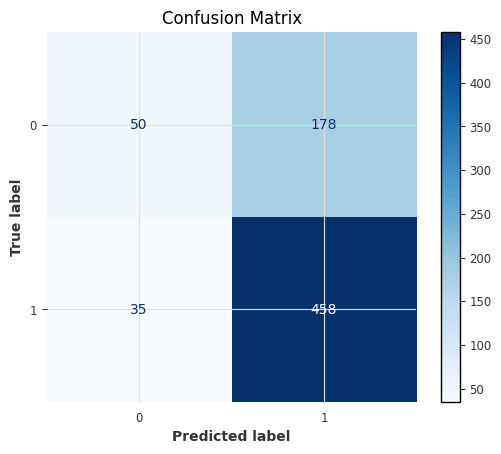

Precision: 0.7201
Recall (Sensitivity): 0.9290
Specificity: 0.2193
F1-Score: 0.8113
AUC-ROC: 0.5742


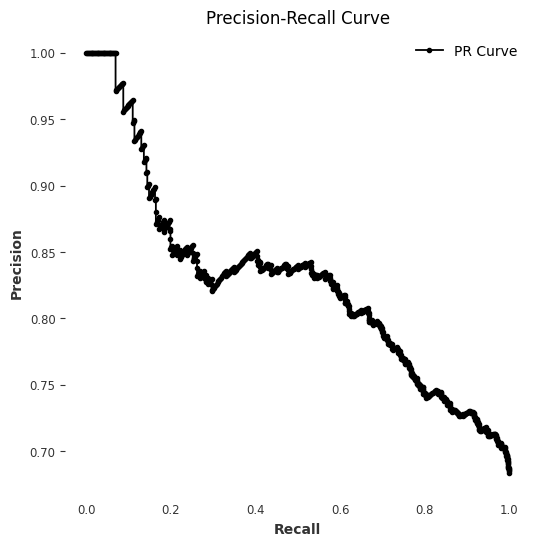

Fold 25 metrics: {'accuracy': tensor(0.7046), 'precision': 0.720125786163522, 'recall': 0.9290060851926978, 'f1': 0.8113374667847653, 'roc_auc': 0.5741521654033664, 'specificity': 0.21929824561403508}


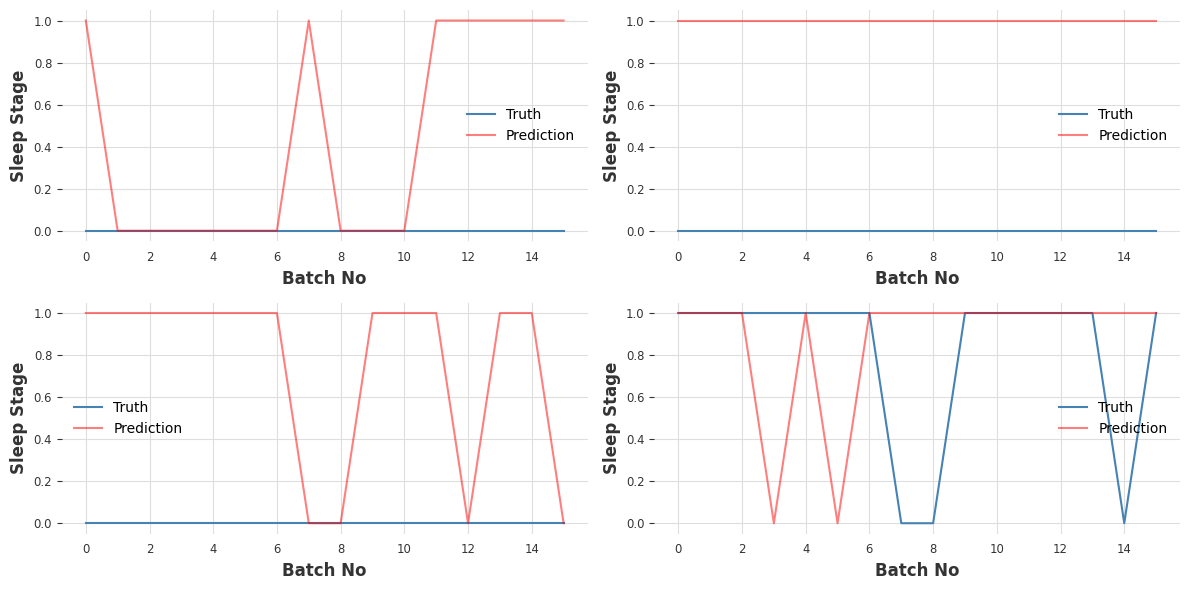

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.7951, Std: 0.0902
Precision - Mean: 0.8500, Std: 0.1174
Recall - Mean: 0.9062, Std: 0.0892
F1 - Mean: 0.8676, Std: 0.0654
Roc_auc - Mean: 0.7088, Std: 0.1018
Specificity - Mean: 0.5114, Std: 0.2502


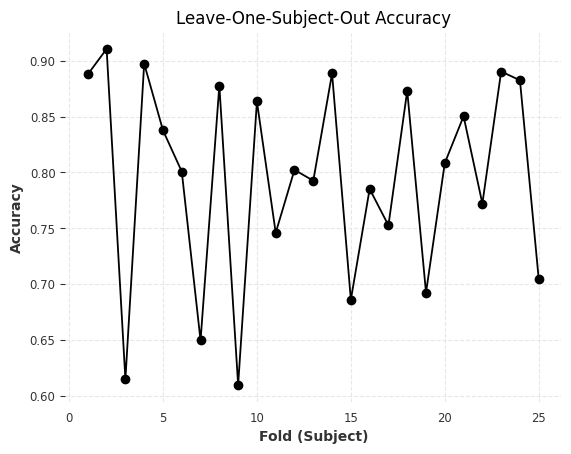

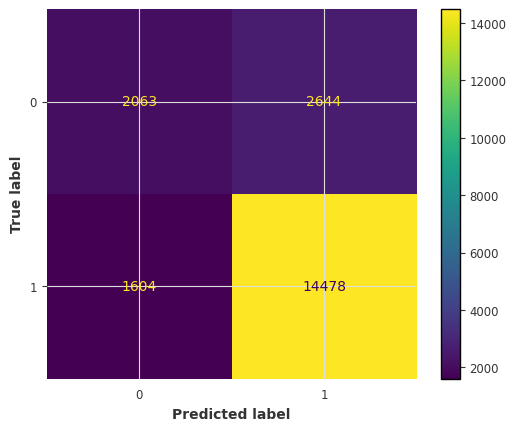

In [112]:
fold_results = []
fold = []
results = []

criterioncnnlstm = nn.BCEWithLogitsLoss()
# Cross-validation loop
for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out the current subject for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels for training
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]


    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    print(train_features.shape, train_labels.shape)

    # Create a dataset and DataLoader
    train_dataset = list(zip(torch.tensor(train_features, dtype=torch.float32),
                             torch.tensor(train_labels, dtype=torch.float32)))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = list(zip(torch.tensor(test_data[0], dtype=torch.float32),
                            torch.tensor(test_data[1], dtype=torch.float32)))
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


    # Reinitialize the model for each fold
    modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
    optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)

    # Train the model
    # for t in range(num_epochs):
    #     print(f"Epoch {t+1}\n-------------------------------")
    train_loop(num_epochs=num_epochs, train_loader=train_loader, model=modelcnnlstm, criterion=criterion, optimizer=optimizercnnlstm, device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]


    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
        plotter(test_results)
    # load_metrics(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Confusion Matrix (combine all folds)
y_true_all = np.concatenate([fold["y_true"] for fold in fold])
y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


## Using Proccessed Data (SG filter, normalization, SMOTE) on CNN -> LSTM model

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Training Loss: 0.38201083
Test Accuracy: 0.7206, Test Loss: 0.5831
tn 101
fp 20
fn 189
tp 438
cm [[101  20]
 [189 438]]


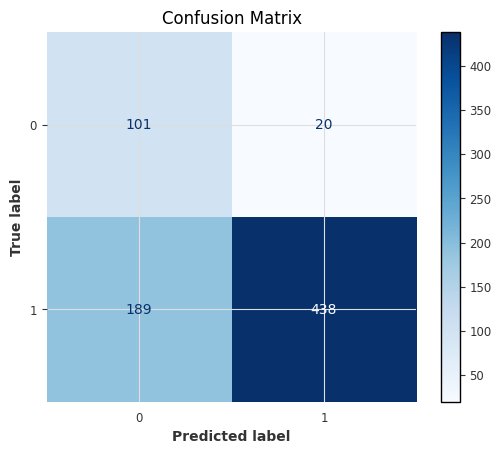

Precision: 0.9563
Recall (Sensitivity): 0.6986
Specificity: 0.8347
F1-Score: 0.8074
AUC-ROC: 0.7666


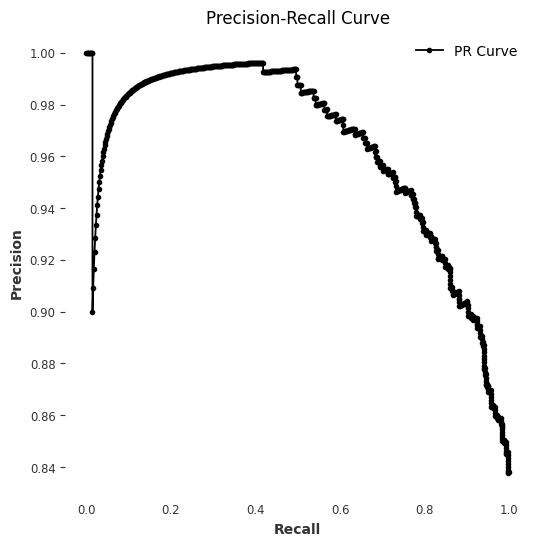

Fold 1 metrics: {'accuracy': tensor(0.7206), 'precision': 0.9563318777292577, 'recall': 0.6985645933014354, 'f1': 0.8073732718894009, 'roc_auc': 0.766637668551544, 'specificity': 0.8347107438016529}


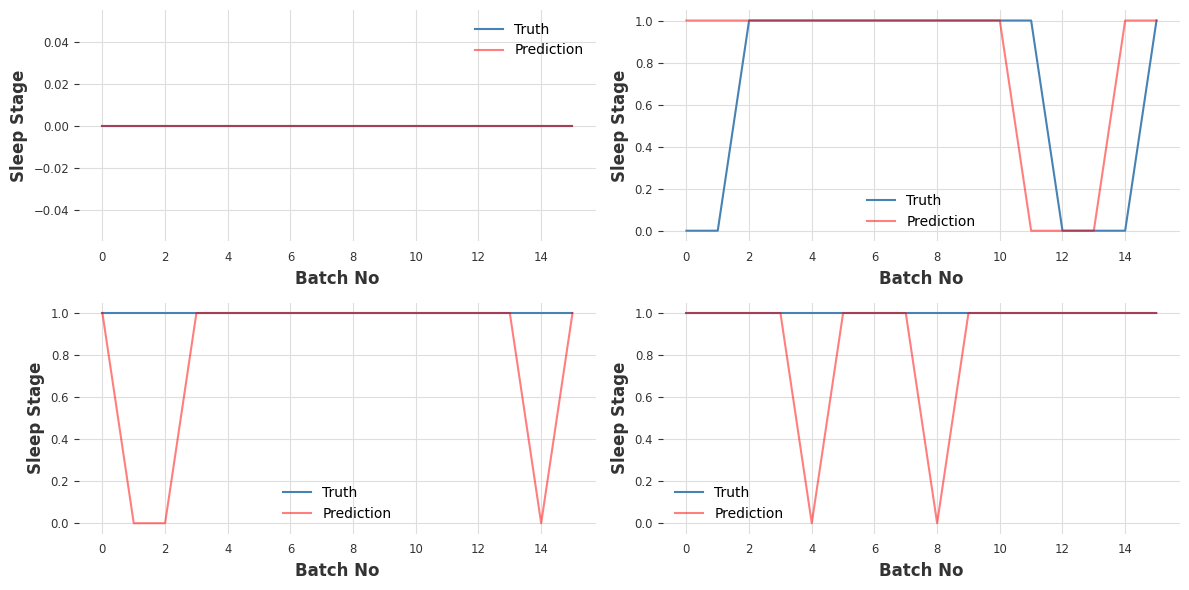

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Training Loss: 0.36633592
Test Accuracy: 0.5567, Test Loss: 0.6477
tn 168
fp 0
fn 391
tp 323
cm [[168   0]
 [391 323]]


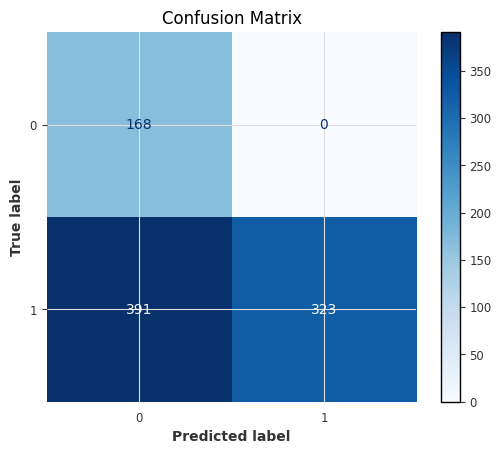

Precision: 1.0000
Recall (Sensitivity): 0.4524
Specificity: 1.0000
F1-Score: 0.6230
AUC-ROC: 0.7262


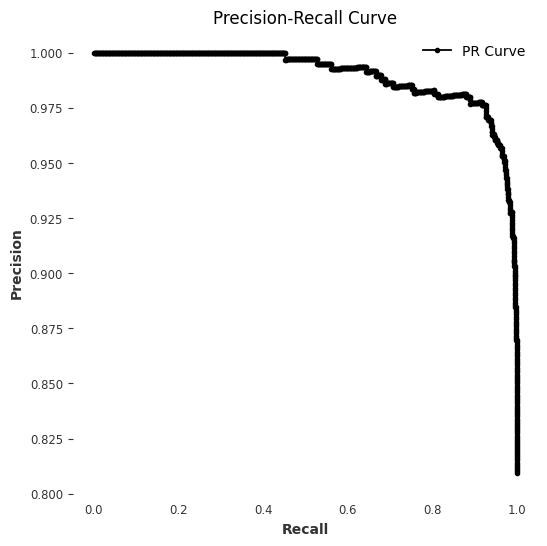

Fold 2 metrics: {'accuracy': tensor(0.5567), 'precision': 1.0, 'recall': 0.4523809523809524, 'f1': 0.6229508196721312, 'roc_auc': 0.7261904761904762, 'specificity': 1.0}


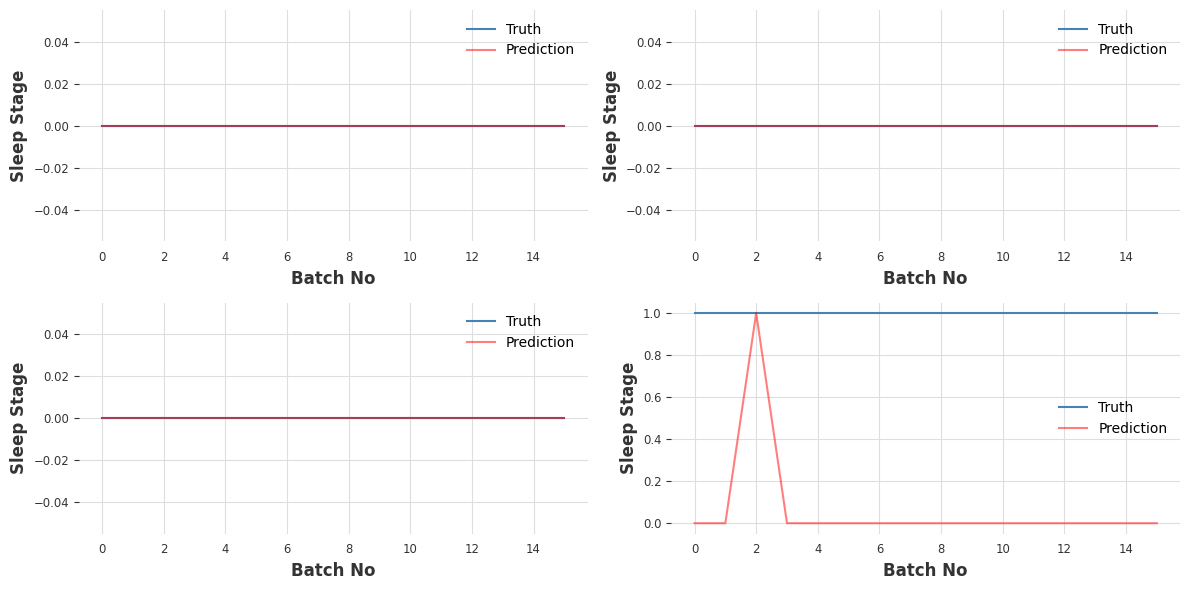

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Training Loss: 0.33382245
Test Accuracy: 0.7433, Test Loss: 0.5603
tn 229
fp 80
fn 132
tp 385
cm [[229  80]
 [132 385]]
Precision: 0.8280
Recall (Sensitivity): 0.7447
Specificity: 0.7411
F1-Score: 0.7841
AUC-ROC: 0.7429
Fold 3 metrics: {'accuracy': tensor(0.7433), 'precision': 0.8279569892473119, 'recall': 0.7446808510638298, 'f1': 0.7841140529531568, 'roc_auc': 0.7428905873442126, 'specificity': 0.7411003236245954}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
Training Loss: 0.36402787
Test Accuracy: 0.4319, Test Loss: 0.8184
tn 88
fp 4
fn 455
tp 261
cm [[ 88   4]
 [455 261]]
Precision: 0.9849
Recall (Sensitivity): 0.3645
Specificity: 0.9565
F1-Score: 0.5321
AUC-ROC: 0.6605
Fold 4 metrics: {'accuracy': tensor(0.4319), 'precision': 0.9849056603773585, 'recall': 0.3645251396648045, 'f1': 0.5321100917431193, 'roc_auc': 0.6605234393976197, 'specificity': 0.9565217391304348}
Leave-One-Subj

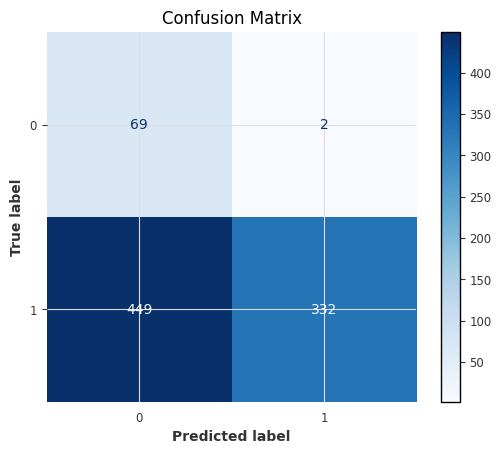

Precision: 0.9940
Recall (Sensitivity): 0.4251
Specificity: 0.9718
F1-Score: 0.5955
AUC-ROC: 0.6985


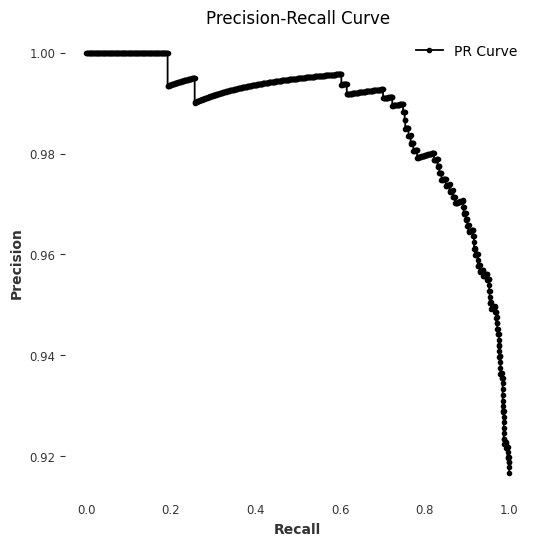

Fold 16 metrics: {'accuracy': tensor(0.4707), 'precision': 0.9940119760479041, 'recall': 0.42509603072983354, 'f1': 0.5955156950672645, 'roc_auc': 0.6984635083226632, 'specificity': 0.971830985915493}


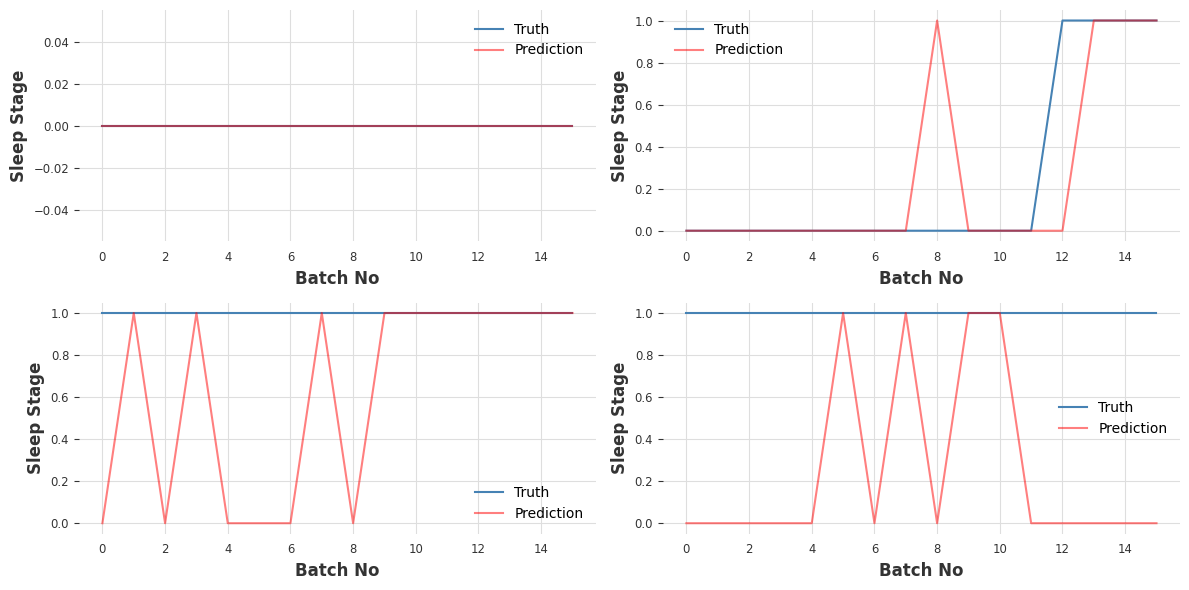

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Training Loss: 0.38904186
Test Accuracy: 0.4176, Test Loss: 1.0458
tn 155
fp 14
fn 424
tp 159
cm [[155  14]
 [424 159]]
Precision: 0.9191
Recall (Sensitivity): 0.2727
Specificity: 0.9172
F1-Score: 0.4206
AUC-ROC: 0.5949
Fold 17 metrics: {'accuracy': tensor(0.4176), 'precision': 0.9190751445086706, 'recall': 0.2727272727272727, 'f1': 0.42063492063492064, 'roc_auc': 0.5949435180204411, 'specificity': 0.9171597633136095}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
Training Loss: 0.39425314
Test Accuracy: 0.3571, Test Loss: 1.0826
tn 164
fp 2
fn 585
tp 162
cm [[164   2]
 [585 162]]
Precision: 0.9878
Recall (Sensitivity): 0.2169
Specificity: 0.9880
F1-Score: 0.3557
AUC-ROC: 0.6024
Fold 18 metrics: {'accuracy': tensor(0.3571), 'precision': 0.9878048780487805, 'recall': 0.21686746987951808, 'f1': 0.3556531284302964, 'roc_auc': 0.6024096385542168, 'specificity': 0.9879518072289156}
Leave-O

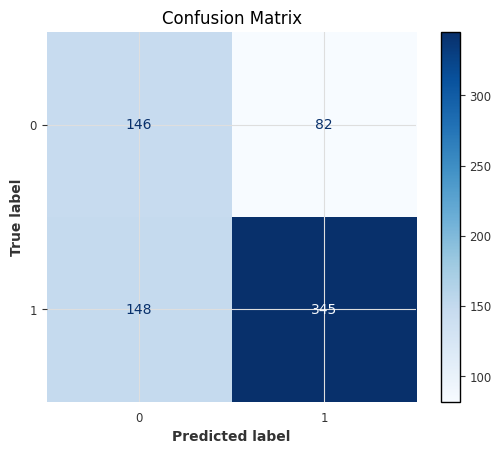

Precision: 0.8080
Recall (Sensitivity): 0.6998
Specificity: 0.6404
F1-Score: 0.7500
AUC-ROC: 0.6701


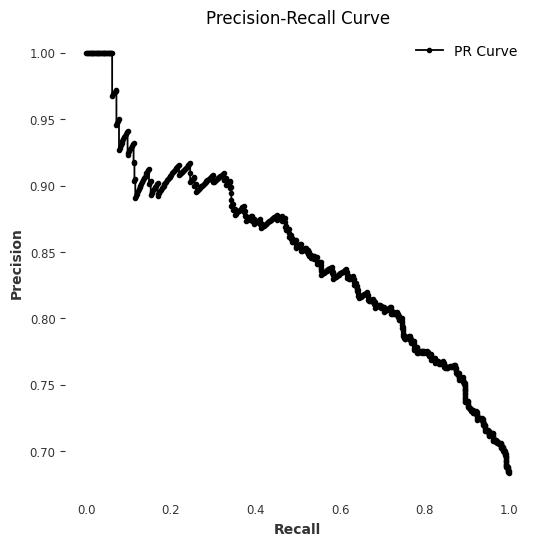

Fold 25 metrics: {'accuracy': tensor(0.6810), 'precision': 0.8079625292740047, 'recall': 0.6997971602434077, 'f1': 0.75, 'roc_auc': 0.670074018718195, 'specificity': 0.6403508771929824}


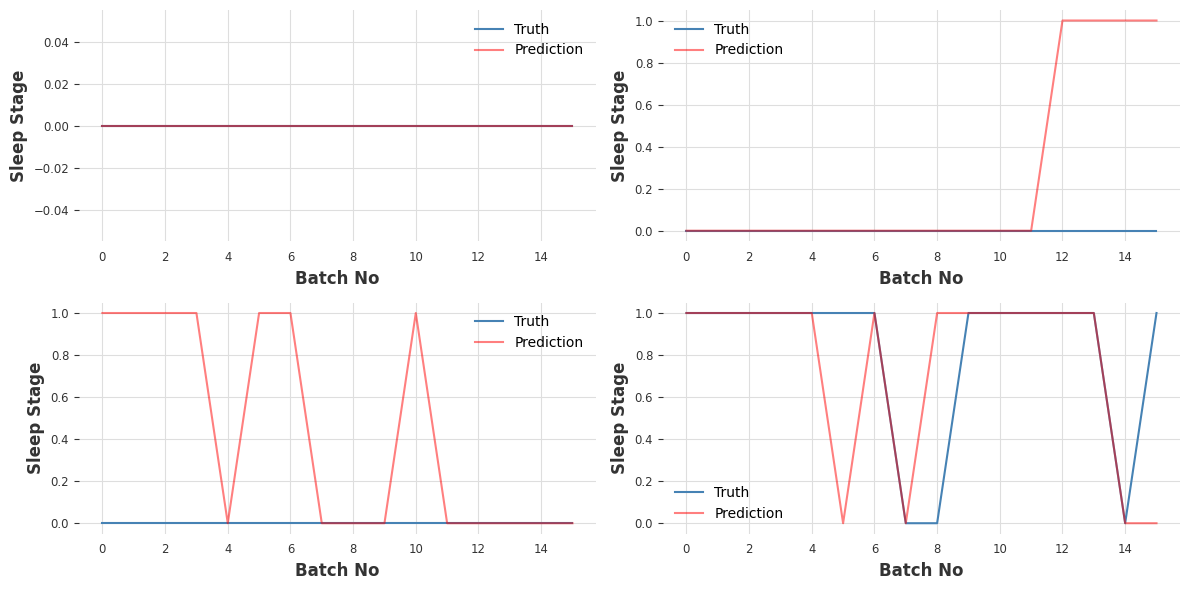

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.6396, Std: 0.1311
Precision - Mean: 0.9226, Std: 0.0761
Recall - Mean: 0.5923, Std: 0.1771
F1 - Mean: 0.7003, Std: 0.1382
Roc_auc - Mean: 0.7128, Std: 0.0669
Specificity - Mean: 0.8333, Std: 0.1469


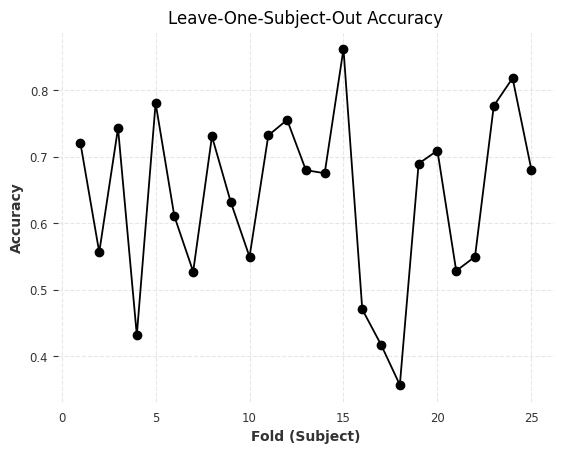

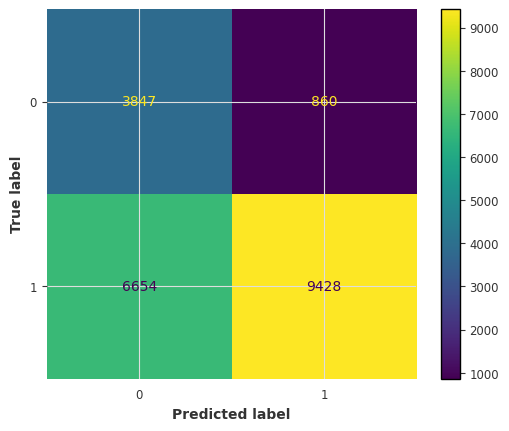

In [114]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

fold_results = []
fold = []
criterioncnnlstm = nn.BCEWithLogitsLoss()
results = []
# Cross-validation loop
for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out the current subject for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels for training
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    # Preprocess the data
    train_norm = normalize_channels(train_features)
    train_sg = apply_sg_filter(train_norm)
    test_norm = normalize_channels(test_features)
    test_sg = apply_sg_filter(test_norm)

    # Balance training data using SMOTE
    train_flat = train_sg.reshape(train_sg.shape[0], -1)  # Flatten for SMOTE
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    train_resampled, labels_resampled = sm.fit_resample(train_flat, train_labels)

    # Restore shape after SMOTE
    train_resampled = restore_shape(train_resampled, train_sg.shape)

    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_resampled, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(labels_resampled, dtype=torch.float32).unsqueeze(1)
    processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    # Create DataLoaders
    train_dataset = list(zip(processed_X_train_tensor, processed_y_train_tensor))
    test_dataset = list(zip(processed_X_test_tensor, processed_y_test_tensor))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
    optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)


    # Train the model
    # for t in range(num_epochs):
    #     print(f"Epoch {t+1}\n-------------------------------")
    train_loop(num_epochs=num_epochs, train_loader=train_loader, model=modelcnnlstm, criterion=criterioncnnlstm, optimizer=optimizercnnlstm, device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]


    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
    # load_metrics(test_results)
        plotter(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Confusion Matrix (combine all folds)
y_true_all = np.concatenate([fold["y_true"] for fold in fold])
y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


CNN + BiLSTM with normalization and SG filter

Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Training Loss: 0.29133056
Test Accuracy: 0.8650, Test Loss: 0.3161
tn 83
fp 38
fn 63
tp 564
cm [[ 83  38]
 [ 63 564]]


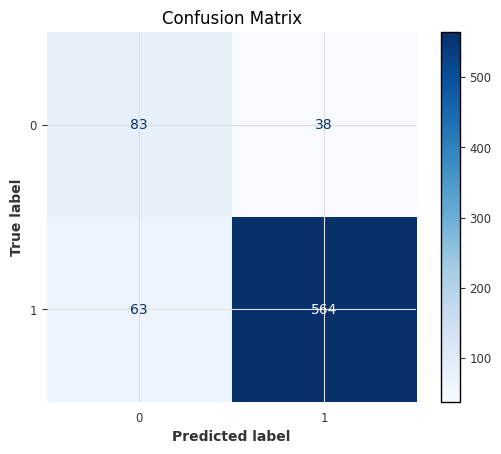

Precision: 0.9369
Recall (Sensitivity): 0.8995
Specificity: 0.6860
F1-Score: 0.9178
AUC-ROC: 0.7927


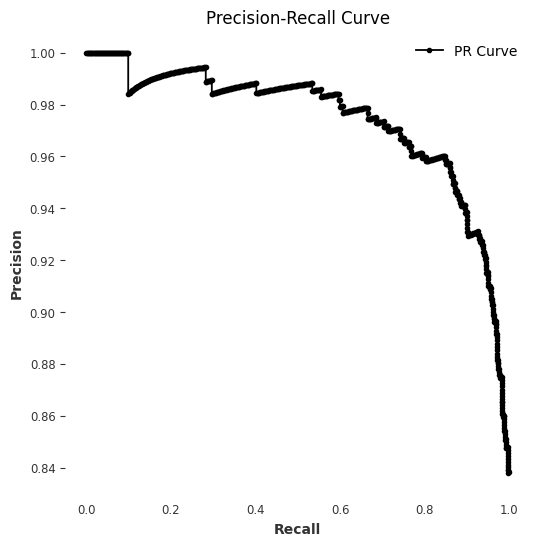

Fold 1 metrics: {'accuracy': tensor(0.8650), 'precision': 0.9368770764119602, 'recall': 0.8995215311004785, 'f1': 0.9178193653376729, 'roc_auc': 0.7927359721618095, 'specificity': 0.6859504132231405}


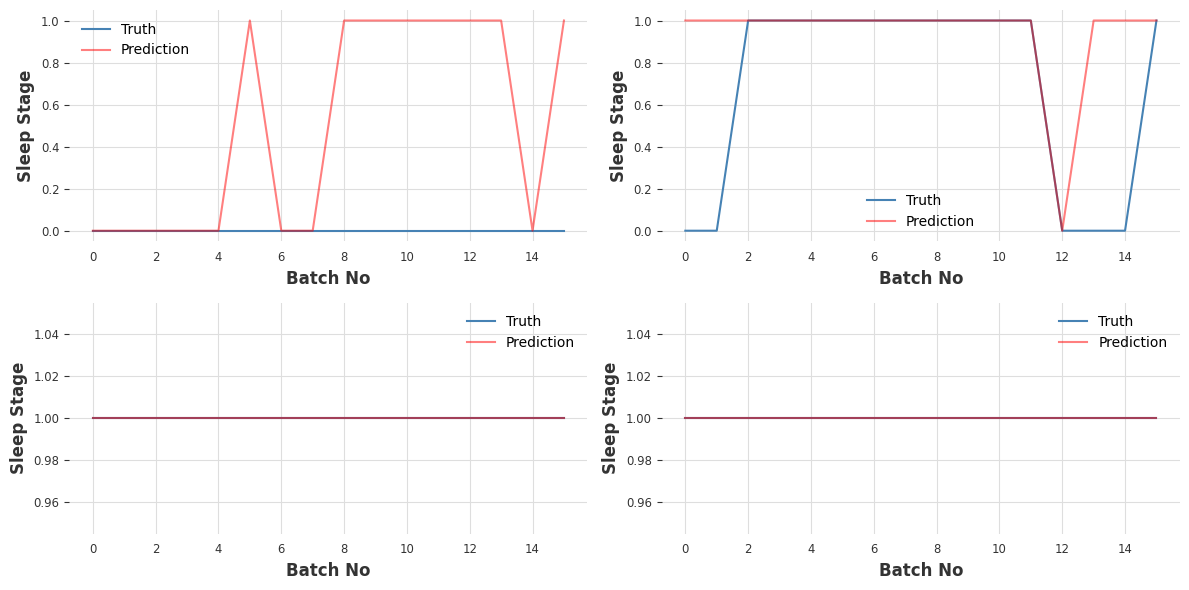

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Training Loss: 0.26553551
Test Accuracy: 0.5522, Test Loss: 0.6627
tn 165
fp 3
fn 392
tp 322
cm [[165   3]
 [392 322]]


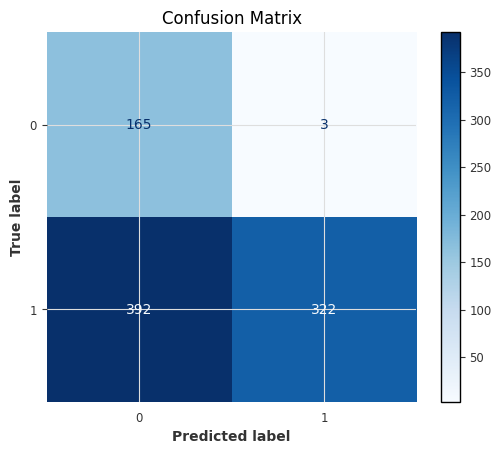

Precision: 0.9908
Recall (Sensitivity): 0.4510
Specificity: 0.9821
F1-Score: 0.6198
AUC-ROC: 0.7166


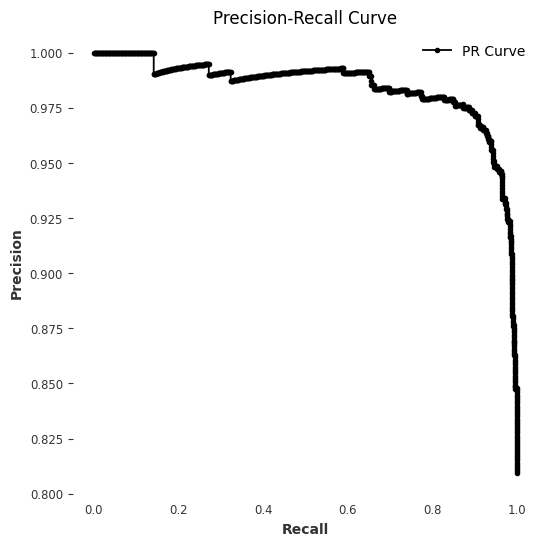

Fold 2 metrics: {'accuracy': tensor(0.5522), 'precision': 0.9907692307692307, 'recall': 0.45098039215686275, 'f1': 0.6198267564966313, 'roc_auc': 0.7165616246498598, 'specificity': 0.9821428571428571}


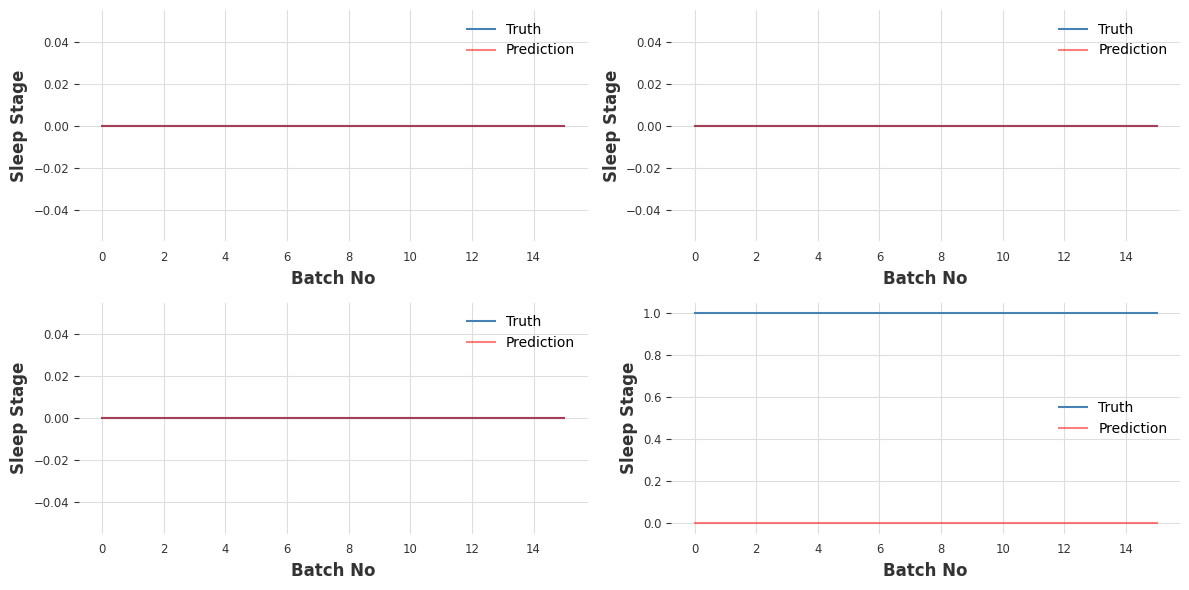

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Training Loss: 0.28671931
Test Accuracy: 0.6804, Test Loss: 0.8506
tn 104
fp 205
fn 59
tp 458
cm [[104 205]
 [ 59 458]]
Precision: 0.6908
Recall (Sensitivity): 0.8859
Specificity: 0.3366
F1-Score: 0.7763
AUC-ROC: 0.6112
Fold 3 metrics: {'accuracy': tensor(0.6804), 'precision': 0.6907993966817496, 'recall': 0.8858800773694391, 'f1': 0.7762711864406779, 'roc_auc': 0.6112248283287325, 'specificity': 0.3365695792880259}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
Training Loss: 0.30464663
Test Accuracy: 0.8020, Test Loss: 0.4851
tn 82
fp 10
fn 150
tp 566
cm [[ 82  10]
 [150 566]]
Precision: 0.9826
Recall (Sensitivity): 0.7905
Specificity: 0.8913
F1-Score: 0.8762
AUC-ROC: 0.8409
Fold 4 metrics: {'accuracy': tensor(0.8020), 'precision': 0.9826388888888888, 'recall': 0.7905027932960894, 'f1': 0.8761609907120743, 'roc_auc': 0.8409035705610881, 'specificity': 0.8913043478260869}
Leave-One-Sub

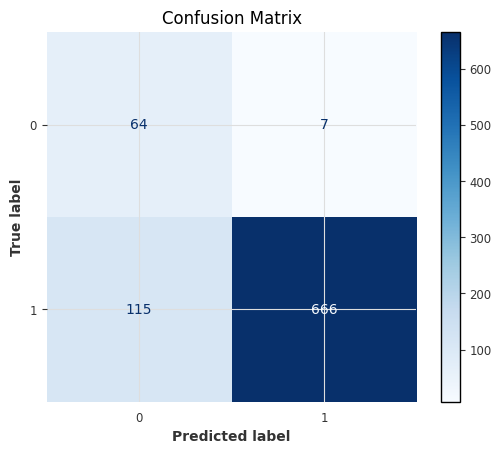

Precision: 0.9896
Recall (Sensitivity): 0.8528
Specificity: 0.9014
F1-Score: 0.9161
AUC-ROC: 0.8771


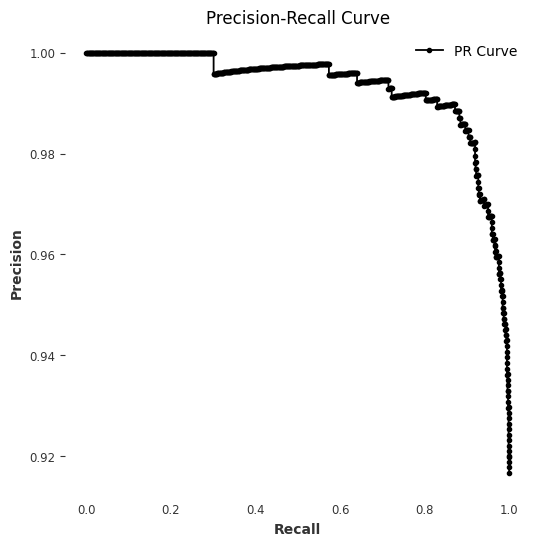

Fold 16 metrics: {'accuracy': tensor(0.8568), 'precision': 0.9895988112927192, 'recall': 0.852752880921895, 'f1': 0.9160935350756534, 'roc_auc': 0.8770806658130603, 'specificity': 0.9014084507042254}


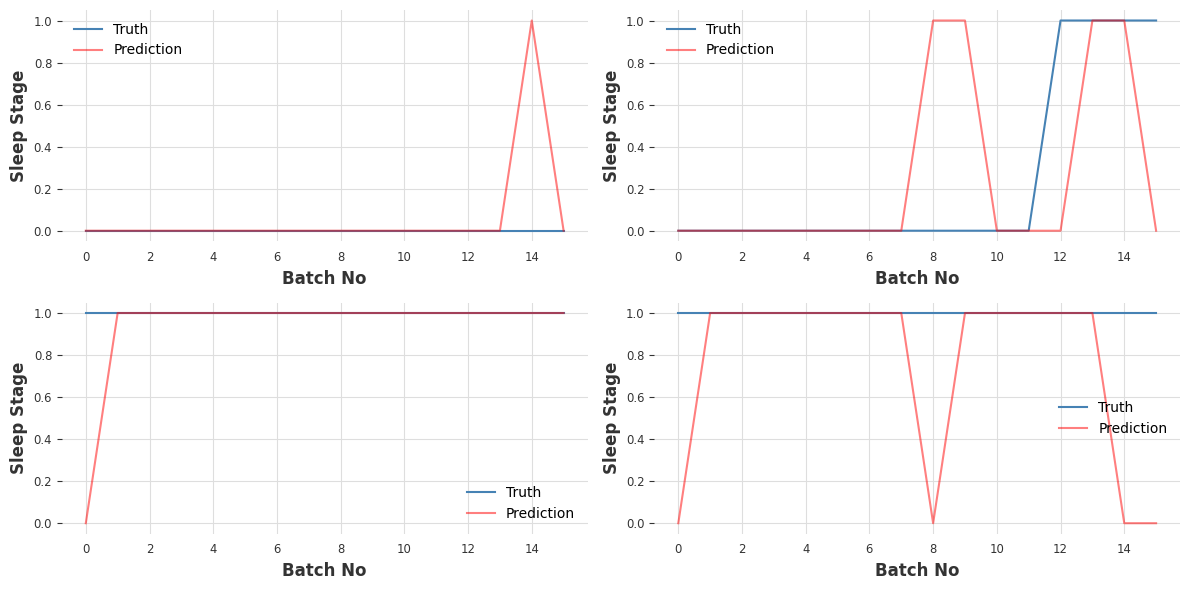

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Training Loss: 0.28576658
Test Accuracy: 0.6582, Test Loss: 0.6968
tn 122
fp 47
fn 210
tp 373
cm [[122  47]
 [210 373]]
Precision: 0.8881
Recall (Sensitivity): 0.6398
Specificity: 0.7219
F1-Score: 0.7438
AUC-ROC: 0.6808
Fold 17 metrics: {'accuracy': tensor(0.6582), 'precision': 0.888095238095238, 'recall': 0.6397941680960549, 'f1': 0.7437686939182453, 'roc_auc': 0.6808438296101577, 'specificity': 0.7218934911242604}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
Training Loss: 0.35571964
Test Accuracy: 0.7820, Test Loss: 0.4803
tn 120
fp 46
fn 153
tp 594
cm [[120  46]
 [153 594]]
Precision: 0.9281
Recall (Sensitivity): 0.7952
Specificity: 0.7229
F1-Score: 0.8565
AUC-ROC: 0.7590
Fold 18 metrics: {'accuracy': tensor(0.7820), 'precision': 0.928125, 'recall': 0.7951807228915663, 'f1': 0.8565248738284066, 'roc_auc': 0.7590361445783133, 'specificity': 0.7228915662650602}
Leave-One-Subject-O

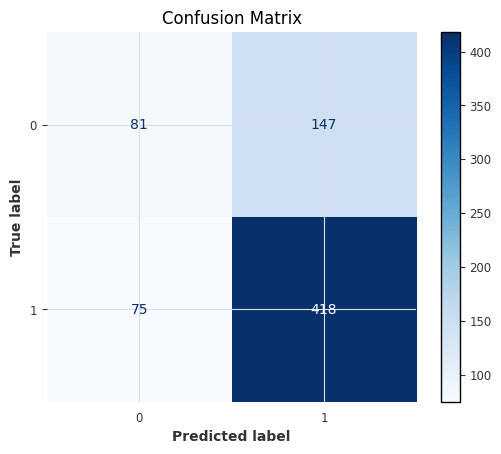

Precision: 0.7398
Recall (Sensitivity): 0.8479
Specificity: 0.3553
F1-Score: 0.7902
AUC-ROC: 0.6016


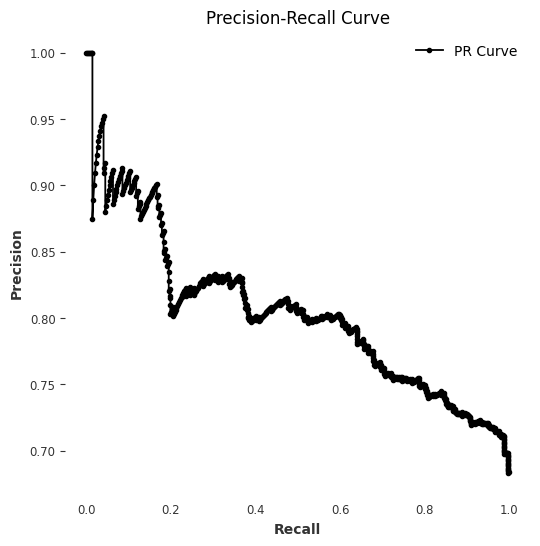

Fold 25 metrics: {'accuracy': tensor(0.6921), 'precision': 0.7398230088495575, 'recall': 0.847870182555781, 'f1': 0.7901701323251418, 'roc_auc': 0.6015666702252589, 'specificity': 0.35526315789473684}


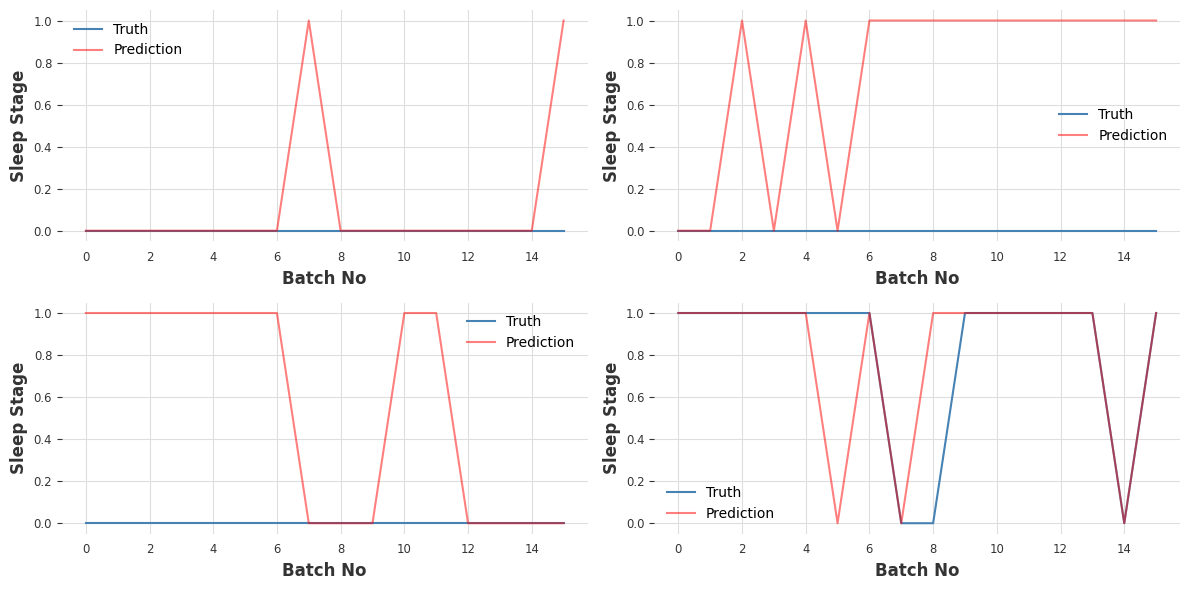

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.7282, Std: 0.0935
Precision - Mean: 0.8899, Std: 0.0955
Recall - Mean: 0.7435, Std: 0.1344
F1 - Mean: 0.7994, Std: 0.0877
Roc_auc - Mean: 0.7269, Std: 0.0809
Specificity - Mean: 0.7103, Std: 0.1848


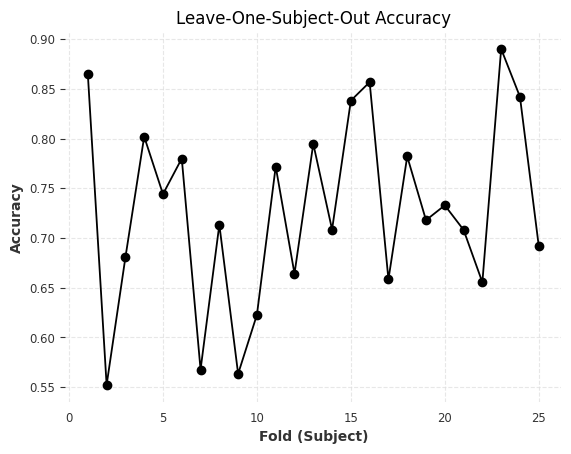

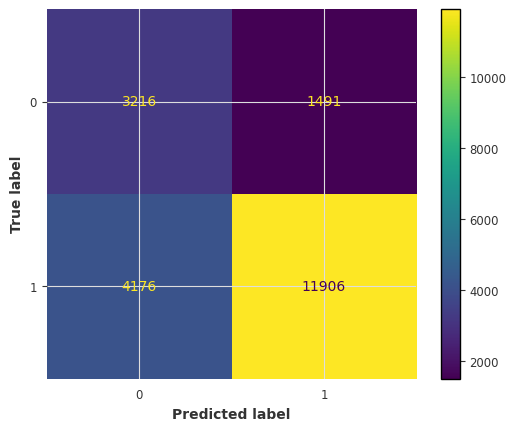

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

fold_results = []
fold = []
criterioncnnlstm = nn.BCEWithLogitsLoss()
results = []
# Cross-validation loop
for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out the current subject for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels for training
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    # Preprocess the data
    train_norm = normalize_channels(train_features)
    train_sg = apply_sg_filter(train_norm)
    test_norm = normalize_channels(test_features)
    test_sg = apply_sg_filter(test_norm)


    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_sg, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    # Create DataLoaders
    train_dataset = list(zip(processed_X_train_tensor, processed_y_train_tensor))
    test_dataset = list(zip(processed_X_test_tensor, processed_y_test_tensor))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for each fold
    modelcnnlstm = SleepCNNLSTM(n_features=2, n_classes=1, conv_channels=64, lstm_hidden=128, lstm_layers=3).to(device)
    optimizercnnlstm = optim.Adam(modelcnnlstm.parameters(), lr=learning_rate)


    # Train the model
    # for t in range(num_epochs):
    #     print(f"Epoch {t+1}\n-------------------------------")
    train_loop(num_epochs=num_epochs, train_loader=train_loader, model=modelcnnlstm, criterion=criterioncnnlstm, optimizer=optimizercnnlstm, device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, model=modelcnnlstm, criterion=criterioncnnlstm, device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [i[0] for i in test_results]
    y_prob = [i[1] for i in test_results]


    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    # Compute metrics for this fold
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }

    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
    # load_metrics(test_results)
        plotter(test_results)

print("Cross-validation complete!")

final_metrics = {metric: {"mean": np.mean([fold[metric] for fold in fold_results]),
                         "std": np.std([fold[metric] for fold in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fold["accuracy"] for fold in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Confusion Matrix (combine all folds)
y_true_all = np.concatenate([fold["y_true"] for fold in fold])
y_pred_all = np.concatenate([fold["y_pred"] for fold in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


Leave-One-Subject-Out CV - Subject: 1
-----------------------------------
Training Loss: 0.30924266
Test Accuracy: 0.8767, Test Loss: 0.2634
tn 44
fp 75
fn 17
tp 610
cm [[ 44  75]
 [ 17 610]]


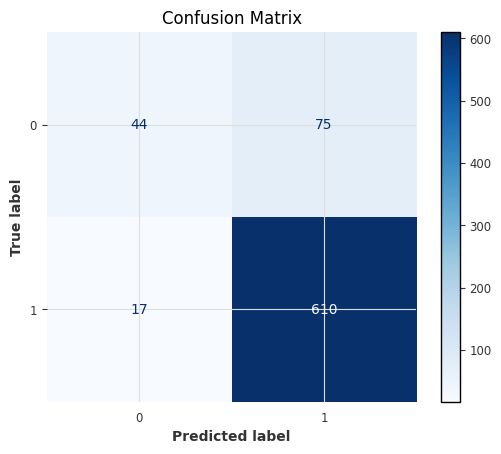

Precision: 0.8905
Recall (Sensitivity): 0.9729
Specificity: 0.3697
F1-Score: 0.9299
AUC-ROC: 0.6713


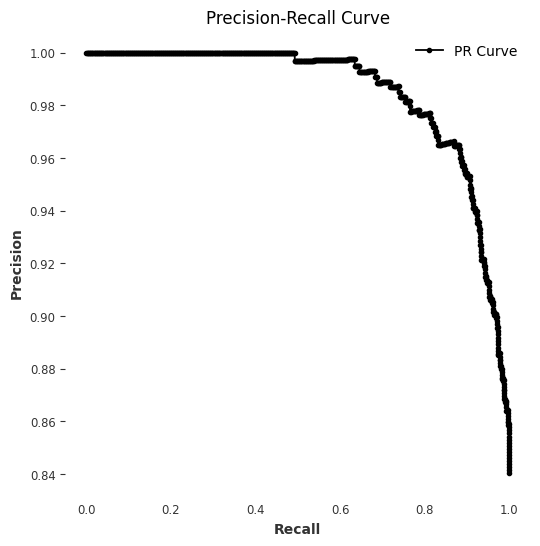

Fold 1 metrics: {'accuracy': tensor(0.8767), 'precision': 0.8905109489051095, 'recall': 0.9728867623604466, 'f1': 0.9298780487804879, 'roc_auc': 0.6713173307600553, 'specificity': 0.3697478991596639}


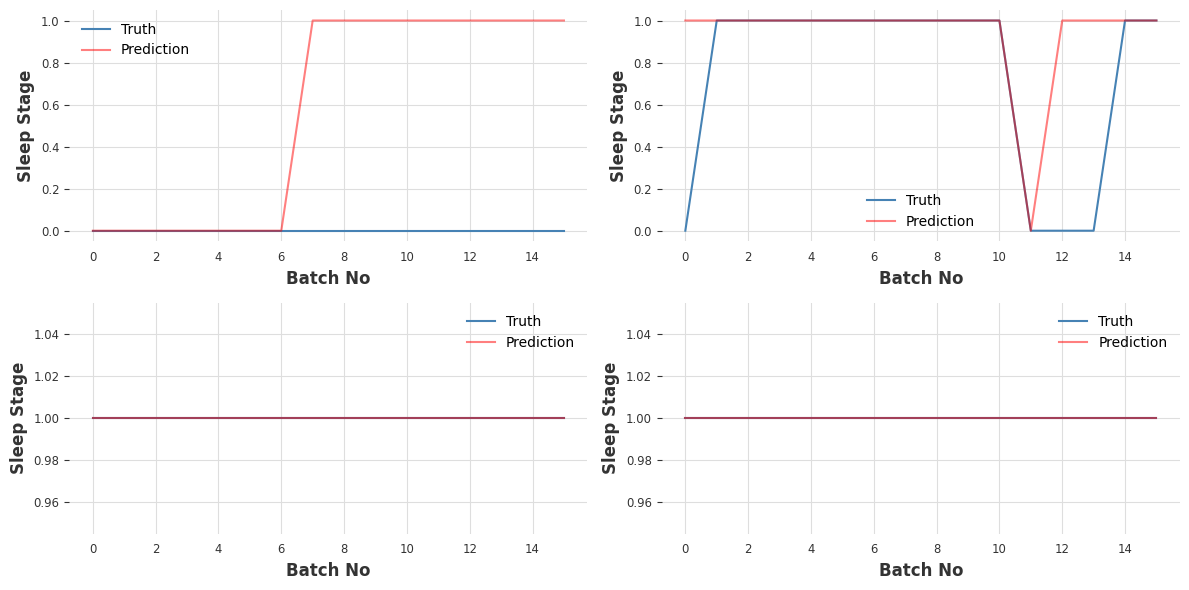

Leave-One-Subject-Out CV - Subject: 2
-----------------------------------
Training Loss: 0.30642889
Test Accuracy: 0.9466, Test Loss: 0.1520
tn 141
fp 25
fn 22
tp 692
cm [[141  25]
 [ 22 692]]


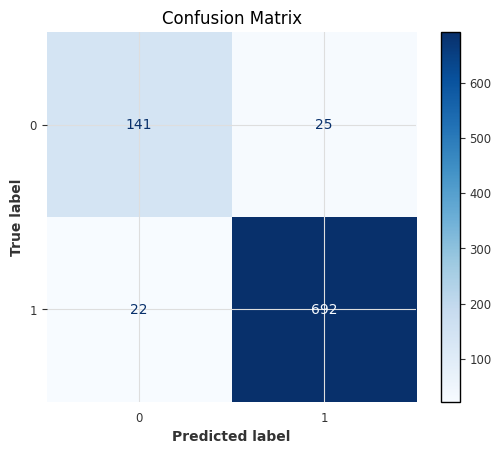

Precision: 0.9651
Recall (Sensitivity): 0.9692
Specificity: 0.8494
F1-Score: 0.9672
AUC-ROC: 0.9093


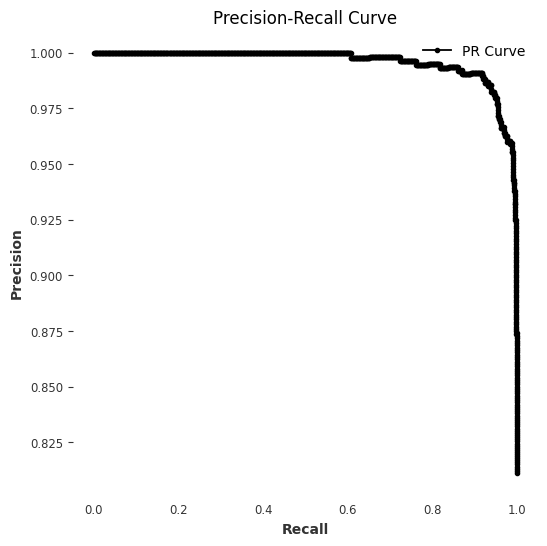

Fold 2 metrics: {'accuracy': tensor(0.9466), 'precision': 0.9651324965132496, 'recall': 0.969187675070028, 'f1': 0.9671558350803634, 'roc_auc': 0.9092926327157369, 'specificity': 0.8493975903614458}


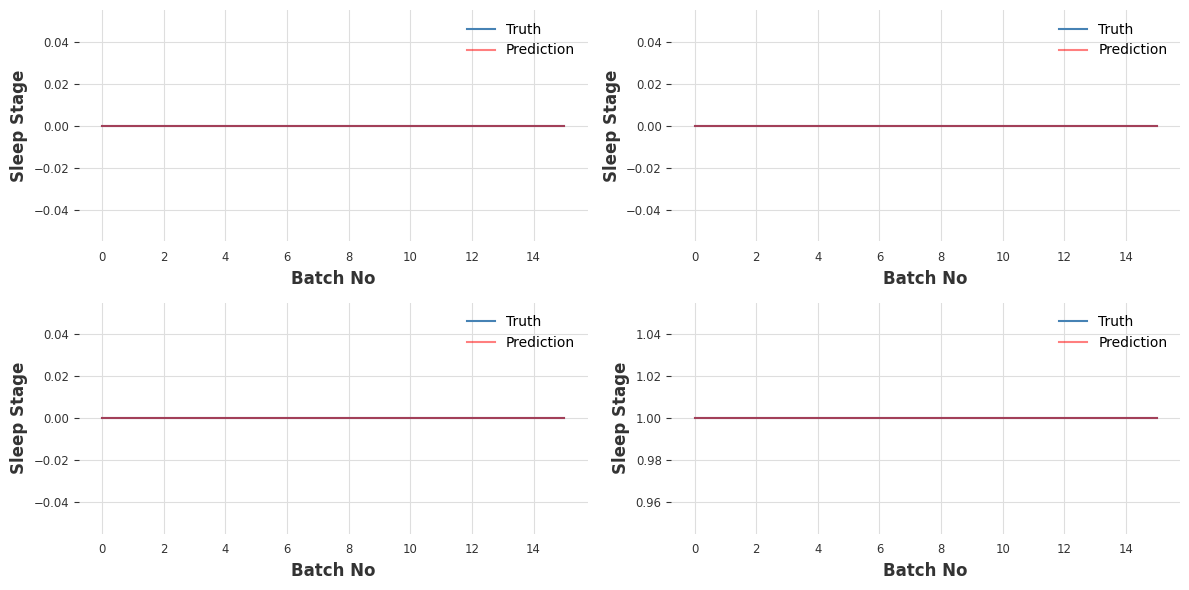

Leave-One-Subject-Out CV - Subject: 3
-----------------------------------
Training Loss: 0.30942409
Test Accuracy: 0.7002, Test Loss: 0.7944
tn 70
fp 237
fn 10
tp 507
cm [[ 70 237]
 [ 10 507]]
Precision: 0.6815
Recall (Sensitivity): 0.9807
Specificity: 0.2280
F1-Score: 0.8041
AUC-ROC: 0.6043
Fold 3 metrics: {'accuracy': tensor(0.7002), 'precision': 0.6814516129032258, 'recall': 0.9806576402321083, 'f1': 0.8041237113402062, 'roc_auc': 0.6043353347740347, 'specificity': 0.2280130293159609}
Leave-One-Subject-Out CV - Subject: 4
-----------------------------------
Training Loss: 0.31491223
Test Accuracy: 0.9355, Test Loss: 0.1818
tn 67
fp 23
fn 29
tp 687
cm [[ 67  23]
 [ 29 687]]
Precision: 0.9676
Recall (Sensitivity): 0.9595
Specificity: 0.7444
F1-Score: 0.9635
AUC-ROC: 0.8520
Fold 4 metrics: {'accuracy': tensor(0.9355), 'precision': 0.967605633802817, 'recall': 0.9594972067039106, 'f1': 0.9635343618513323, 'roc_auc': 0.8519708255741776, 'specificity': 0.7444444444444445}
Leave-One-Subjec

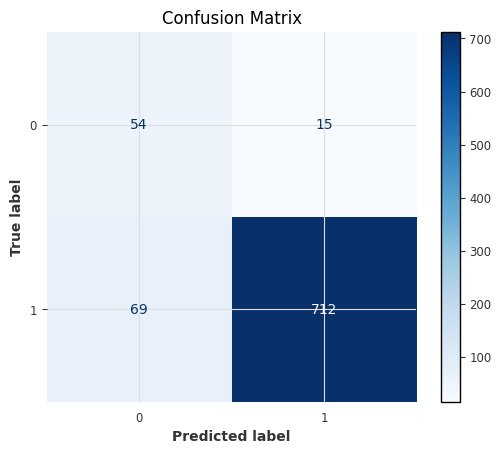

Precision: 0.9794
Recall (Sensitivity): 0.9117
Specificity: 0.7826
F1-Score: 0.9443
AUC-ROC: 0.8471


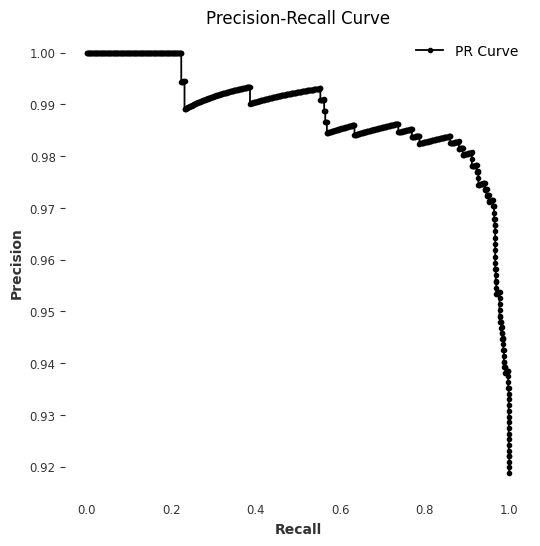

Fold 16 metrics: {'accuracy': tensor(0.9012), 'precision': 0.9793672627235214, 'recall': 0.911651728553137, 'f1': 0.9442970822281167, 'roc_auc': 0.8471302121026555, 'specificity': 0.782608695652174}


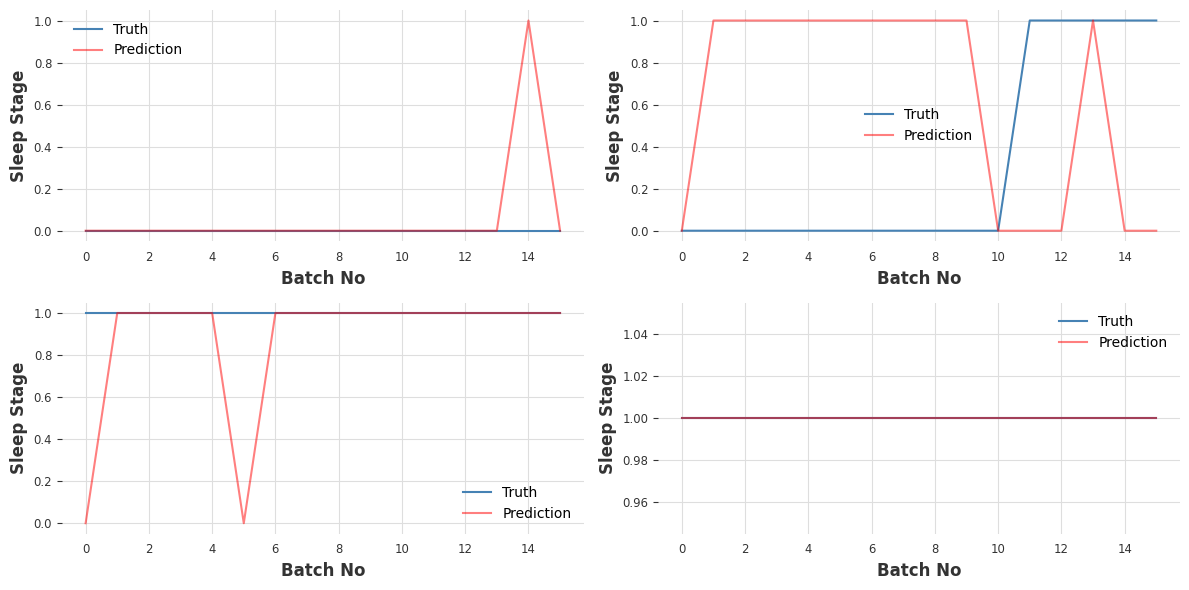

Leave-One-Subject-Out CV - Subject: 17
-----------------------------------
Training Loss: 0.31340256
Test Accuracy: 0.7427, Test Loss: 0.4806
tn 109
fp 58
fn 135
tp 448
cm [[109  58]
 [135 448]]
Precision: 0.8854
Recall (Sensitivity): 0.7684
Specificity: 0.6527
F1-Score: 0.8228
AUC-ROC: 0.7106
Fold 17 metrics: {'accuracy': tensor(0.7427), 'precision': 0.8853754940711462, 'recall': 0.7684391080617495, 'f1': 0.82277318640955, 'roc_auc': 0.7105668594200963, 'specificity': 0.6526946107784432}
Leave-One-Subject-Out CV - Subject: 18
-----------------------------------
Training Loss: 0.30510182
Test Accuracy: 0.8244, Test Loss: 0.3554
tn 117
fp 47
fn 113
tp 634
cm [[117  47]
 [113 634]]
Precision: 0.9310
Recall (Sensitivity): 0.8487
Specificity: 0.7134
F1-Score: 0.8880
AUC-ROC: 0.7811
Fold 18 metrics: {'accuracy': tensor(0.8244), 'precision': 0.9309838472834068, 'recall': 0.8487282463186078, 'f1': 0.8879551820728291, 'roc_auc': 0.7810714402324745, 'specificity': 0.7134146341463414}
Leave-One-

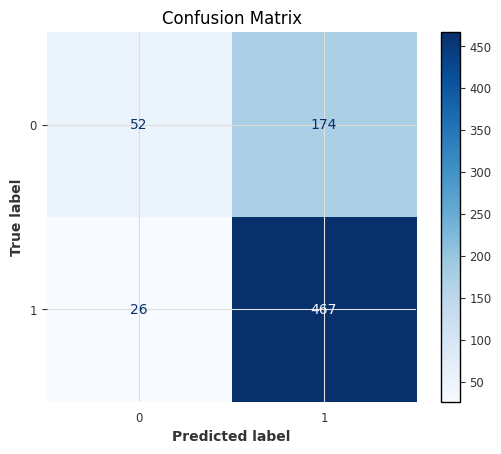

Precision: 0.7285
Recall (Sensitivity): 0.9473
Specificity: 0.2301
F1-Score: 0.8236
AUC-ROC: 0.5887


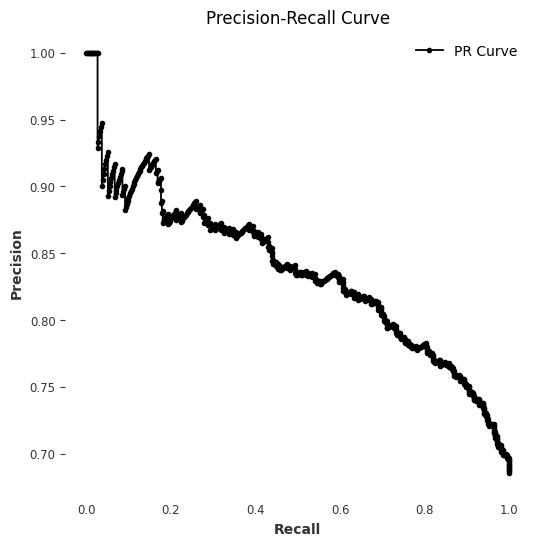

Fold 25 metrics: {'accuracy': tensor(0.7218), 'precision': 0.7285491419656787, 'recall': 0.947261663286004, 'f1': 0.8236331569664903, 'roc_auc': 0.5886750794306127, 'specificity': 0.23008849557522124}


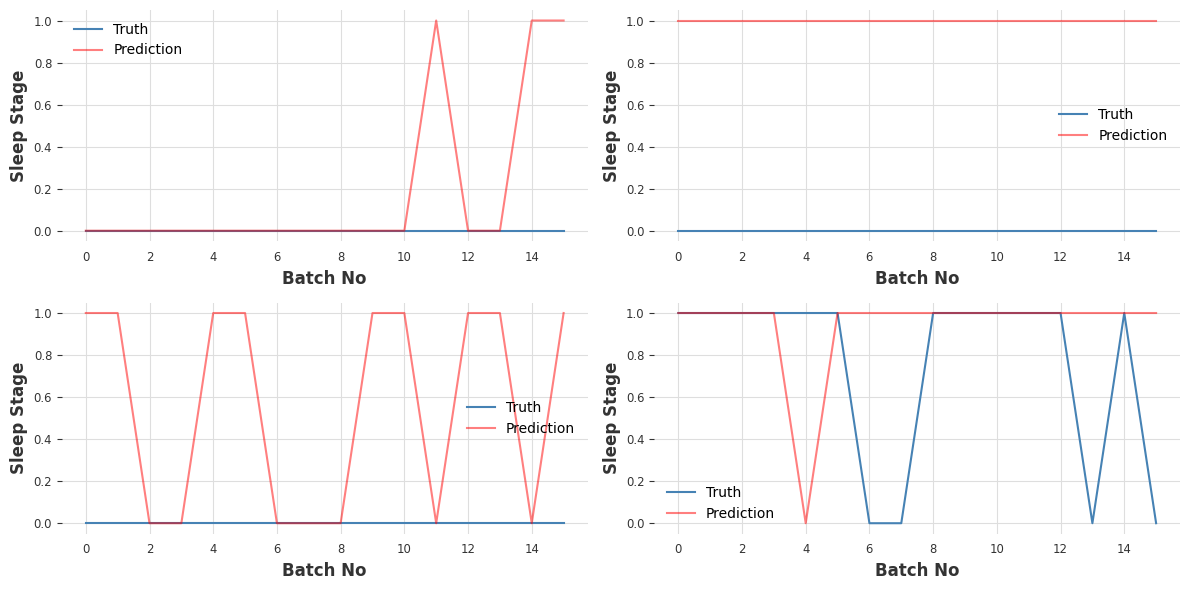

Cross-validation complete!

Final Metrics:
Accuracy - Mean: 0.8286, Std: 0.0795
Precision - Mean: 0.8717, Std: 0.0972
Recall - Mean: 0.9182, Std: 0.0693
F1 - Mean: 0.8888, Std: 0.0566
Roc_auc - Mean: 0.7416, Std: 0.0974
Specificity - Mean: 0.5650, Std: 0.2139


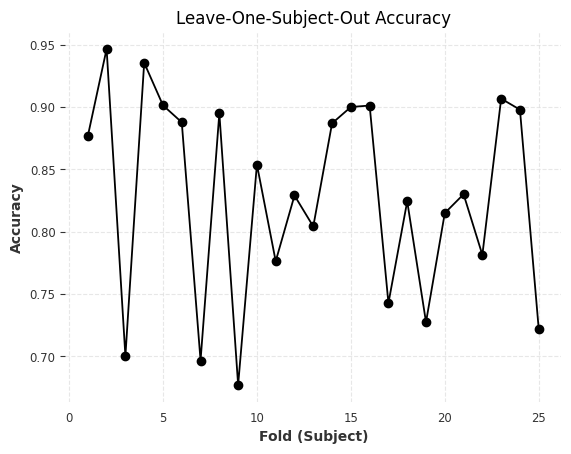

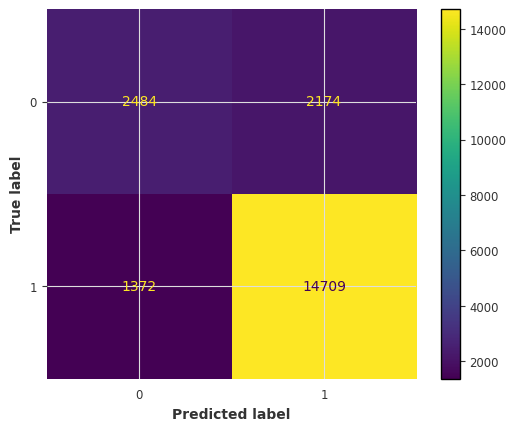

In [70]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import savgol_filter
# (Assume that load_metrics, plotter, train_loop, and test_loop are already imported)

#############################
# Preprocessing Functions
#############################

def normalize_channels(data):
    # Compute the mean and std along axis=(0,2) (channels and samples per epoch)
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

#############################
# Dataset: Creating Sequences of Epochs
#############################

class SleepSequenceDataset(Dataset):
    """
    This dataset creates overlapping sequences of epochs.
    Each sample is a sequence of consecutive epochs (e.g., previous, current, next),
    with the middle epoch’s label used as the target.
    
    Parameters:
        epochs: a tensor of shape (num_epochs, n_channels, epoch_samples)
        labels: a tensor of shape (num_epochs, 1)  (or (num_epochs,) works as well)
        seq_length: number of epochs per sequence (should be odd so that a central epoch exists)
    """
    def __init__(self, epochs, labels, seq_length=3):
        self.epochs = epochs
        self.labels = labels
        self.seq_length = seq_length
        self.half_seq = seq_length // 2
        # We can only form sequences when we have enough epochs on each side.
        self.num_sequences = len(epochs) - 2 * self.half_seq

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get a sequence of epochs starting at idx, ending at idx+seq_length
        sequence = self.epochs[idx : idx + self.seq_length]  # shape: (seq_length, n_channels, epoch_samples)
        # Use the middle epoch’s label as the target
        target = self.labels[idx + self.half_seq]
        return sequence, target

#############################
# Model Definition
#############################

class TimeDistributedCNN(nn.Module):
    """
    Applies a CNN to each epoch in the sequence.
    """
    def __init__(self, n_channels, cnn_out_features):
        super(TimeDistributedCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # output shape will be (batch, 64, 1)
        )
        # A fully connected layer to get a feature vector of size cnn_out_features
        self.fc = nn.Linear(64, cnn_out_features)

    def forward(self, x):
        # x shape: (batch_size, seq_length, n_channels, epoch_samples)
        batch_size, seq_length, C, T = x.size()
        # Combine batch and sequence dimensions
        x = x.view(batch_size * seq_length, C, T)
        features = self.cnn(x)        # shape: (batch_size*seq_length, 64, 1)
        features = features.squeeze(-1)  # shape: (batch_size*seq_length, 64)
        features = self.fc(features)     # shape: (batch_size*seq_length, cnn_out_features)
        # Restore the sequence dimension: (batch_size, seq_length, cnn_out_features)
        features = features.view(batch_size, seq_length, -1)
        return features

class SleepCNNLSTM_CrossEpoch(nn.Module):
    """
    Model that processes a sequence of epochs. Each epoch is first processed via a CNN 
    (applied time-distributed) to obtain a feature vector, and then an LSTM captures the temporal dependencies.
    The classifier then makes a prediction based on the LSTM output corresponding to the middle epoch.
    """
    def __init__(self, n_channels, epoch_samples, cnn_out_features, lstm_hidden, lstm_layers):
        super(SleepCNNLSTM_CrossEpoch, self).__init__()
        self.td_cnn = TimeDistributedCNN(n_channels=n_channels, cnn_out_features=cnn_out_features)
        self.lstm = nn.LSTM(input_size=cnn_out_features, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True)
        self.classifier = nn.Linear(lstm_hidden, 1)  # For binary classification

    def forward(self, x):
        # x shape: (batch_size, seq_length, n_channels, epoch_samples)
        cnn_features = self.td_cnn(x)            # shape: (batch_size, seq_length, cnn_out_features)
        lstm_out, _ = self.lstm(cnn_features)      # shape: (batch_size, seq_length, lstm_hidden)
        mid_idx = x.size(1) // 2                   # index of the middle epoch
        target_features = lstm_out[:, mid_idx, :]  # shape: (batch_size, lstm_hidden)
        out = self.classifier(target_features)     # shape: (batch_size, 1)
        return out

#############################
# Hyperparameters & Device Setup
#############################

seq_length = 3            # Use 3 epochs per sequence (previous, current, next)
n_channels = 2            # 2 signals
epoch_samples = 240       # 30 sec epoch sampled at 8 Hz (8*30=240 samples)
cnn_out_features = 64     # Feature vector dimension from CNN
lstm_hidden = 128
lstm_layers = 3
batch_size = 16
num_epochs = 10           # Adjust as needed
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#############################
# Cross-Validation Loop (Leave-One-Subject-Out)
#############################

fold_results = []
fold = []
criterion = nn.BCEWithLogitsLoss()
results = []

for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: use all subjects except the current one for training
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels from the training subjects
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]


    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_features, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
    processed_X_test_tensor = torch.tensor(test_features, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

    # Create sequence datasets (each sample is now a sequence of epochs)
    train_dataset = SleepSequenceDataset(processed_X_train_tensor, processed_y_train_tensor, seq_length=seq_length)
    test_dataset = SleepSequenceDataset(processed_X_test_tensor, processed_y_test_tensor, seq_length=seq_length)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for this fold
    model = SleepCNNLSTM_CrossEpoch(n_channels=n_channels, 
                                    epoch_samples=epoch_samples, 
                                    cnn_out_features=cnn_out_features, 
                                    lstm_hidden=lstm_hidden, 
                                    lstm_layers=lstm_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_loop(num_epochs=num_epochs, 
               train_loader=train_loader, 
               model=model, 
               criterion=criterion, 
               optimizer=optimizer, 
               device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, 
                             model=model, 
                             criterion=criterion, 
                             device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [result[0] for result in test_results]
    y_prob = [result[1] for result in test_results]

    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }
    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
        plotter(test_results)

print("Cross-validation complete!")

#############################
# Final Metrics & Plots
#############################

final_metrics = {metric: {"mean": np.mean([fmetrics[metric] for fmetrics in fold_results]),
                          "std": np.std([fmetrics[metric] for fmetrics in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fmetrics["accuracy"] for fmetrics in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Combined Confusion Matrix from all folds
y_true_all = np.concatenate([f["y_true"] for f in fold])
y_pred_all = np.concatenate([f["y_pred"] for f in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()

## Cross Epochs CNN biLSTM on Raw data with TSFEL feature extraction

In [72]:
%pip install tsfel==0.1.4

  Using cached sphinx-8.1.3-py3-none-any.whl.metadata (6.4 kB)
  Using cached google_auth-2.38.0-py2.py3-none-any.whl.metadata (4.8 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached sphinxcontrib_applehelp-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached sphinxcontrib_devhelp-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached sphinxcontrib_htmlhelp-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached sphinxcontrib_jsmath-1.0.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached sphinxcontrib_qthelp-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached sphinxcontrib_serializinghtml-2.0.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached docutils-0.21.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached snowballstemmer-2.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached alabaster-1.0.0-py3-none-any.whl.m


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install scipy==1.12



   ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
    --------------------------------------- 1.0/45.8 MB 10.1 MB/s eta 0:00:05
   - -------------------------------------- 1.3/45.8 MB 3.2 MB/s eta 0:00:14
   -- ------------------------------------- 3.4/45.8 MB 5.8 MB/s eta 0:00:08
   ---- ----------------------------------- 5.5/45.8 MB 6.8 MB/s eta 0:00:06
   ------ --------------------------------- 7.6/45.8 MB 7.5 MB/s eta 0:00:06
   -------- ------------------------------- 9.7/45.8 MB 7.8 MB/s eta 0:00:05
   ---------- ----------------------------- 11.5/45.8 MB 8.1 MB/s eta 0:00:05
   ---------- ----------------------------- 12.6/45.8 MB 7.6 MB/s eta 0:00:05
   ----------- ---------------------------- 13.6/45.8 MB 7.7 MB/s eta 0:00:05
   ----------- ---------------------------- 13.6/45.8 MB 7.7 MB/s eta 0:00:05
   ----------- ---------------------------- 13.6/45.8 MB 7.7 MB/s eta 0:00:05
   ----------- ---------------------------- 13.6/45.8 MB 7.7 MB/s eta 0:00:0

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
%pip uninstall scipy

^C
Note: you may need to restart the kernel to use updated packages.


In [57]:
import scipy
print(scipy.__version__)

1.12.0


In [ ]:
import numpy as np
import scipy.signal

# Check if 'ricker' is missing, and if so, define it.
if not hasattr(scipy.signal, 'ricker'):
    print("Defining the Ricker wavelet function...")
    def ricker(points, a):
        """
        Computes a Ricker (Mexican hat) wavelet.
        
        Parameters:
            points (int): Number of points in the returned vector.
            a (float): Width parameter of the wavelet.
        
        Returns:
            ndarray: The Ricker wavelet.
        """
        A = 2 / (np.sqrt(3 * a) * (np.pi**0.25))
        wsq = a ** 2
        xs = np.arange(0, points) - (points - 1.0) / 2
        xsq = xs ** 2
        mod = 1 - xsq / wsq
        gauss = np.exp(-xsq / (2 * wsq))
        print("hi")
        return A * mod * gauss

    scipy.signal.ricker = ricker


In [ ]:
%pip install PyWavelets

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.2 MB 2.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.8/4.2 MB 1.3 MB/s eta 0:00:03
   ------------------- -------------------- 2.1/4.2 MB 3.0 MB/s eta 0:00:01
   ----------------------------- ---------- 3.1/4.2 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 3.9/4.2 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pywt
import scipy.signal

if not hasattr(scipy.signal, 'cwt'):
    def cwt(signal, wavelet, widths, dtype=None, **kwargs):
        # Use PyWavelets' cwt: note that it returns (coeffs, frequencies)
        coeffs, _ = pywt.cwt(signal, widths, wavelet, **kwargs)
        return coeffs
    scipy.signal.cwt = cwt


In [63]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import savgol_filter
from scipy import stats, optimize, interpolate

import tsfel  # TSFEL for handcrafted feature extraction

# (Assume that load_metrics, plotter, train_loop, and test_loop are already implemented)

##################################
# Preprocessing Functions
##################################

def normalize_channels(data):
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

##################################
# TSFEL Feature Extraction
##################################

# Get a default TSFEL configuration (you can customize this)
cfg = tsfel.get_features_by_domain()

def compute_tsfel_features(data, fs=8):
    """
    Computes TSFEL features for each epoch.
    data: numpy array of shape (num_epochs, n_channels, epoch_samples)
    Returns: numpy array of shape (num_epochs, tsfel_feat_dim)
    """
    all_feats = []
    for epoch in data:
        feat = []
        # Extract features for each channel and then concatenate them.
        for channel in epoch:
            # tsfel returns a pandas DataFrame by default; we take its values.
            feats = tsfel.time_series_features_extractor(cfg, channel, fs=fs, verbose=0)
            feat.append(feats.values.flatten())
        feat = np.concatenate(feat)
        all_feats.append(feat)
    return np.array(all_feats)

##################################
# Dataset: Creating Sequences with TSFEL Features
##################################

class SleepSequenceDatasetWithTSFEL(Dataset):
    """
    This dataset returns:
      - A sequence of consecutive epochs (for cross-epoch context),
      - The precomputed TSFEL features for the middle epoch,
      - The label for the middle epoch.
    """
    def __init__(self, epochs, labels, tsfel_features, seq_length=3):
        """
        epochs: tensor of shape (num_epochs, n_channels, epoch_samples)
        labels: tensor of shape (num_epochs, 1) or (num_epochs,)
        tsfel_features: numpy array of shape (num_epochs, tsfel_feat_dim)
        seq_length: must be odd (e.g., 3, 5) so that a central epoch exists.
        """
        self.epochs = epochs
        self.labels = labels
        self.tsfel_features = tsfel_features
        self.seq_length = seq_length
        self.half_seq = seq_length // 2
        self.num_sequences = len(epochs) - 2 * self.half_seq

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get a sequence of epochs
        sequence = self.epochs[idx : idx + self.seq_length]  # shape: (seq_length, n_channels, epoch_samples)
        # The target is the label of the middle epoch
        target = self.labels[idx + self.half_seq]
        # Get the precomputed TSFEL features for the middle epoch
        tsfel_feat = self.tsfel_features[idx + self.half_seq]
        # Convert tsfel features to tensor
        tsfel_feat = torch.tensor(tsfel_feat, dtype=torch.float32)
        return sequence, tsfel_feat, target

##################################
# Model Definition
##################################

class TimeDistributedCNN(nn.Module):
    """
    Applies a CNN to each epoch in the sequence.
    """
    def __init__(self, n_channels, cnn_out_features):
        super(TimeDistributedCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # Output shape: (batch, 64, 1)
        )
        self.fc = nn.Linear(64, cnn_out_features)

    def forward(self, x):
        # x: (batch_size, seq_length, n_channels, epoch_samples)
        batch_size, seq_length, C, T = x.size()
        x = x.view(batch_size * seq_length, C, T)
        features = self.cnn(x)        # (batch_size*seq_length, 64, 1)
        features = features.squeeze(-1)  # (batch_size*seq_length, 64)
        features = self.fc(features)      # (batch_size*seq_length, cnn_out_features)
        features = features.view(batch_size, seq_length, -1)
        return features

class SleepCNNLSTM_TSFEL(nn.Module):
    """
    Processes a sequence of epochs with a time-distributed CNN and LSTM, then concatenates
    the deep features from the middle epoch with TSFEL features before the final prediction.
    """
    def __init__(self, n_channels, epoch_samples, cnn_out_features, lstm_hidden, lstm_layers, tsfel_feat_dim):
        super(SleepCNNLSTM_TSFEL, self).__init__()
        self.td_cnn = TimeDistributedCNN(n_channels=n_channels, cnn_out_features=cnn_out_features)
        self.lstm = nn.LSTM(input_size=cnn_out_features, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True)
        # The classifier now takes both the LSTM features and TSFEL features.
        self.classifier = nn.Linear(lstm_hidden + tsfel_feat_dim, 1)

    def forward(self, x, tsfel_features):
        # x: (batch_size, seq_length, n_channels, epoch_samples)
        cnn_features = self.td_cnn(x)  # (batch_size, seq_length, cnn_out_features)
        lstm_out, _ = self.lstm(cnn_features)  # (batch_size, seq_length, lstm_hidden)
        mid_idx = x.size(1) // 2  # index of the middle epoch
        target_features = lstm_out[:, mid_idx, :]  # (batch_size, lstm_hidden)
        # Concatenate with TSFEL features (assumed to be (batch_size, tsfel_feat_dim))
        combined = torch.cat([target_features, tsfel_features], dim=1)  # (batch_size, lstm_hidden+tsfel_feat_dim)
        out = self.classifier(combined)  # (batch_size, 1)
        return out

##################################
# Hyperparameters & Device Setup
##################################

seq_length = 3            # e.g., previous, current, next epochs
n_channels = 2            # 2 signals
epoch_samples = 240       # 30 sec epoch at 8 Hz sampling rate (8*30=240)
cnn_out_features = 64
lstm_hidden = 128
lstm_layers = 3
batch_size = 16
num_epochs = 10           # Adjust as needed
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##################################
# Cross-Validation Loop (Leave-One-Subject-Out)
##################################

fold_results = []
fold = []
criterion = nn.BCEWithLogitsLoss()
results = []

for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: leave out subject i for testing
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate training subjects' features and labels
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]


    # Precompute TSFEL features for each epoch (for both train and test)
    tsfel_train = compute_tsfel_features(train_features, fs=8)
    tsfel_test = compute_tsfel_features(test_features, fs=8)

    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_sg, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
    processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

    # Create datasets with sequences and TSFEL features
    train_dataset = SleepSequenceDatasetWithTSFEL(processed_X_train_tensor, processed_y_train_tensor,
                                                  tsfel_train, seq_length=seq_length)
    test_dataset = SleepSequenceDatasetWithTSFEL(processed_X_test_tensor, processed_y_test_tensor,
                                                 tsfel_test, seq_length=seq_length)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Determine the dimensionality of the TSFEL feature vector
    tsfel_feat_dim = tsfel_train.shape[1]

    # Reinitialize the model for this fold
    model = SleepCNNLSTM_TSFEL(n_channels=n_channels, epoch_samples=epoch_samples,
                               cnn_out_features=cnn_out_features, lstm_hidden=lstm_hidden,
                               lstm_layers=lstm_layers, tsfel_feat_dim=tsfel_feat_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop (assume train_loop is adapted to handle two inputs)
    # If your train_loop doesn’t already support multiple inputs, you can write:
    for epoch in range(num_epochs):
        model.train()
        for seq, tsfel_feat, target in train_loader:
            seq = seq.to(device)
            tsfel_feat = tsfel_feat.to(device)
            target = target.to(device)
            optimizer.zero_grad()
            output = model(seq, tsfel_feat)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        # Optionally print training progress for each epoch

    # Evaluation loop (assume test_loop is adapted similarly)
    test_results = []
    model.eval()
    with torch.no_grad():
        for seq, tsfel_feat, target in test_loader:
            seq = seq.to(device)
            tsfel_feat = tsfel_feat.to(device)
            target = target.to(device)
            output = model(seq, tsfel_feat)
            # Store (target, output) for metrics computation
            for t, o in zip(target.cpu().numpy(), output.cpu().numpy()):
                test_results.append((t, o))
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [r[0] for r in test_results]
    y_prob = [r[1] for r in test_results]

    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }
    fold_results.append(fold_metrics)
    fold_pred = {
        "y_true": y_true,
        "y_pred": (np.array(y_prob) > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
        plotter(test_results)

print("Cross-validation complete!")

##################################
# Final Metrics & Plots
##################################

final_metrics = {metric: {"mean": np.mean([fr[metric] for fr in fold_results]),
                          "std": np.std([fr[metric] for fr in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fr["accuracy"] for fr in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Combined Confusion Matrix from all folds
y_true_all = np.concatenate([f["y_true"] for f in fold])
y_pred_all = np.concatenate([f["y_pred"] for f in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


Leave-One-Subject-Out CV - Subject: 1
-----------------------------------


AttributeError: module 'scipy.stats' has no attribute 'median_absolute_deviation'

In [60]:
%pip install scipy==1.8.1

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.10.0rc1 Requires-Python <3.12,>=3.8; 1.10.0rc2 Requires-Python <3.12,>=3.8; 1.10.1 Requires-Python <3.12,>=3.8; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11; 1.9.0 Requires-Python >=3.8,<3.12; 1.9.0rc1 Requires-Python >=3.8,<3.12; 1.9.0rc2 Requires-Python >=3.8,<3.12; 1.9.0rc3 Requires-Python >=3.8,<3.12; 1.9.1 Requires-Python >=3.8,<3.12
ERROR: Could not find a version that satisfies the requirement scipy==1.8.1 (from versions: 

In [61]:
import scipy
print(scipy.__version__)


1.12.0


## Cross Epochs, CNN biLSTM model on processed data

In [62]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.signal import savgol_filter
# (Assume that load_metrics, plotter, train_loop, and test_loop are already imported)

#############################
# Preprocessing Functions
#############################

def normalize_channels(data):
    # Compute the mean and std along axis=(0,2) (channels and samples per epoch)
    means = np.mean(data, axis=(0, 2))
    stds = np.std(data, axis=(0, 2))
    norm_data = (data - means[:, None]) / stds[:, None]
    return norm_data

def apply_sg_filter(data, window=25, order=5):
    filtered = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            filtered[i, j] = savgol_filter(data[i, j], window, order)
    return filtered

def restore_shape(data, original_shape):
    return data.reshape(-1, original_shape[1], original_shape[2])

#############################
# Dataset: Creating Sequences of Epochs
#############################

class SleepSequenceDataset(Dataset):
    """
    This dataset creates overlapping sequences of epochs.
    Each sample is a sequence of consecutive epochs (e.g., previous, current, next),
    with the middle epoch’s label used as the target.
    
    Parameters:
        epochs: a tensor of shape (num_epochs, n_channels, epoch_samples)
        labels: a tensor of shape (num_epochs, 1)  (or (num_epochs,) works as well)
        seq_length: number of epochs per sequence (should be odd so that a central epoch exists)
    """
    def __init__(self, epochs, labels, seq_length=3):
        self.epochs = epochs
        self.labels = labels
        self.seq_length = seq_length
        self.half_seq = seq_length // 2
        # We can only form sequences when we have enough epochs on each side.
        self.num_sequences = len(epochs) - 2 * self.half_seq

    def __len__(self):
        return self.num_sequences

    def __getitem__(self, idx):
        # Get a sequence of epochs starting at idx, ending at idx+seq_length
        sequence = self.epochs[idx : idx + self.seq_length]  # shape: (seq_length, n_channels, epoch_samples)
        # Use the middle epoch’s label as the target
        target = self.labels[idx + self.half_seq]
        return sequence, target

#############################
# Model Definition
#############################

class TimeDistributedCNN(nn.Module):
    """
    Applies a CNN to each epoch in the sequence.
    """
    def __init__(self, n_channels, cnn_out_features):
        super(TimeDistributedCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=n_channels, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # output shape will be (batch, 64, 1)
        )
        # A fully connected layer to get a feature vector of size cnn_out_features
        self.fc = nn.Linear(64, cnn_out_features)

    def forward(self, x):
        # x shape: (batch_size, seq_length, n_channels, epoch_samples)
        batch_size, seq_length, C, T = x.size()
        # Combine batch and sequence dimensions
        x = x.view(batch_size * seq_length, C, T)
        features = self.cnn(x)        # shape: (batch_size*seq_length, 64, 1)
        features = features.squeeze(-1)  # shape: (batch_size*seq_length, 64)
        features = self.fc(features)     # shape: (batch_size*seq_length, cnn_out_features)
        # Restore the sequence dimension: (batch_size, seq_length, cnn_out_features)
        features = features.view(batch_size, seq_length, -1)
        return features

class SleepCNNLSTM_CrossEpoch(nn.Module):
    """
    Model that processes a sequence of epochs. Each epoch is first processed via a CNN 
    (applied time-distributed) to obtain a feature vector, and then an LSTM captures the temporal dependencies.
    The classifier then makes a prediction based on the LSTM output corresponding to the middle epoch.
    """
    def __init__(self, n_channels, epoch_samples, cnn_out_features, lstm_hidden, lstm_layers):
        super(SleepCNNLSTM_CrossEpoch, self).__init__()
        self.td_cnn = TimeDistributedCNN(n_channels=n_channels, cnn_out_features=cnn_out_features)
        self.lstm = nn.LSTM(input_size=cnn_out_features, hidden_size=lstm_hidden,
                            num_layers=lstm_layers, batch_first=True)
        self.classifier = nn.Linear(lstm_hidden, 1)  # For binary classification

    def forward(self, x):
        # x shape: (batch_size, seq_length, n_channels, epoch_samples)
        cnn_features = self.td_cnn(x)            # shape: (batch_size, seq_length, cnn_out_features)
        lstm_out, _ = self.lstm(cnn_features)      # shape: (batch_size, seq_length, lstm_hidden)
        mid_idx = x.size(1) // 2                   # index of the middle epoch
        target_features = lstm_out[:, mid_idx, :]  # shape: (batch_size, lstm_hidden)
        out = self.classifier(target_features)     # shape: (batch_size, 1)
        return out

#############################
# Hyperparameters & Device Setup
#############################

seq_length = 3            # Use 3 epochs per sequence (previous, current, next)
n_channels = 2            # 2 signals
epoch_samples = 240       # 30 sec epoch sampled at 8 Hz (8*30=240 samples)
cnn_out_features = 64     # Feature vector dimension from CNN
lstm_hidden = 128
lstm_layers = 3
batch_size = 16
num_epochs = 10           # Adjust as needed
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#############################
# Cross-Validation Loop (Leave-One-Subject-Out)
#############################

fold_results = []
fold = []
criterion = nn.BCEWithLogitsLoss()
results = []

for i, data in enumerate(binary_subject_wise_data):
    print(f"Leave-One-Subject-Out CV - Subject: {i+1}\n-----------------------------------")
    
    # Split data: use all subjects except the current one for training
    train_data = [x for j, x in enumerate(binary_subject_wise_data) if j != i]
    test_data = data

    # Concatenate features and labels from the training subjects
    train_features = np.vstack([x[0] for x in train_data])
    train_labels = np.vstack([x[1] for x in train_data])
    test_features = test_data[0]
    test_labels = test_data[1]

    # Preprocess the data
    train_norm = normalize_channels(train_features)
    train_sg = apply_sg_filter(train_norm)
    test_norm = normalize_channels(test_features)
    test_sg = apply_sg_filter(test_norm)

    # Convert to PyTorch tensors
    processed_X_train_tensor = torch.tensor(train_sg, dtype=torch.float32)
    processed_y_train_tensor = torch.tensor(train_labels, dtype=torch.float32)
    processed_X_test_tensor = torch.tensor(test_sg, dtype=torch.float32)
    processed_y_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

    # Create sequence datasets (each sample is now a sequence of epochs)
    train_dataset = SleepSequenceDataset(processed_X_train_tensor, processed_y_train_tensor, seq_length=seq_length)
    test_dataset = SleepSequenceDataset(processed_X_test_tensor, processed_y_test_tensor, seq_length=seq_length)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Reinitialize the model for this fold
    model = SleepCNNLSTM_CrossEpoch(n_channels=n_channels, 
                                    epoch_samples=epoch_samples, 
                                    cnn_out_features=cnn_out_features, 
                                    lstm_hidden=lstm_hidden, 
                                    lstm_layers=lstm_layers).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_loop(num_epochs=num_epochs, 
               train_loader=train_loader, 
               model=model, 
               criterion=criterion, 
               optimizer=optimizer, 
               device=device)

    # Evaluate on the test subject
    test_results = test_loop(test_loader=test_loader, 
                             model=model, 
                             criterion=criterion, 
                             device=device)
    results.append((i, test_results))

    # Process metrics and plot results for each fold
    y_true = [result[0] for result in test_results]
    y_prob = [result[1] for result in test_results]

    accuracy_score, precision, recall, specificity, f1, auc, y_true, y_prob = load_metrics(test_results, i)
    fold_metrics = {
        "accuracy": accuracy_score,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": auc,
        "specificity": specificity,
    }
    fold_results.append(fold_metrics)

    fold_pred = {
        "y_true": y_true,
        "y_pred": (y_prob > 0.5).astype(int)
    }
    fold.append(fold_pred)

    print(f"Fold {i+1} metrics: {fold_metrics}")
    
    if i in [0, 1, 15, 24]:
        plotter(test_results)

print("Cross-validation complete!")

#############################
# Final Metrics & Plots
#############################

final_metrics = {metric: {"mean": np.mean([fmetrics[metric] for fmetrics in fold_results]),
                          "std": np.std([fmetrics[metric] for fmetrics in fold_results])}
                 for metric in fold_results[0]}

print("\nFinal Metrics:")
for metric, values in final_metrics.items():
    print(f"{metric.capitalize()} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")

# Plot accuracy for each fold
accuracies = [fmetrics["accuracy"] for fmetrics in fold_results]
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.xlabel("Fold (Subject)")
plt.ylabel("Accuracy")
plt.title("Leave-One-Subject-Out Accuracy")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Optional: Combined Confusion Matrix from all folds
y_true_all = np.concatenate([f["y_true"] for f in fold])
y_pred_all = np.concatenate([f["y_pred"] for f in fold])
cm = confusion_matrix(y_true_all, y_pred_all)
ConfusionMatrixDisplay(cm).plot()
plt.show()


Leave-One-Subject-Out CV - Subject: 1
-----------------------------------


KeyboardInterrupt: 

In [ ]:
torch.save(modelcnnlstm.state_dict(), "modelcnnlstmproccessed.pth")
print("Saved PyTorch Model State to modelcnnlstmproccessed.pth")

Saved PyTorch Model State to modelcnnlstmproccessed.pth


## Analysis
File 2 has 14 signals we are interested in the "flow" and "ribcage" signals only

samples in "flow" and "ribcage" signal **179760** sampling rate **8.0Hz**

no of edf blocks(sec)  **22470.0** is expected  (samples/sampling_rate) 

But No of values in sleep_stages file is **748**

Sleep stages Verify alignment: **22440** (30*748)

### We should probably truncate the last 30 sec

## Basically create a window of 240 values(from the signal), which predicts the sleep stages (1 value from the sleep_stages.txt)

dim = $$ \sum_{\substack{i=1 \\ \text{len}(\text{sleep\_stages}[i]) \text{ exists}}}^{n} \text{len}(\text{sleep\_stages}[i]) $$
X = (dim, 240)

Except the last (<=240values) in the signal of a subject take the 240 values as rows of a tensor